### Business problem overview

In the telecom industry, customers are able to choose from multiple service providers and actively switch from one operator to another. In this highly competitive market, the telecommunications industry experiences an average of 15-25% annual churn rate. Given the fact that it costs 5-10 times more to acquire a new customer than to retain an existing one, customer retention has now become even more important than customer acquisition.

For many incumbent operators, retaining high profitable customers is the number one business goal.
To reduce customer churn, telecom companies need to predict which customers are at high risk of churn.

In this project, you will analyse customer-level data of a leading telecom firm, build predictive models to identify customers at high risk of churn and identify the main indicators of churn.

Definitions of churn
There are various ways to define churn, such as:

Revenue-based churn: Customers who have not utilised any revenue-generating facilities such as mobile internet, outgoing calls, SMS etc. over a given period of time. One could also use aggregate metrics such as ‘customers who have generated less than INR 4 per month in total/average/median revenue’.

The main shortcoming of this definition is that there are customers who only receive calls/SMSes from their wage-earning counterparts, i.e. they don’t generate revenue but use the services. For example, many users in rural areas only receive calls from their wage-earning siblings in urban areas.

Usage-based churn: Customers who have not done any usage, either incoming or outgoing - in terms of calls, internet etc. over a period of time.

A potential shortcoming of this definition is that when the customer has stopped using the services for a while, it may be too late to take any corrective actions to retain them. For e.g., if you define churn based on a ‘two-months zero usage’ period, predicting churn could be useless since by that time the customer would have already switched to another operator.

In this project, you will use the usage-based definition to define churn.

In [412]:
# Importing important libraries

import warnings
warnings.filterwarnings('ignore')

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows',None)

sns.set()

## 1. Importing and Understanding the data

In [413]:
# Reading dataset

telecom = pd.read_csv('telecom_churn_data.csv')

telecom.head(10)

,mobile_number,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,last_date_of_month_6,last_date_of_month_7,last_date_of_month_8,last_date_of_month_9,arpu_6,arpu_7,arpu_8,arpu_9,onnet_mou_6,onnet_mou_7,onnet_mou_8,onnet_mou_9,offnet_mou_6,offnet_mou_7,offnet_mou_8,offnet_mou_9,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_ic_mou_9,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,roam_og_mou_9,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2t_mou_9,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2m_mou_9,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2f_mou_9,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_t2c_mou_9,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,loc_og_mou_9,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2t_mou_9,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2m_mou_9,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2f_mou_9,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_t2c_mou_8,std_og_t2c_mou_9,std_og_mou_6,std_og_mou_7,std_og_mou_8,std_og_mou_9,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,isd_og_mou_9,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,spl_og_mou_9,og_others_6,og_others_7,og_others_8,og_others_9,total_og_mou_6,total_og_mou_7,total_og_mou_8,total_og_mou_9,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2t_mou_9,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2m_mou_9,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_t2f_mou_9,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,loc_ic_mou_9,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2t_mou_9,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2m_mou_9,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2f_mou_9,std_ic_t2o_mou_6,std_ic_t2o_mou_7,std_ic_t2o_mou_8,std_ic_t2o_mou_9,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,std_ic_mou_9,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,total_ic_mou_9,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,spl_ic_mou_9,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,isd_ic_mou_9,ic_others_6,ic_others_7,ic_others_8,ic_others_9,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_num_9,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,total_rech_amt_9,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,max_rech_amt_9,date_of_last_rech_6,date_of_last_rech_7,date_of_last_rech_8,date_of_last_rech_9,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,last_day_rch_amt_9,date_of_last_rech_data_6,date_of_last_rech_data_7,date_of_last_rech_data_8,date_of_last_rech_data_9,total_rech_data_6,total_rech_data_7,total_rech_data_8,total_rech_data_9,max_rech_data_6,max_rech_data_7,max_rech_data_8,max_rech_data_9,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_2g_9,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,count_rech_3g_9,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,av_rech_amt_data_9,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_2g_mb_9,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,vol_3g_mb_9,arpu_3g_6,arpu_3g_7,arpu_3g_8,arpu_3g_9,arpu_2g_6,arpu_2g_7,arpu_2g_8,arpu_2g_9,night_pck_user_6,night_pck_user_7,night_pck_user_8,night_pck_user_9,monthly_2g_6,monthly_2g_7,monthly_2g_8,monthly_2g_9,sachet_2g_6,sachet_2g_7,sachet_2g_8,sachet_2g_9,monthly_3g_6,monthly_3g_7,monthly_3g_8,monthly_3g_9,sachet_3g_6,sachet_3g_7,sachet_3g_8,sachet_3g_9,fb_user_6,fb_user_7,fb_user_8,fb_user_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g
0,7000842753,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,197.385,214.816,213.803,21.100,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,0.00,0.00,0.00,0.00,NaN,NaN,0.16,NaN,NaN,NaN,4.13,NaN,NaN,NaN,1.15,NaN,NaN,NaN,5.44,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.00,NaN,0.00,0.00,5.44,0.00,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,

In [414]:
# Checking dimensions of dataset

telecom.shape

(99999, 226)

In [415]:
# Checking column wise infomation

telecom.info(verbose=1)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99999 entries, 0 to 99998
Data columns (total 226 columns):
 #    Column                    Dtype  
---   ------                    -----  
 0    mobile_number             int64  
 1    circle_id                 int64  
 2    loc_og_t2o_mou            float64
 3    std_og_t2o_mou            float64
 4    loc_ic_t2o_mou            float64
 5    last_date_of_month_6      object 
 6    last_date_of_month_7      object 
 7    last_date_of_month_8      object 
 8    last_date_of_month_9      object 
 9    arpu_6                    float64
 10   arpu_7                    float64
 11   arpu_8                    float64
 12   arpu_9                    float64
 13   onnet_mou_6               float64
 14   onnet_mou_7               float64
 15   onnet_mou_8               float64
 16   onnet_mou_9               float64
 17   offnet_mou_6              float64
 18   offnet_mou_7              float64
 19   offnet_mou_8              float64
 20   offn

In [416]:
# Checking numerical informations

telecom.describe(include ='all')

,mobile_number,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,last_date_of_month_6,last_date_of_month_7,last_date_of_month_8,last_date_of_month_9,arpu_6,arpu_7,arpu_8,arpu_9,onnet_mou_6,onnet_mou_7,onnet_mou_8,onnet_mou_9,offnet_mou_6,offnet_mou_7,offnet_mou_8,offnet_mou_9,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_ic_mou_9,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,roam_og_mou_9,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2t_mou_9,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2m_mou_9,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2f_mou_9,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_t2c_mou_9,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,loc_og_mou_9,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2t_mou_9,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2m_mou_9,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2f_mou_9,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_t2c_mou_8,std_og_t2c_mou_9,std_og_mou_6,std_og_mou_7,std_og_mou_8,std_og_mou_9,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,isd_og_mou_9,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,spl_og_mou_9,og_others_6,og_others_7,og_others_8,og_others_9,total_og_mou_6,total_og_mou_7,total_og_mou_8,total_og_mou_9,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2t_mou_9,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2m_mou_9,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_t2f_mou_9,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,loc_ic_mou_9,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2t_mou_9,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2m_mou_9,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2f_mou_9,std_ic_t2o_mou_6,std_ic_t2o_mou_7,std_ic_t2o_mou_8,std_ic_t2o_mou_9,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,std_ic_mou_9,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,total_ic_mou_9,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,spl_ic_mou_9,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,isd_ic_mou_9,ic_others_6,ic_others_7,ic_others_8,ic_others_9,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_num_9,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,total_rech_amt_9,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,max_rech_amt_9,date_of_last_rech_6,date_of_last_rech_7,date_of_last_rech_8,date_of_last_rech_9,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,last_day_rch_amt_9,date_of_last_rech_data_6,date_of_last_rech_data_7,date_of_last_rech_data_8,date_of_last_rech_data_9,total_rech_data_6,total_rech_data_7,total_rech_data_8,total_rech_data_9,max_rech_data_6,max_rech_data_7,max_rech_data_8,max_rech_data_9,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_2g_9,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,count_rech_3g_9,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,av_rech_amt_data_9,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_2g_mb_9,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,vol_3g_mb_9,arpu_3g_6,arpu_3g_7,arpu_3g_8,arpu_3g_9,arpu_2g_6,arpu_2g_7,arpu_2g_8,arpu_2g_9,night_pck_user_6,night_pck_user_7,night_pck_user_8,night_pck_user_9,monthly_2g_6,monthly_2g_7,monthly_2g_8,monthly_2g_9,sachet_2g_6,sachet_2g_7,sachet_2g_8,sachet_2g_9,monthly_3g_6,monthly_3g_7,monthly_3g_8,monthly_3g_9,sachet_3g_6,sachet_3g_7,sachet_3g_8,sachet_3g_9,fb_user_6,fb_user_7,fb_user_8,fb_user_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g
count,9.999900e+04,99999.0,98981.0,98981.0,98981.0,99999,99398,98899,98340,99999.000000,99999.000000,99999.000000,99999.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000

In [417]:
# Checking missing values in the dataset

telecom.isnull().sum()

mobile_number                   0
circle_id                       0
loc_og_t2o_mou               1018
std_og_t2o_mou               1018
loc_ic_t2o_mou               1018
last_date_of_month_6            0
last_date_of_month_7          601
last_date_of_month_8         1100
last_date_of_month_9         1659
arpu_6                          0
arpu_7                          0
arpu_8                          0
arpu_9                          0
onnet_mou_6                  3937
onnet_mou_7                  3859
onnet_mou_8                  5378
onnet_mou_9                  7745
offnet_mou_6                 3937
offnet_mou_7                 3859
offnet_mou_8                 5378
offnet_mou_9                 7745
roam_ic_mou_6                3937
roam_ic_mou_7                3859
roam_ic_mou_8                5378
roam_ic_mou_9                7745
roam_og_mou_6                3937
roam_og_mou_7                3859
roam_og_mou_8                5378
roam_og_mou_9                7745
loc_og_t2t_mou

In [418]:
# Checking missing value percentages

100*(telecom.isnull().sum()/len(telecom))

mobile_number                0.000000
circle_id                    0.000000
loc_og_t2o_mou               1.018010
std_og_t2o_mou               1.018010
loc_ic_t2o_mou               1.018010
last_date_of_month_6         0.000000
last_date_of_month_7         0.601006
last_date_of_month_8         1.100011
last_date_of_month_9         1.659017
arpu_6                       0.000000
arpu_7                       0.000000
arpu_8                       0.000000
arpu_9                       0.000000
onnet_mou_6                  3.937039
onnet_mou_7                  3.859039
onnet_mou_8                  5.378054
onnet_mou_9                  7.745077
offnet_mou_6                 3.937039
offnet_mou_7                 3.859039
offnet_mou_8                 5.378054
offnet_mou_9                 7.745077
roam_ic_mou_6                3.937039
roam_ic_mou_7                3.859039
roam_ic_mou_8                5.378054
roam_ic_mou_9                7.745077
roam_og_mou_6                3.937039
roam_og_mou_

## 2. Creating dataframe based on High value customers (HVC)
- Scoping our sample to the High valued customer (top 30%) who demonstrated high spending in the initial 6th & 7th months.


In [419]:
telecom_HVC = telecom.copy()

telecom_HVC['total_rech_amt_HVC'] = (telecom_HVC['total_rech_amt_6'] + telecom_HVC['total_rech_amt_7'])/2

In [420]:
telecom_HVC = telecom_HVC[telecom_HVC['total_rech_amt_HVC'] > telecom_HVC['total_rech_amt_HVC'].quantile(0.70)]

telecom_HVC.head()

,mobile_number,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,last_date_of_month_6,last_date_of_month_7,last_date_of_month_8,last_date_of_month_9,arpu_6,arpu_7,arpu_8,arpu_9,onnet_mou_6,onnet_mou_7,onnet_mou_8,onnet_mou_9,offnet_mou_6,offnet_mou_7,offnet_mou_8,offnet_mou_9,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_ic_mou_9,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,roam_og_mou_9,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2t_mou_9,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2m_mou_9,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2f_mou_9,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_t2c_mou_9,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,loc_og_mou_9,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2t_mou_9,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2m_mou_9,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2f_mou_9,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_t2c_mou_8,std_og_t2c_mou_9,std_og_mou_6,std_og_mou_7,std_og_mou_8,std_og_mou_9,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,isd_og_mou_9,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,spl_og_mou_9,og_others_6,og_others_7,og_others_8,og_others_9,total_og_mou_6,total_og_mou_7,total_og_mou_8,total_og_mou_9,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2t_mou_9,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2m_mou_9,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_t2f_mou_9,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,loc_ic_mou_9,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2t_mou_9,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2m_mou_9,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2f_mou_9,std_ic_t2o_mou_6,std_ic_t2o_mou_7,std_ic_t2o_mou_8,std_ic_t2o_mou_9,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,std_ic_mou_9,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,total_ic_mou_9,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,spl_ic_mou_9,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,isd_ic_mou_9,ic_others_6,ic_others_7,ic_others_8,ic_others_9,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_num_9,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,total_rech_amt_9,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,max_rech_amt_9,date_of_last_rech_6,date_of_last_rech_7,date_of_last_rech_8,date_of_last_rech_9,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,last_day_rch_amt_9,date_of_last_rech_data_6,date_of_last_rech_data_7,date_of_last_rech_data_8,date_of_last_rech_data_9,total_rech_data_6,total_rech_data_7,total_rech_data_8,total_rech_data_9,max_rech_data_6,max_rech_data_7,max_rech_data_8,max_rech_data_9,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_2g_9,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,count_rech_3g_9,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,av_rech_amt_data_9,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_2g_mb_9,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,vol_3g_mb_9,arpu_3g_6,arpu_3g_7,arpu_3g_8,arpu_3g_9,arpu_2g_6,arpu_2g_7,arpu_2g_8,arpu_2g_9,night_pck_user_6,night_pck_user_7,night_pck_user_8,night_pck_user_9,monthly_2g_6,monthly_2g_7,monthly_2g_8,monthly_2g_9,sachet_2g_6,sachet_2g_7,sachet_2g_8,sachet_2g_9,monthly_3g_6,monthly_3g_7,monthly_3g_8,monthly_3g_9,sachet_3g_6,sachet_3g_7,sachet_3g_8,sachet_3g_9,fb_user_6,fb_user_7,fb_user_8,fb_user_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g,total_rech_amt_HVC
7,7000701601,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,1069.180,1349.850,3171.480,500.000,57.84,54.68,52.29,NaN,453.43,567.16,325.91,NaN,16.23,33.49,31.64,NaN,23.74,12.59,38.06,NaN,51.39,31.38,40.28,NaN,308.63,447.38,162.28,NaN,62.13,55.14,53.23,NaN,0.0,0.0,0.00,NaN,422.16,533.91,255.79,NaN,4.30,23.29,12.01,NaN,49.89,31.76,49.14,NaN,6.66,20.08,16.68,NaN,0.0,0.0,0.0,NaN,60.86,75.14,77.84,NaN,0.0,0.18,10.01,NaN,4.50,0.00,6.50,NaN,0.00,0.0,0.0,NaN,487.53,609.24,350.16,0.00,58.14,32.26,27.31,NaN,217.56,221.49,121.19,NaN,152.16,101.46,39.53,NaN,427.88,355.23,188.04,NaN,36.89,11.83,30.39,NaN,91.4

In [421]:
telecom_HVC.shape

(29979, 227)

In [422]:
# Renaming some columns w.r.t. months 

telecom_HVC = telecom_HVC.rename({'jun_vbc_3g': 'vbc_3g_6',
                                  'jul_vbc_3g': 'vbc_3g_7',
                                  'aug_vbc_3g': 'vbc_3g_8',
                                  'sep_vbc_3g': 'vbc_3g_9'},axis= 1)

### 2.1 Creating Chrun column

In [423]:
# Calculating total incoming and outgoing minutes of usage along with 2g and 3g data consumption

telecom_HVC['total_usage_col'] = telecom_HVC['total_og_mou_9'] + telecom_HVC['total_ic_mou_9'] + telecom_HVC['vol_2g_mb_9'] + telecom_HVC['vol_3g_mb_9']


In [424]:
# Creating Churn column

telecom_HVC['churn'] = np.where((telecom_HVC['total_usage_col'] == 0), 1, 0)

telecom_HVC.head()

,mobile_number,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,last_date_of_month_6,last_date_of_month_7,last_date_of_month_8,last_date_of_month_9,arpu_6,arpu_7,arpu_8,arpu_9,onnet_mou_6,onnet_mou_7,onnet_mou_8,onnet_mou_9,offnet_mou_6,offnet_mou_7,offnet_mou_8,offnet_mou_9,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_ic_mou_9,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,roam_og_mou_9,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2t_mou_9,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2m_mou_9,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2f_mou_9,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_t2c_mou_9,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,loc_og_mou_9,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2t_mou_9,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2m_mou_9,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2f_mou_9,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_t2c_mou_8,std_og_t2c_mou_9,std_og_mou_6,std_og_mou_7,std_og_mou_8,std_og_mou_9,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,isd_og_mou_9,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,spl_og_mou_9,og_others_6,og_others_7,og_others_8,og_others_9,total_og_mou_6,total_og_mou_7,total_og_mou_8,total_og_mou_9,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2t_mou_9,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2m_mou_9,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_t2f_mou_9,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,loc_ic_mou_9,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2t_mou_9,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2m_mou_9,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2f_mou_9,std_ic_t2o_mou_6,std_ic_t2o_mou_7,std_ic_t2o_mou_8,std_ic_t2o_mou_9,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,std_ic_mou_9,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,total_ic_mou_9,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,spl_ic_mou_9,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,isd_ic_mou_9,ic_others_6,ic_others_7,ic_others_8,ic_others_9,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_num_9,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,total_rech_amt_9,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,max_rech_amt_9,date_of_last_rech_6,date_of_last_rech_7,date_of_last_rech_8,date_of_last_rech_9,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,last_day_rch_amt_9,date_of_last_rech_data_6,date_of_last_rech_data_7,date_of_last_rech_data_8,date_of_last_rech_data_9,total_rech_data_6,total_rech_data_7,total_rech_data_8,total_rech_data_9,max_rech_data_6,max_rech_data_7,max_rech_data_8,max_rech_data_9,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_2g_9,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,count_rech_3g_9,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,av_rech_amt_data_9,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_2g_mb_9,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,vol_3g_mb_9,arpu_3g_6,arpu_3g_7,arpu_3g_8,arpu_3g_9,arpu_2g_6,arpu_2g_7,arpu_2g_8,arpu_2g_9,night_pck_user_6,night_pck_user_7,night_pck_user_8,night_pck_user_9,monthly_2g_6,monthly_2g_7,monthly_2g_8,monthly_2g_9,sachet_2g_6,sachet_2g_7,sachet_2g_8,sachet_2g_9,monthly_3g_6,monthly_3g_7,monthly_3g_8,monthly_3g_9,sachet_3g_6,sachet_3g_7,sachet_3g_8,sachet_3g_9,fb_user_6,fb_user_7,fb_user_8,fb_user_9,aon,vbc_3g_8,vbc_3g_7,vbc_3g_6,vbc_3g_9,total_rech_amt_HVC,total_usage_col,churn
7,7000701601,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,1069.180,1349.850,3171.480,500.000,57.84,54.68,52.29,NaN,453.43,567.16,325.91,NaN,16.23,33.49,31.64,NaN,23.74,12.59,38.06,NaN,51.39,31.38,40.28,NaN,308.63,447.38,162.28,NaN,62.13,55.14,53.23,NaN,0.0,0.0,0.00,NaN,422.16,533.91,255.79,NaN,4.30,23.29,12.01,NaN,49.89,31.76,49.14,NaN,6.66,20.08,16.68,NaN,0.0,0.0,0.0,NaN,60.86,75.14,77.84,NaN,0.0,0.18,10.01,NaN,4.50,0.00,6.50,NaN,0.00,0.0,0.0,NaN,487.53,609.24,350.16,0.00,58.14,32.26,27.31,NaN,217.56,221.49,121.19,NaN,152.16,101.46,39.53,NaN,427.88,355.23,188.04,NaN,36.89,11.83,

In [425]:
telecom_HVC['churn'].value_counts()

0    27390
1     2589
Name: churn, dtype: int64

In [426]:
100*(telecom_HVC['churn'].value_counts(normalize = True))

0    91.363955
1     8.636045
Name: churn, dtype: float64

In [427]:
telecom_HVC.shape

(29979, 229)

### 2.2 Dropping columns associated with 9th Month

In [428]:
# Dropping columns associated with month 9 as churn data is been extracted.

col_9_drop = [i for i in telecom_HVC.columns if '_9' in i]

print(len(col_9_drop))
print(col_9_drop)

55
['last_date_of_month_9', 'arpu_9', 'onnet_mou_9', 'offnet_mou_9', 'roam_ic_mou_9', 'roam_og_mou_9', 'loc_og_t2t_mou_9', 'loc_og_t2m_mou_9', 'loc_og_t2f_mou_9', 'loc_og_t2c_mou_9', 'loc_og_mou_9', 'std_og_t2t_mou_9', 'std_og_t2m_mou_9', 'std_og_t2f_mou_9', 'std_og_t2c_mou_9', 'std_og_mou_9', 'isd_og_mou_9', 'spl_og_mou_9', 'og_others_9', 'total_og_mou_9', 'loc_ic_t2t_mou_9', 'loc_ic_t2m_mou_9', 'loc_ic_t2f_mou_9', 'loc_ic_mou_9', 'std_ic_t2t_mou_9', 'std_ic_t2m_mou_9', 'std_ic_t2f_mou_9', 'std_ic_t2o_mou_9', 'std_ic_mou_9', 'total_ic_mou_9', 'spl_ic_mou_9', 'isd_ic_mou_9', 'ic_others_9', 'total_rech_num_9', 'total_rech_amt_9', 'max_rech_amt_9', 'date_of_last_rech_9', 'last_day_rch_amt_9', 'date_of_last_rech_data_9', 'total_rech_data_9', 'max_rech_data_9', 'count_rech_2g_9', 'count_rech_3g_9', 'av_rech_amt_data_9', 'vol_2g_mb_9', 'vol_3g_mb_9', 'arpu_3g_9', 'arpu_2g_9', 'night_pck_user_9', 'monthly_2g_9', 'sachet_2g_9', 'monthly_3g_9', 'sachet_3g_9', 'fb_user_9', 'vbc_3g_9']


In [429]:
# Dropping month 9 columns

telecom_HVC = telecom_HVC.drop(col_9_drop, axis = 1)

In [430]:
# Dropping ID columns and derived columns

telecom_HVC = telecom_HVC.drop(['mobile_number', 'circle_id','total_rech_amt_HVC','total_usage_col'], axis = 1)

In [431]:
# Dropping all date columns

telecom_HVC.columns[telecom_HVC.columns.str.contains('date')]

Index(['last_date_of_month_6', 'last_date_of_month_7', 'last_date_of_month_8',
       'date_of_last_rech_6', 'date_of_last_rech_7', 'date_of_last_rech_8',
       'date_of_last_rech_data_6', 'date_of_last_rech_data_7',
       'date_of_last_rech_data_8'],
      dtype='object')

In [432]:
# Droping date columns

telecom_HVC = telecom_HVC.drop(telecom_HVC.columns[telecom_HVC.columns.str.contains('date')],1)

In [433]:
# Dropping columns with high skewed values

telecom_skewed = telecom_HVC.columns
col = []
for i in telecom_skewed:
    if len(telecom_HVC[i].value_counts()) < 2:
        print(telecom_HVC[i].value_counts(dropna = False), '\n')
        col.append(i)

0.0    29865
NaN      114
Name: loc_og_t2o_mou, dtype: int64 

0.0    29865
NaN      114
Name: std_og_t2o_mou, dtype: int64 

0.0    29865
NaN      114
Name: loc_ic_t2o_mou, dtype: int64 

0.0    29663
NaN      316
Name: std_og_t2c_mou_6, dtype: int64 

0.0    29676
NaN      303
Name: std_og_t2c_mou_7, dtype: int64 

0.0    29041
NaN      938
Name: std_og_t2c_mou_8, dtype: int64 

0.0    29663
NaN      316
Name: std_ic_t2o_mou_6, dtype: int64 

0.0    29676
NaN      303
Name: std_ic_t2o_mou_7, dtype: int64 

0.0    29041
NaN      938
Name: std_ic_t2o_mou_8, dtype: int64 



In [434]:
# Dropping above columns from dataset telecom

telecom_HVC = telecom_HVC.drop(col, axis = 1)

In [435]:
telecom_HVC.shape

(29979, 152)

In [436]:
100*(telecom_HVC.isnull().sum())/len(telecom_HVC)

arpu_6                 0.000000
arpu_7                 0.000000
arpu_8                 0.000000
onnet_mou_6            1.054071
onnet_mou_7            1.010707
onnet_mou_8            3.128857
offnet_mou_6           1.054071
offnet_mou_7           1.010707
offnet_mou_8           3.128857
roam_ic_mou_6          1.054071
roam_ic_mou_7          1.010707
roam_ic_mou_8          3.128857
roam_og_mou_6          1.054071
roam_og_mou_7          1.010707
roam_og_mou_8          3.128857
loc_og_t2t_mou_6       1.054071
loc_og_t2t_mou_7       1.010707
loc_og_t2t_mou_8       3.128857
loc_og_t2m_mou_6       1.054071
loc_og_t2m_mou_7       1.010707
loc_og_t2m_mou_8       3.128857
loc_og_t2f_mou_6       1.054071
loc_og_t2f_mou_7       1.010707
loc_og_t2f_mou_8       3.128857
loc_og_t2c_mou_6       1.054071
loc_og_t2c_mou_7       1.010707
loc_og_t2c_mou_8       3.128857
loc_og_mou_6           1.054071
loc_og_mou_7           1.010707
loc_og_mou_8           3.128857
std_og_t2t_mou_6       1.054071
std_og_t

In [437]:
telecom_HVC = telecom_HVC.loc[:,100*(telecom_HVC.isnull().sum()/len(telecom_HVC)) < 60]

### 2.3 Missing value Imputation

In [438]:
# Checking missing values 

telecom_HVC.isnull().sum()

arpu_6                  0
arpu_7                  0
arpu_8                  0
onnet_mou_6           316
onnet_mou_7           303
onnet_mou_8           938
offnet_mou_6          316
offnet_mou_7          303
offnet_mou_8          938
roam_ic_mou_6         316
roam_ic_mou_7         303
roam_ic_mou_8         938
roam_og_mou_6         316
roam_og_mou_7         303
roam_og_mou_8         938
loc_og_t2t_mou_6      316
loc_og_t2t_mou_7      303
loc_og_t2t_mou_8      938
loc_og_t2m_mou_6      316
loc_og_t2m_mou_7      303
loc_og_t2m_mou_8      938
loc_og_t2f_mou_6      316
loc_og_t2f_mou_7      303
loc_og_t2f_mou_8      938
loc_og_t2c_mou_6      316
loc_og_t2c_mou_7      303
loc_og_t2c_mou_8      938
loc_og_mou_6          316
loc_og_mou_7          303
loc_og_mou_8          938
std_og_t2t_mou_6      316
std_og_t2t_mou_7      303
std_og_t2t_mou_8      938
std_og_t2m_mou_6      316
std_og_t2m_mou_7      303
std_og_t2m_mou_8      938
std_og_t2f_mou_6      316
std_og_t2f_mou_7      303
std_og_t2f_m

In [439]:
# Imputing missing values with median values of columns

missing_cols = telecom_HVC.columns[telecom_HVC.isnull().sum() > 0]

for col in missing_cols:
    telecom_HVC[col].fillna(telecom_HVC[col].median(), inplace=True)

In [440]:
# Checking missing values again

round(100*(telecom_HVC.isnull().sum()/len(telecom_HVC.index)), 2)

arpu_6                0.0
arpu_7                0.0
arpu_8                0.0
onnet_mou_6           0.0
onnet_mou_7           0.0
onnet_mou_8           0.0
offnet_mou_6          0.0
offnet_mou_7          0.0
offnet_mou_8          0.0
roam_ic_mou_6         0.0
roam_ic_mou_7         0.0
roam_ic_mou_8         0.0
roam_og_mou_6         0.0
roam_og_mou_7         0.0
roam_og_mou_8         0.0
loc_og_t2t_mou_6      0.0
loc_og_t2t_mou_7      0.0
loc_og_t2t_mou_8      0.0
loc_og_t2m_mou_6      0.0
loc_og_t2m_mou_7      0.0
loc_og_t2m_mou_8      0.0
loc_og_t2f_mou_6      0.0
loc_og_t2f_mou_7      0.0
loc_og_t2f_mou_8      0.0
loc_og_t2c_mou_6      0.0
loc_og_t2c_mou_7      0.0
loc_og_t2c_mou_8      0.0
loc_og_mou_6          0.0
loc_og_mou_7          0.0
loc_og_mou_8          0.0
std_og_t2t_mou_6      0.0
std_og_t2t_mou_7      0.0
std_og_t2t_mou_8      0.0
std_og_t2m_mou_6      0.0
std_og_t2m_mou_7      0.0
std_og_t2m_mou_8      0.0
std_og_t2f_mou_6      0.0
std_og_t2f_mou_7      0.0
std_og_t2f_m

In [441]:
telecom_HVC.shape

(29979, 125)

### 2.4 Outlier Treatment

In [442]:
telecom_HVC.describe(percentiles=[0.01, 0.10,.25,.5,.75,.90,.95,.99])

,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_mou_6,std_og_mou_7,std_og_mou_8,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,og_others_6,og_others_7,og_others_8,total_og_mou_6,total_og_mou_7,total_og_mou_8,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,ic_others_6,ic_others_7,ic_others_8,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,monthly_2g_6,monthly_2g_7,monthly_2g_8,sachet_2g_6,sachet_2g_7,sachet_2g_8,monthly_3g_6,monthly_3g_7,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,aon,vbc_3g_8,vbc_3g_7,vbc_3g_6,churn
count,29979.000000,29979.000000,29979.000000,29979.000000,29979.000000,29979.000000,29979.000000,29979.000000,29979.000000,29979.000000,29979.000000,29979.000000,29979.000000,29979.000000,29979.000000,29979.000000,29979.000000,29979.000000,29979.000000,29979.000000,29979.000000,29979.000000,29979.000000,29979.000000,29979.000000,29979.00000,29979.000000,29979.000000,29979.000000,29979.000000,29979.000000,29979.000000,29979.000000,29979.000000,29979.000000,29979.000000,29979.000000,29979.000000,29979.000000,29979.000000,29979.000000,29979.000000,29979.000000,29979.000000,29979.000000,29979.000000,29979.000000,29979.000000,29979.000000,29979.000000,29979.000000,29979.000000,29979.000000,29979.000000,29979.000000,29979.000000,29979.000000,29979.000000,29979.000000,29979.000000,29979.000000,29979.000000,29979.000000,29979.000000,29979.000000,29979.000000,29979.000000,29979.000000,29979.000000,29979.000000,29979.000000,29979.000000,29979.000000,29979.000000,29979.000000,29979.000000,29979.000000,29979.000000,29979.000000,29979.000000,29979.000000,29979.000000,29979.000000,29979.000000,29979.00000,29979.00000,29979.000000,29979.000000,29979.000000,29979.000000,29979.000000,29979.000000,29979.000000,29979.000000,29979.000000,29979.000000,29979.000000,29979.000000,29979.000000,29979.000000,29979.000000,29979.000000,29979.000000,29979.000000,29979.000000,29979.000000,29979.000000,29979.000000,29979.000000,29979.000000,29979.000000,29979.000000,29979.000000,29979.000000,29979.000000,29979.000000,29979.000000,29979.000000,29979.000000,29979.000000,29979.000000,29979.000000,29979.000000,29979.000000,29979.00000
mean,587.587624,589.424681,535.067748,297.590611,305.886840,271.137938,421.142281,426.990330,383.029940,17.428073,13.535270,13.263074,29.348362,22.056425,21.483542,95.084989,96.129949,88.149189,182.428031,182.396339,170.618259,6.983204,7.104696,6.505787,1.567723,1.86379,1.714052,284.845600,285.973285,266.230021,190.036338,200.206205,172.600535,203.627289,213.913436,180.518823,2.012068,2.035893,1.790935,396.504945,417.016438,356.472052,2.266842,2.207826,2.029675,5.923466,7.438211,6.910648,0.693200,0.047651,0.059194,687.068925,709.531995,624.107691,69.084561,70.640338,66.848878,160.68541

In [443]:
telecom_HVC['churn'].value_counts(normalize=True)

0    0.91364
1    0.08636
Name: churn, dtype: float64

In [444]:
# Capping columns with 1% and 99% values

cont_cols = [i for i in telecom_HVC.columns if i not in ['churn']]

for col in cont_cols:
    percentiles = telecom_HVC[col].quantile([0.01,0.99]).values
    telecom_HVC[col][telecom_HVC[col] <= percentiles[0]] = percentiles[0]
    telecom_HVC[col][telecom_HVC[col] >= percentiles[1]] = percentiles[1]

In [445]:
telecom_HVC.describe(percentiles=[0.01, 0.10,.25,.5,.75,.90,.95,.99])

,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_mou_6,std_og_mou_7,std_og_mou_8,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,og_others_6,og_others_7,og_others_8,total_og_mou_6,total_og_mou_7,total_og_mou_8,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,ic_others_6,ic_others_7,ic_others_8,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,monthly_2g_6,monthly_2g_7,monthly_2g_8,sachet_2g_6,sachet_2g_7,sachet_2g_8,monthly_3g_6,monthly_3g_7,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,aon,vbc_3g_8,vbc_3g_7,vbc_3g_6,churn
count,29979.000000,29979.000000,29979.000000,29979.000000,29979.000000,29979.000000,29979.000000,29979.000000,29979.000000,29979.000000,29979.000000,29979.000000,29979.000000,29979.000000,29979.000000,29979.000000,29979.000000,29979.000000,29979.000000,29979.000000,29979.000000,29979.000000,29979.000000,29979.000000,29979.000000,29979.000000,29979.000000,29979.000000,29979.000000,29979.000000,29979.000000,29979.000000,29979.000000,29979.000000,29979.000000,29979.000000,29979.000000,29979.000000,29979.000000,29979.000000,29979.000000,29979.000000,29979.000000,29979.000000,29979.000000,29979.000000,29979.000000,29979.000000,29979.000000,29979.0,29979.0,29979.000000,29979.000000,29979.000000,29979.000000,29979.000000,29979.000000,29979.000000,29979.000000,29979.000000,29979.000000,29979.000000,29979.000000,29979.000000,29979.000000,29979.000000,29979.000000,29979.000000,29979.000000,29979.000000,29979.000000,29979.000000,29979.000000,29979.000000,29979.000000,29979.000000,29979.000000,29979.000000,29979.000000,29979.000000,29979.000000,29979.000000,29979.000000,29979.000000,29979.000000,29979.000000,29979.000000,29979.000000,29979.000000,29979.000000,29979.000000,29979.000000,29979.000000,29979.000000,29979.000000,29979.000000,29979.000000,29979.000000,29979.000000,29979.000000,29979.000000,29979.000000,29979.000000,29979.000000,29979.000000,29979.000000,29979.000000,29979.000000,29979.000000,29979.000000,29979.000000,29979.000000,29979.000000,29979.000000,29979.000000,29979.000000,29979.000000,29979.000000,29979.000000,29979.000000,29979.000000,29979.000000,29979.000000,29979.000000,29979.00000
mean,578.115790,579.934200,524.618925,288.909740,296.580898,261.866393,413.363109,418.408660,373.082685,14.818088,10.647736,10.598445,25.590695,18.618014,17.589295,87.005853,86.958154,79.669254,176.949240,177.581604,166.151190,6.286440,6.406964,5.900735,1.328271,1.539731,1.474835,277.268974,277.966967,259.089428,182.214480,191.929815,164.423316,195.490784,205.382084,170.711203,1.493943,1.449834,1.277414,387.317538,407.213116,345.756086,0.793437,0.794555,0.554330,5.320694,6.633500,6.042935,0.629204,0.0,0.0,677.591522,698.775000,613.238083,63.188863,64.159098,60.811031,155.357966,156.442168,151

In [446]:
telecom_HVC['churn'].value_counts(normalize=True)

0    0.91364
1    0.08636
Name: churn, dtype: float64

### 2.5 Creating derived colums
Let's derive some variables. The most important feature, in this situation, can be the difference between the 8th month and the previous months. The difference can be in patterns such as usage difference or recharge value difference. Let's calculate difference variable as the difference between 8th month and the average of 6th and 7th month.

In [447]:
col_6 = [i for i in telecom_HVC.columns if '_6' in i]
col_7 = [i for i in telecom_HVC.columns if '_7' in i]
col_8 = [i for i in telecom_HVC.columns if '_8' in i]

In [448]:
# Creating derived columns from month 6th,7th & 8th

for i,j,k in zip(col_6, col_7, col_8):
    
    if len(telecom_HVC[i].value_counts() > 3) or (telecom_HVC[j].value_counts() > 3) or (telecom_HVC[k].value_counts() > 3):
        
        telecom_HVC[i[:-2]+'_diff'] = telecom_HVC[k] - ((telecom_HVC[i] + telecom_HVC[j])/2)

In [449]:
telecom_HVC.head()

,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_mou_6,std_og_mou_7,std_og_mou_8,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,og_others_6,og_others_7,og_others_8,total_og_mou_6,total_og_mou_7,total_og_mou_8,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,ic_others_6,ic_others_7,ic_others_8,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,monthly_2g_6,monthly_2g_7,monthly_2g_8,sachet_2g_6,sachet_2g_7,sachet_2g_8,monthly_3g_6,monthly_3g_7,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,aon,vbc_3g_8,vbc_3g_7,vbc_3g_6,churn,arpu_diff,onnet_mou_diff,offnet_mou_diff,roam_ic_mou_diff,roam_og_mou_diff,loc_og_t2t_mou_diff,loc_og_t2m_mou_diff,loc_og_t2f_mou_diff,loc_og_t2c_mou_diff,loc_og_mou_diff,std_og_t2t_mou_diff,std_og_t2m_mou_diff,std_og_t2f_mou_diff,std_og_mou_diff,isd_og_mou_diff,spl_og_mou_diff,og_others_diff,total_og_mou_diff,loc_ic_t2t_mou_diff,loc_ic_t2m_mou_diff,loc_ic_t2f_mou_diff,loc_ic_mou_diff,std_ic_t2t_mou_diff,std_ic_t2m_mou_diff,std_ic_t2f_mou_diff,std_ic_mou_diff,total_ic_mou_diff,spl_ic_mou_diff,isd_ic_mou_diff,ic_others_diff,total_rech_num_diff,total_rech_amt_diff,max_rech_amt_diff,last_day_rch_amt_diff,vol_2g_mb_diff,vol_3g_mb_diff,monthly_2g_diff,sachet_2g_diff,monthly_3g_diff,sachet_3g_diff,vbc_3g_diff
7,1069.180,1349.8500,1988.08226,57.84,54.68,52.29,453.43,567.160,325.91,16.23,33.49,31.64,23.74,12.59,38.06,51.39,31.38,40.28,308.63,447.38,162.28,62.13,55.14,53.23,0.0,0.0,0.00,422.16,533.91,255.79,4.30,23.29,12.01,49.89,31.76,49.14,6.66,20.08,16.68,60.86,75.14,77.84,0.0,0.18,10.01,4.50,0.00,6.50,0.00,0.0,0.0,487.53,609.24,350.16,58.14,32.26,27.31,217.56,221.49,121.19,152.16,101.46,39.53,427.88,355.23,188.04,36.89,11.83,30.39,91.44,126.99,141.33,52.19,34.24,22.21,180.54,173.08,193.94,626.46,558.04,428.74,0.21,0.0,0.0,2.060,14.53,31.5900,15.7400,15.19,15.14,5,5,7,1580.0,790.0,2342.22,1000,790,951,0,0.0,619,0.0,0.0,0.00,0.0,0.00,0.00,0,0,0,0.0,0,0,0,0,0,0,0,0,802,57.74,19.38,18.74,1,778.56726,-3.970,-184.3850,6.780,19.895,-1.105,-215.725,-5.405,0.00,-222.245,-1.785,8.315,3.31,9.840,9.92,4.25,0.000,-198.225,-17.890,-98.335,-87.280,-203.515,6.030,32.115,-21.005,17.130,-163.510,-0.105,23.2950,-0.3250,2.0,1157.22,56.0,619.0,0.00,0.000,0.0,0.0,0.0,0.0,38.680
8,378.721,492.2230,137.36200,413.69,351.03,35.08,94.66,80.630,136.48,0.00,0.00,0.00,0.00,0.00,0.00,297.13,217.59,12.49,80.96,70.58,50.54,0.00,0.00,0.00,0.0,0.0,7.15,378.09,288.18,63.04,116.56,133.43,22.58,13.69,10.04,75.69,0.00,0.00,0.00,130.26,143.48,98.28,0.0,0.00,0.00,0.00,0.00,10.23,0.00,0.0,0.0,508.36,431.66,171.56,23.84,9.84,0.31,57.58,13.98,15.48,0.00,0.00,0.00,81.43,23.83,15.79,0.00,0.58,0.10,22.43,4.08,0.65,0.00,0.00,0.00,22.43,4.66,0.75,103.86,28.49,16.54,0.00,0.0,0.0,0.000,0.00,0.0000,0.0000,0.00,0.00,19,21,14,437.0,601.0,

In [450]:
telecom_HVC.shape

(29979, 166)

In [451]:
col_diff_EDA= [i for i in telecom_HVC.columns if '_diff' in i]

len(col_diff_EDA)

41

In [452]:
# Lets have a look on derived columns

telecom_HVC[col_diff_EDA].describe()

,arpu_diff,onnet_mou_diff,offnet_mou_diff,roam_ic_mou_diff,roam_og_mou_diff,loc_og_t2t_mou_diff,loc_og_t2m_mou_diff,loc_og_t2f_mou_diff,loc_og_t2c_mou_diff,loc_og_mou_diff,std_og_t2t_mou_diff,std_og_t2m_mou_diff,std_og_t2f_mou_diff,std_og_mou_diff,isd_og_mou_diff,spl_og_mou_diff,og_others_diff,total_og_mou_diff,loc_ic_t2t_mou_diff,loc_ic_t2m_mou_diff,loc_ic_t2f_mou_diff,loc_ic_mou_diff,std_ic_t2t_mou_diff,std_ic_t2m_mou_diff,std_ic_t2f_mou_diff,std_ic_mou_diff,total_ic_mou_diff,spl_ic_mou_diff,isd_ic_mou_diff,ic_others_diff,total_rech_num_diff,total_rech_amt_diff,max_rech_amt_diff,last_day_rch_amt_diff,vol_2g_mb_diff,vol_3g_mb_diff,monthly_2g_diff,sachet_2g_diff,monthly_3g_diff,sachet_3g_diff,vbc_3g_diff
count,29979.000000,29979.000000,29979.000000,29979.000000,29979.000000,29979.000000,29979.000000,29979.000000,29979.000000,29979.000000,29979.000000,29979.000000,29979.000000,29979.000000,29979.000000,29979.000000,29979.000000,29979.000000,29979.000000,29979.000000,29979.000000,29979.000000,29979.000000,29979.000000,29979.000000,29979.000000,29979.000000,29979.000000,29979.000000,29979.000000,29979.000000,29979.000000,29979.000000,29979.000000,29979.000000,29979.000000,29979.000000,29979.000000,29979.000000,29979.000000,29979.000000
mean,-54.406070,-30.878926,-42.803200,-2.134467,-4.515060,-7.312749,-11.114233,-0.445967,0.040834,-18.528543,-22.648832,-29.725230,-0.194475,-51.509241,-0.239666,0.065837,-0.314602,-74.945178,-2.862950,-4.483438,-1.192611,-8.049432,-1.145736,-2.317714,-0.216637,-3.909715,-15.543538,-0.013668,-0.173544,-0.061540,-1.789336,-83.820458,-10.754311,-9.334634,-9.266441,2.516832,-0.013960,0.069282,-0.005504,-0.007805,1.267443
std,296.627987,273.898522,297.345804,39.839730,62.966662,88.734340,125.127784,8.721298,4.427543,185.154455,239.496473,243.468335,4.099868,386.069336,2.969727,11.193040,0.813506,475.068311,58.831114,103.013027,18.470739,146.208273,23.586872,40.287030,5.721674,58.802644,188.702100,0.120542,22.169821,2.917621,6.275418,370.162099,115.530175,110.795923,161.896477,433.954504,0.300688,1.192200,0.383137,0.364811,218.261336
min,-1991.549890,-2193.726800,-2369.168500,-321.198700,-496.129700,-1068.495100,-1094.282600,-90.713400,-26.550000,-1785.131300,-1902.892300,-2034.414900,-44.176400,-2810.206800,-40.831000,-75.649200,-4.657200,-3252.943400,-626.926500,-958.688700,-201.293200,-1431.633600,-223.495200,-401.133600,-55.003200,-597.537800,-1777.541800,-0.595000,-239.391800,-23.003700,-48.000000,-2401.940000,-1000.000000,-665.450000,-1331.297700,-3665.940100,-2.000000,-8.610000,-3.000000,-3.000000,-1904.916400
25%,-193.421000,-70.667500,-122.997500,0.000000,-0.305000,-20.445000,-46.077500,-1.445000,-0.290000,-71.367500,-23.550000,-41.177500,0.000000,-90.117500,0.000000,-2.605000,0.000000,-215.190000,-16.085000,-37.345000,-3.182500,-52.957500,-3.722500,-8.877500,-0.150000,-14.157500,-74.430000,0.000000,0.000000,-0.040000,-4.000000,-270.000000,-34.250000,-55.000000,-0.587500,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,-45.089500,-8.405000,-21.795000,0.000000,0.000000,-2.145000,-5.425000,0.000000,0.000000,-8.485000,0.000000,-1.150000,0.000000,-2.255000,0.000000,0.000000,0.000000,-34.595000,-1.505000,-2.620000,0.000000,-5.055000,0.000000,-0.560000,0.000000,-1.290000,-9.380000,0.000000,0.000000,0.000000,-1.500000,-70.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,89.438250,31.347500,58.502500,0.000000,0.000000,11.595000,28.010000,0.355000,0.000000,39.312500,4.547500,10.525000,0.000000,21.807500,0.000000,1.425000,0.000000,94.562500,11.382500,29.497500,1.540000,40.557500,0.780000,4.200000,0.000000,7.037500,47.250000,0.000000,0.000000,0.000000,1.000000,104.000000,25.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1966.171360,2146.095800,2014.383000,288.536400,432.999600,934.230000,1082.062000,84.006600,28.882200,1651.288800,1923.842400,1871.224000,38.927400,2656.733000,31.240000,74.151000,0.000000,2929.640000,6

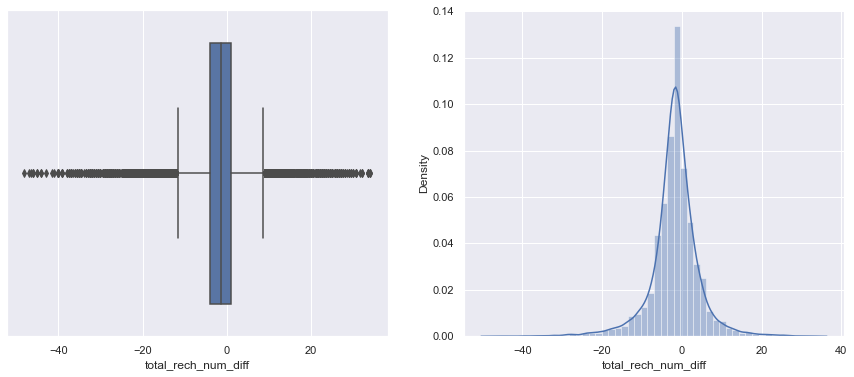

In [453]:
# Lets check value distribution for column 'total_rech_num_diff'

plt.figure(figsize = (15,6))

plt.subplot(121)
sns.boxplot(telecom_HVC['total_rech_num_diff'])

plt.subplot(122)
sns.distplot(telecom_HVC['total_rech_num_diff'])
plt.show()

## 3. Exploratory data analysis

### 3.1 Univariate Analysis

In [454]:
col_6_EDA = [i for i in telecom_HVC.columns if '_6' in i]
col_7_EDA = [i for i in telecom_HVC.columns if '_7' in i]
col_8_EDA = [i for i in telecom_HVC.columns if '_8' in i]
col_diff_EDA= [i for i in telecom_HVC.columns if '_diff' in i]

In [455]:
print(len(col_6_EDA))
print(len(col_7_EDA))
print(len(col_8_EDA))
print(len(col_diff_EDA))

41
41
41
41


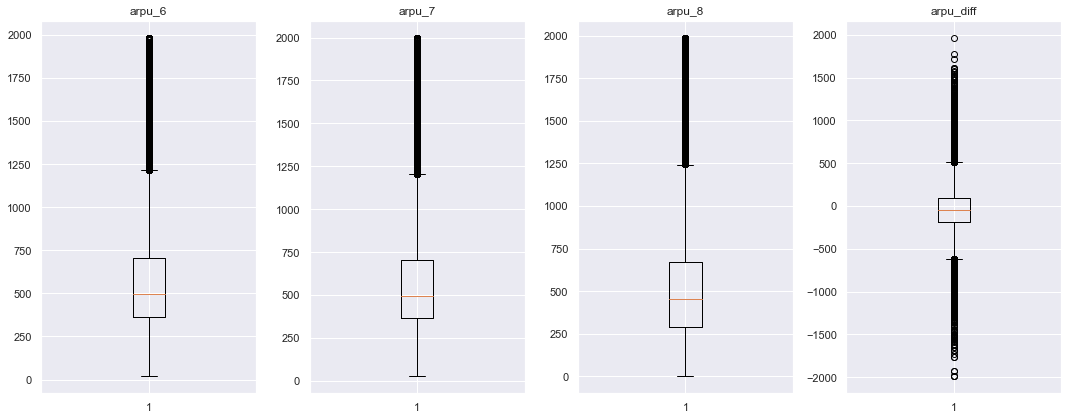

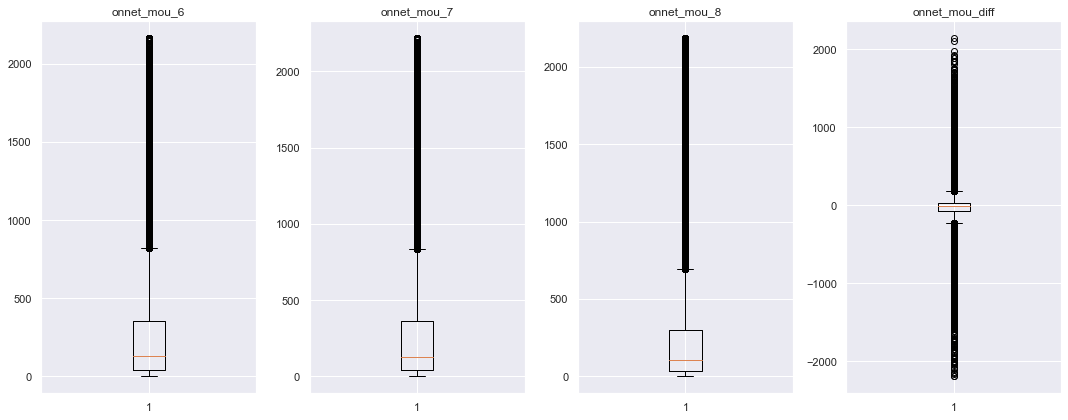

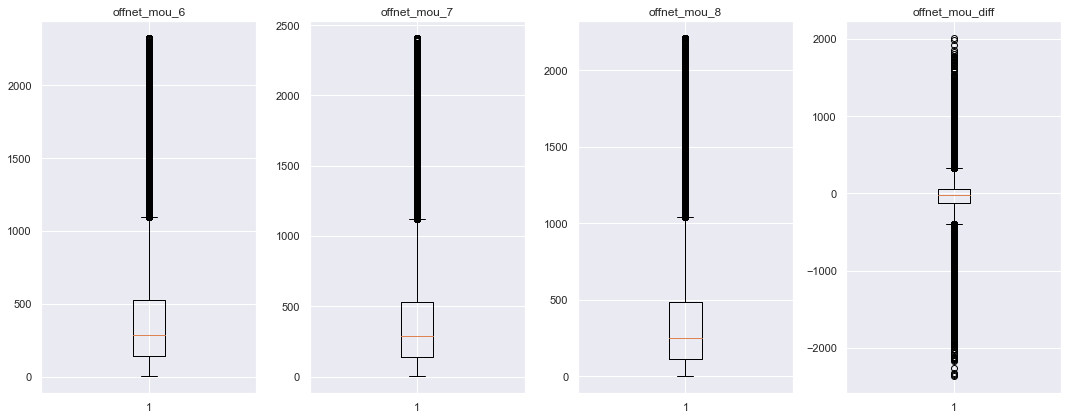

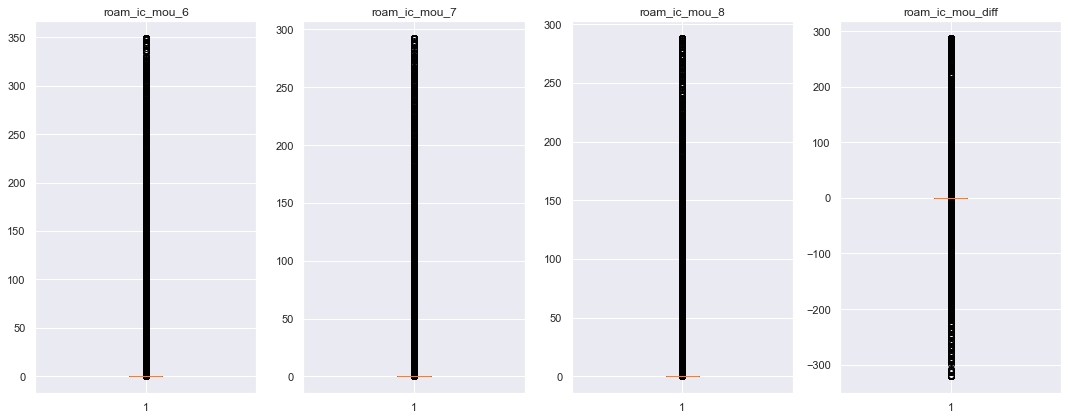

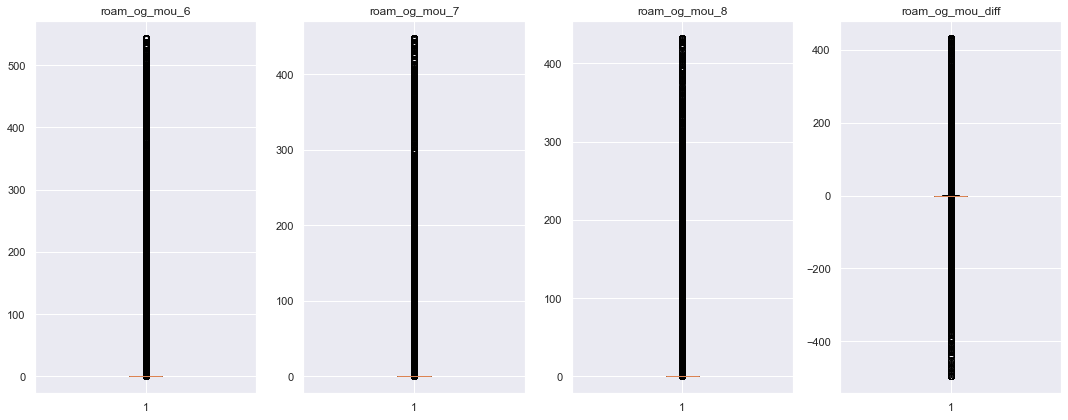

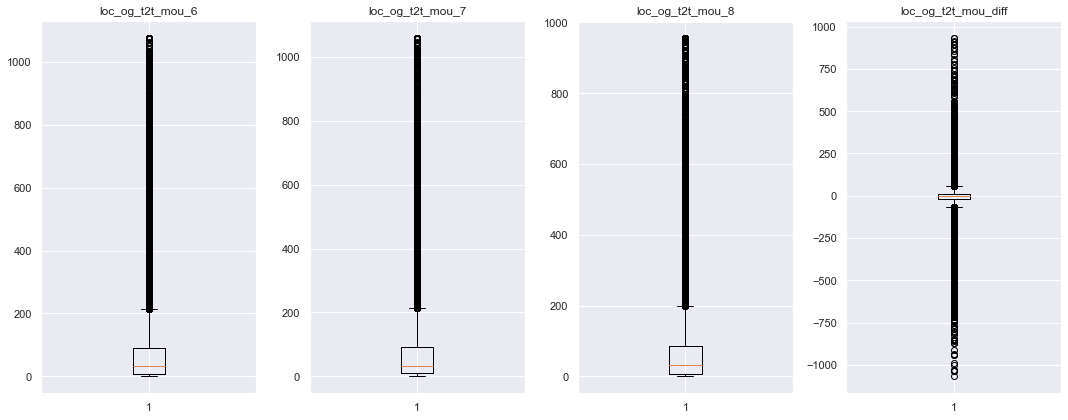

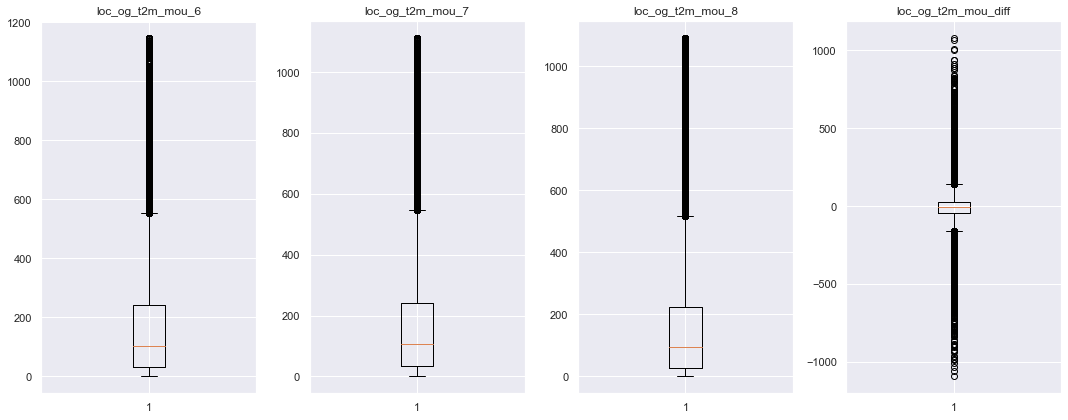

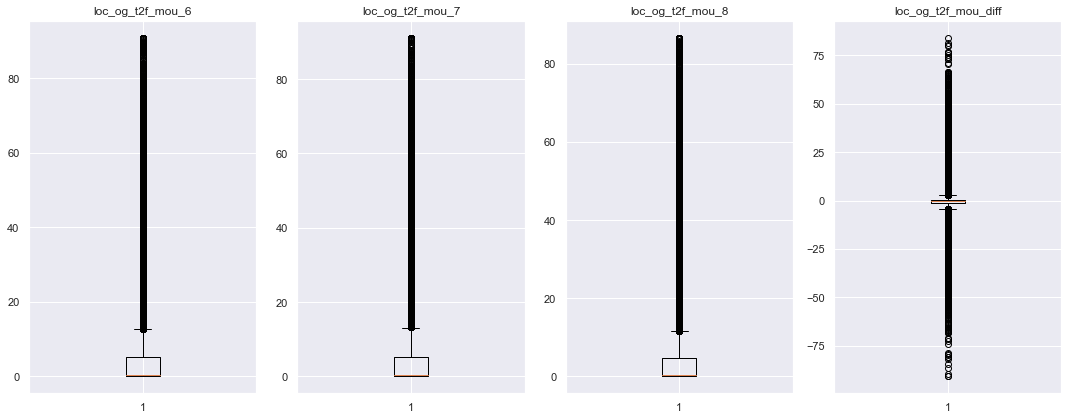

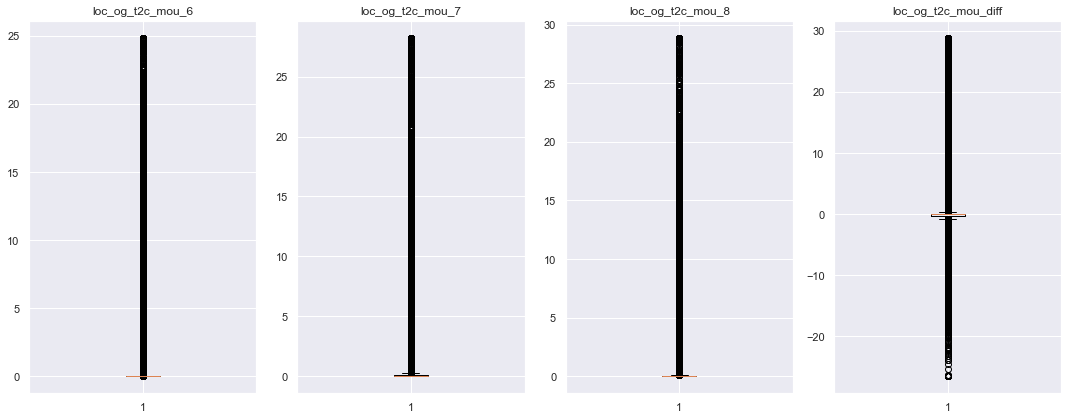

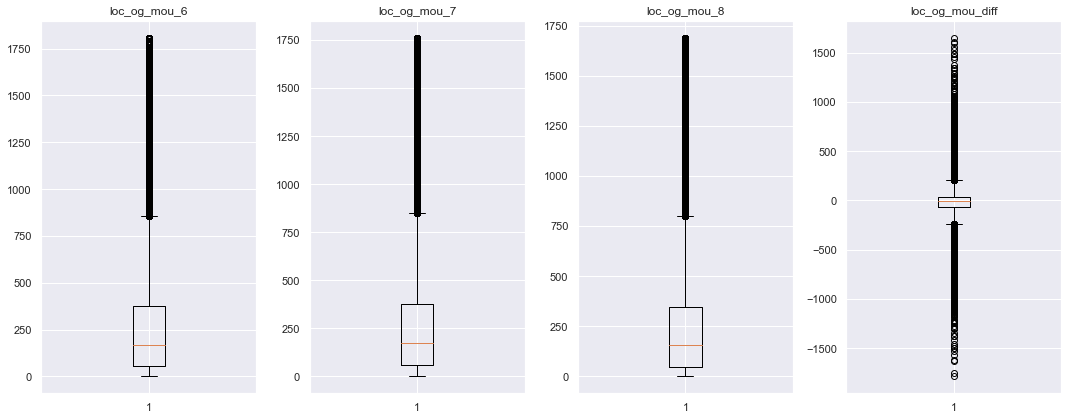

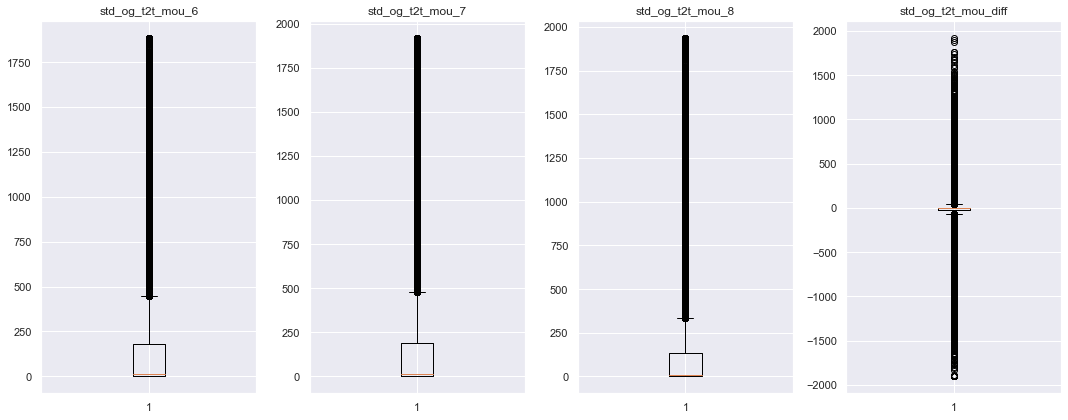

In [456]:
# Plotting each column w.r.t. month

for i,j,k,l in zip(col_6_EDA[:11], col_7_EDA[:11], col_8_EDA[:11], col_diff_EDA[:11]):
    plt.figure(figsize = (15,6))
    plt.subplot(1,4,1)
    plt.boxplot(telecom_HVC[i])
    plt.title('%s' %i)
    
    plt.subplot(1,4,2)
    plt.boxplot(telecom_HVC[j])
    plt.title('%s' %j)
    
    plt.subplot(1,4,3)
    plt.boxplot(telecom_HVC[k])
    plt.title('%s' %k)
    
    plt.subplot(1,4,4)
    plt.boxplot(telecom_HVC[l])
    plt.title('%s' %l)
    
    plt.tight_layout()
    plt.show()


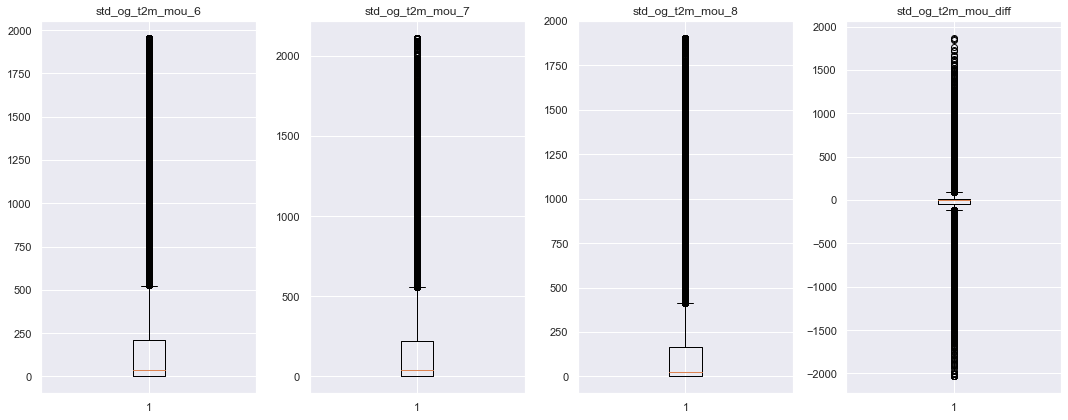

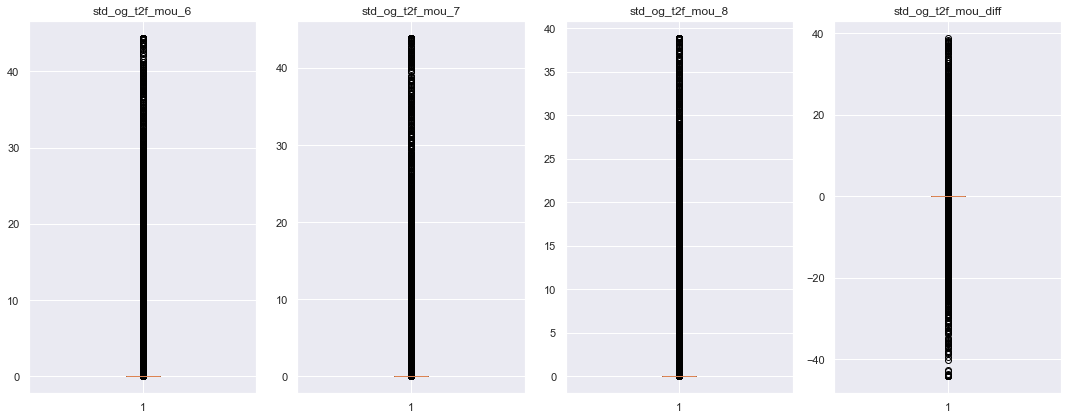

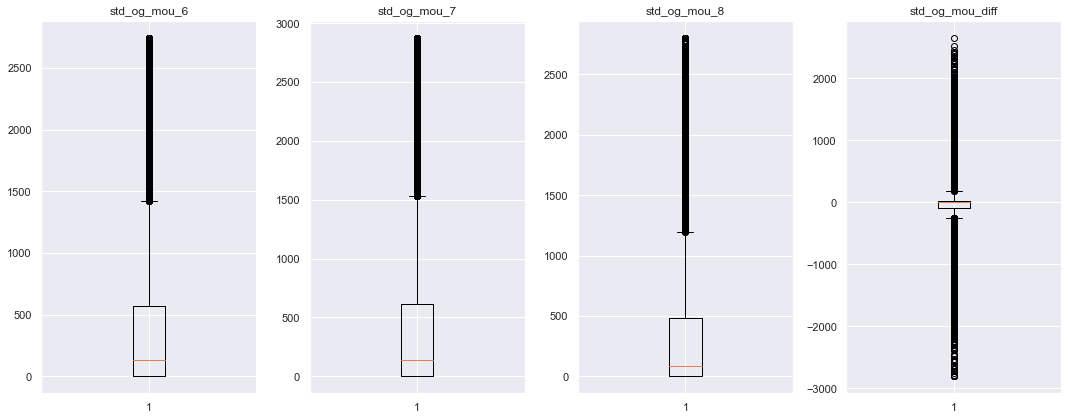

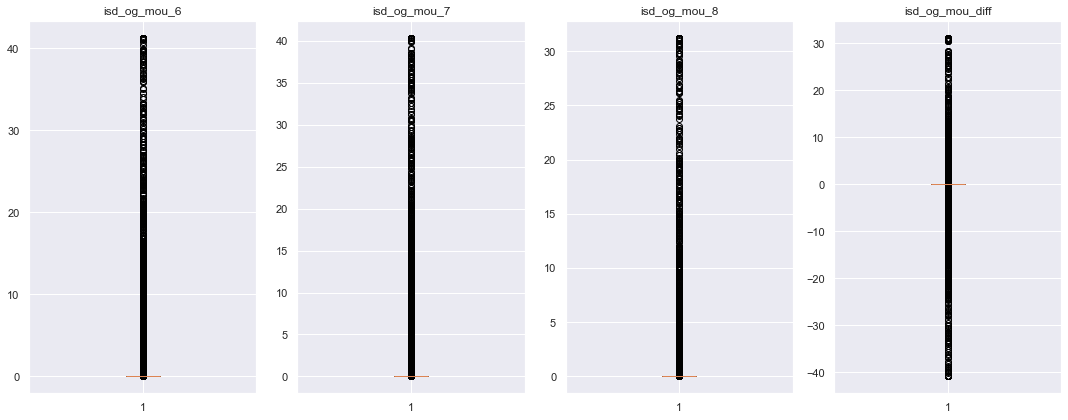

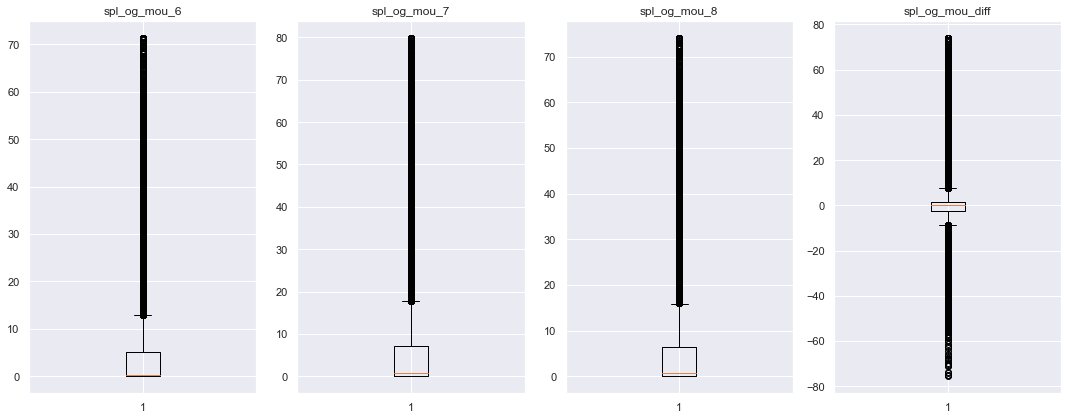

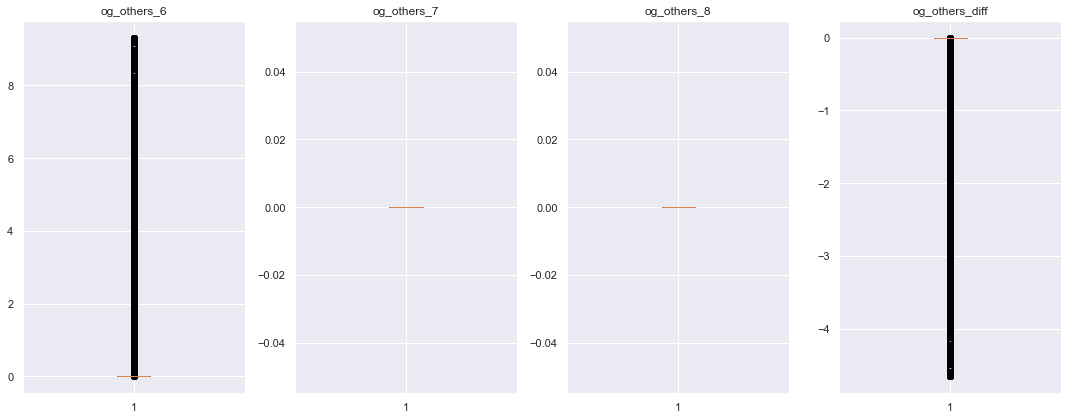

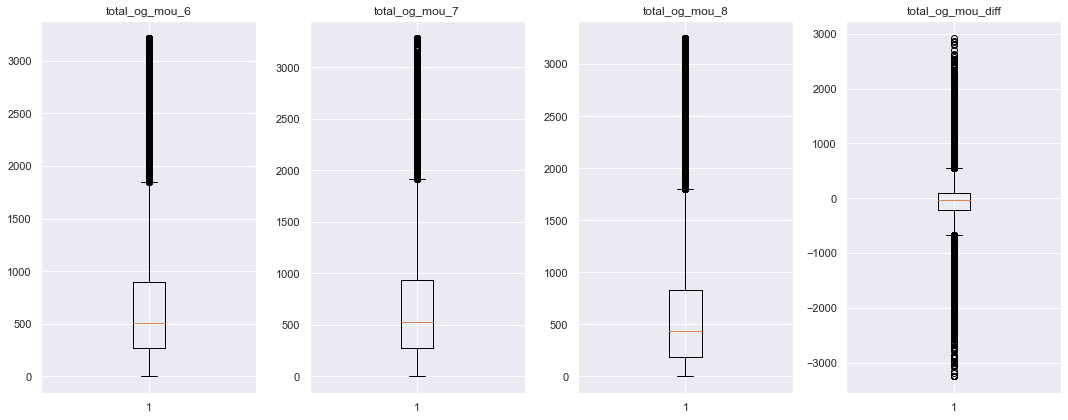

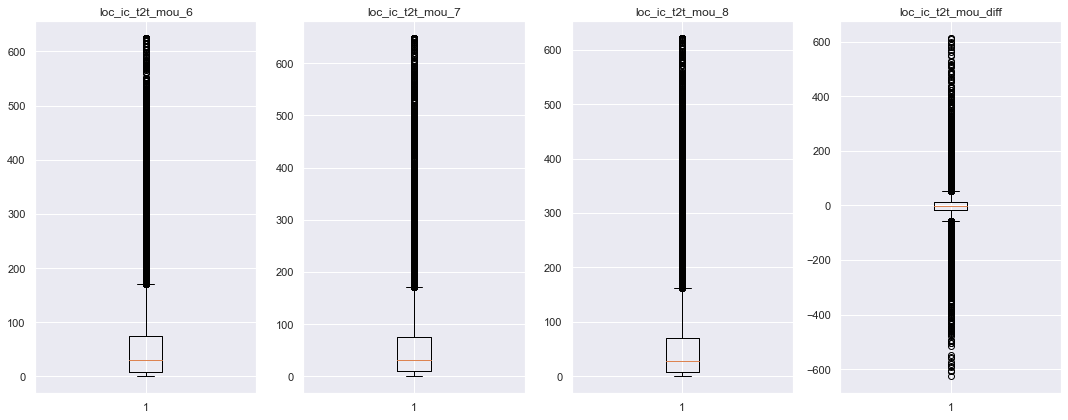

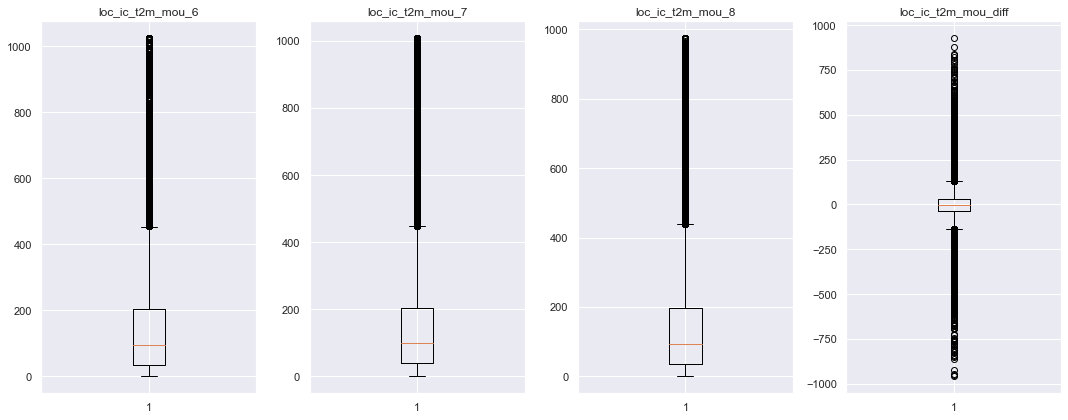

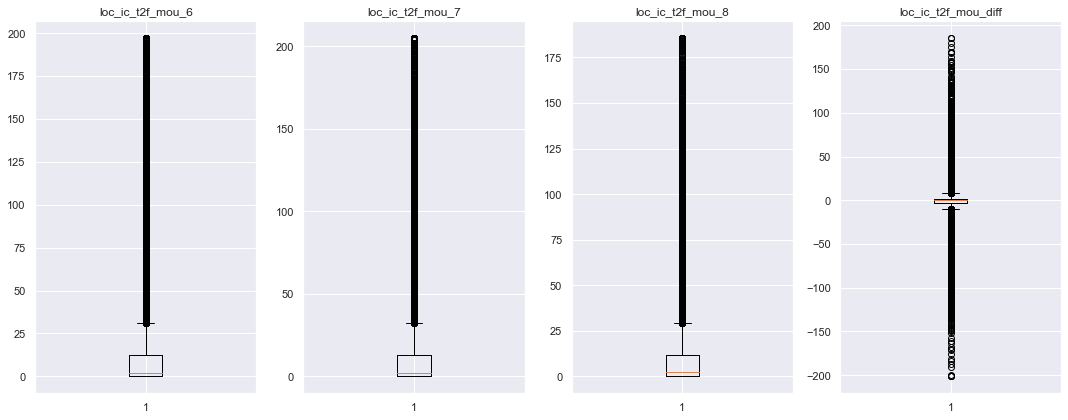

In [457]:
# Plotting each column w.r.t. month

for i,j,k,l in zip(col_6_EDA[11:21], col_7_EDA[11:21], col_8_EDA[11:21], col_diff_EDA[11:21]):
    plt.figure(figsize = (15,6))
    plt.subplot(1,4,1)
    plt.boxplot(telecom_HVC[i])
    plt.title('%s' %i)
    
    plt.subplot(1,4,2)
    plt.boxplot(telecom_HVC[j])
    plt.title('%s' %j)
    
    plt.subplot(1,4,3)
    plt.boxplot(telecom_HVC[k])
    plt.title('%s' %k)
    
    plt.subplot(1,4,4)
    plt.boxplot(telecom_HVC[l])
    plt.title('%s' %l)
    
    plt.tight_layout()
    plt.show()


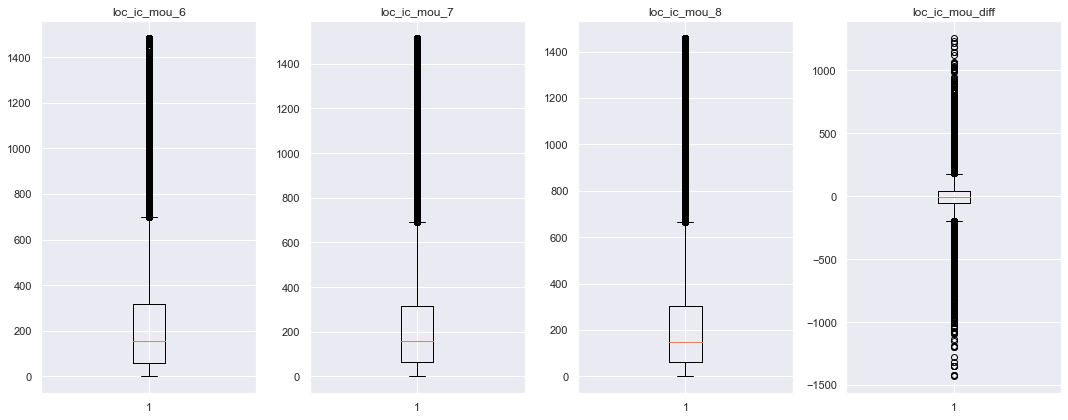

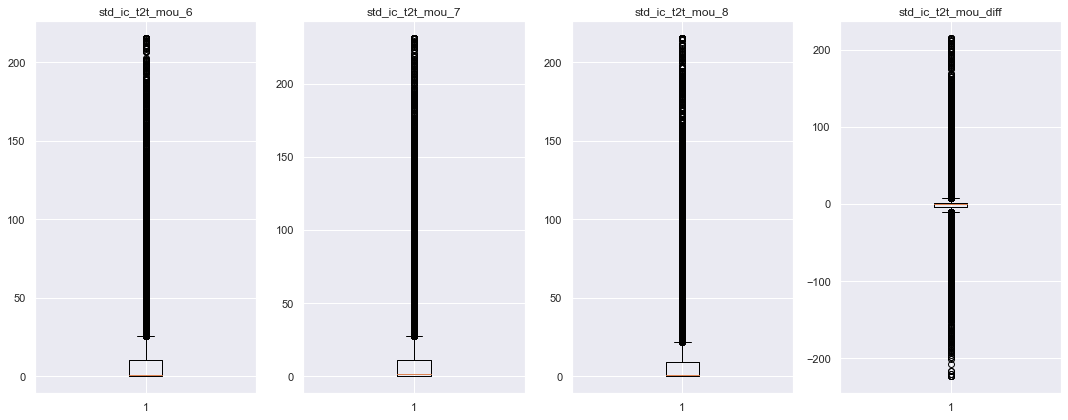

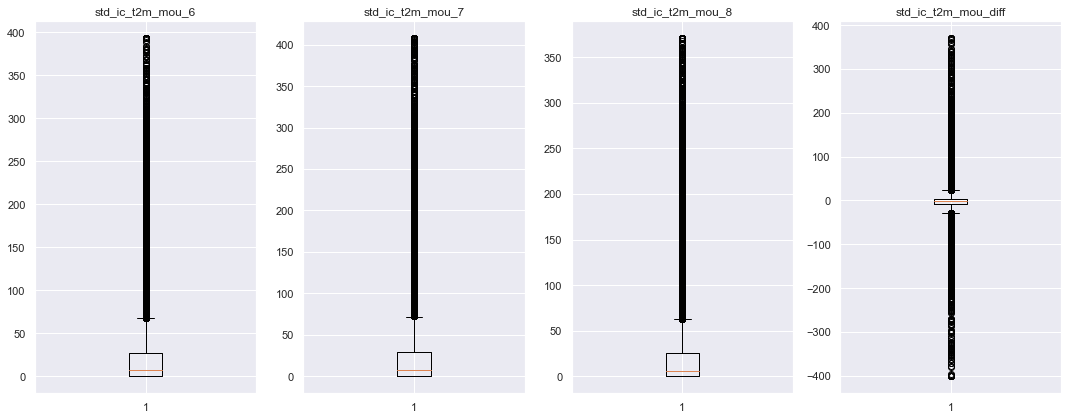

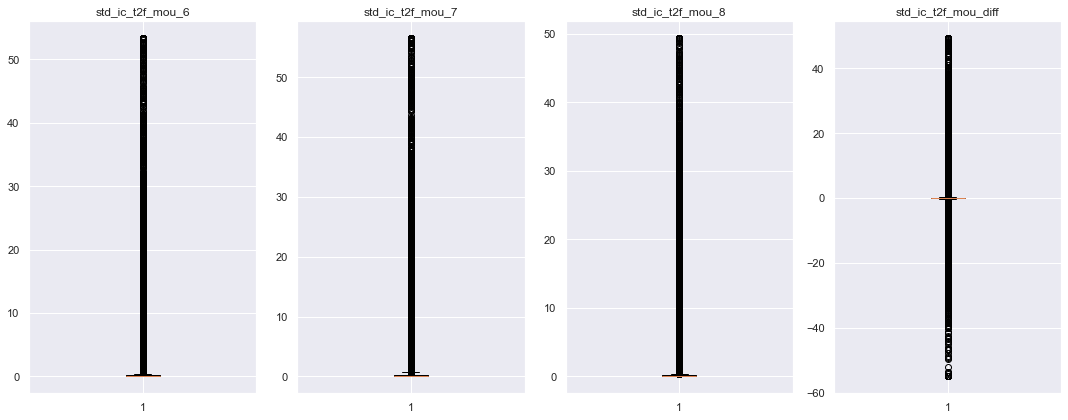

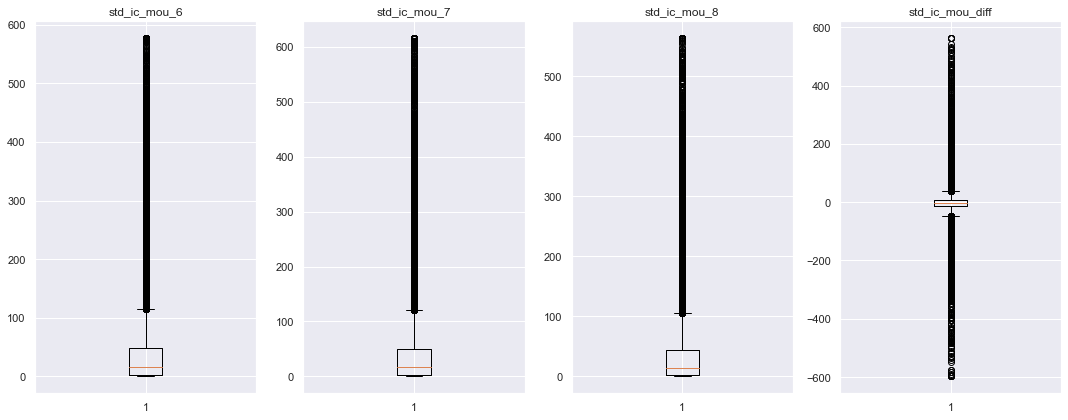

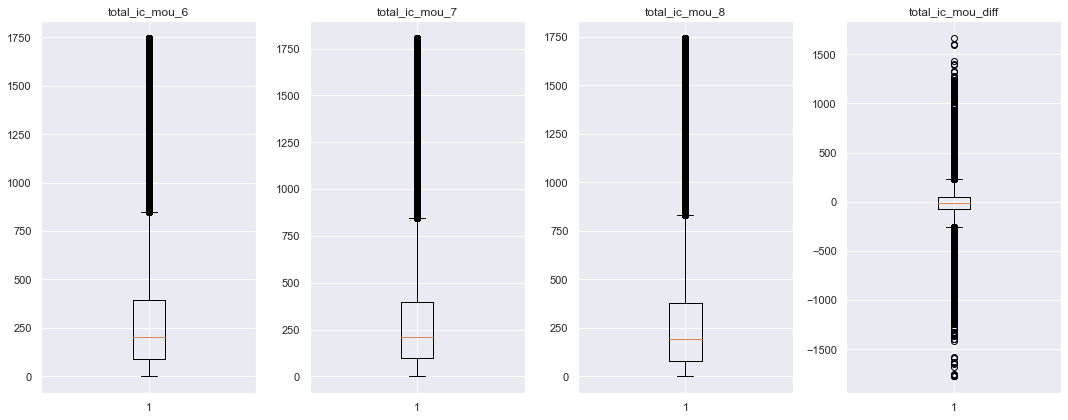

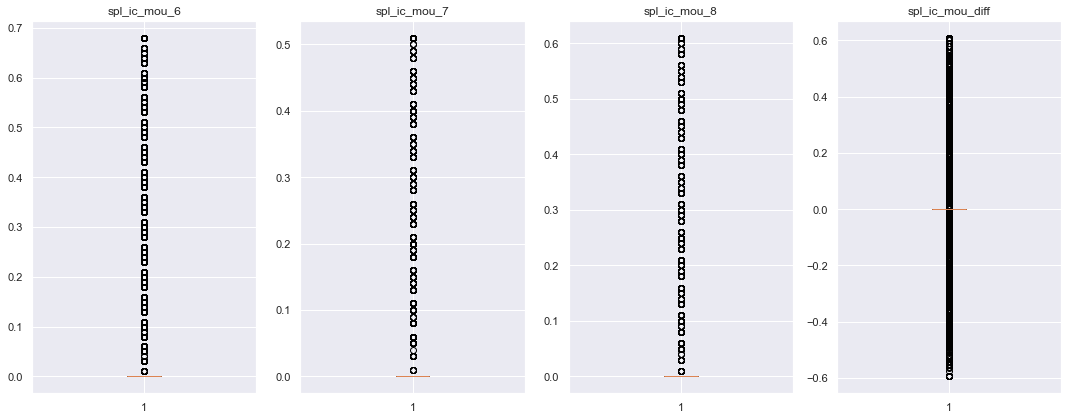

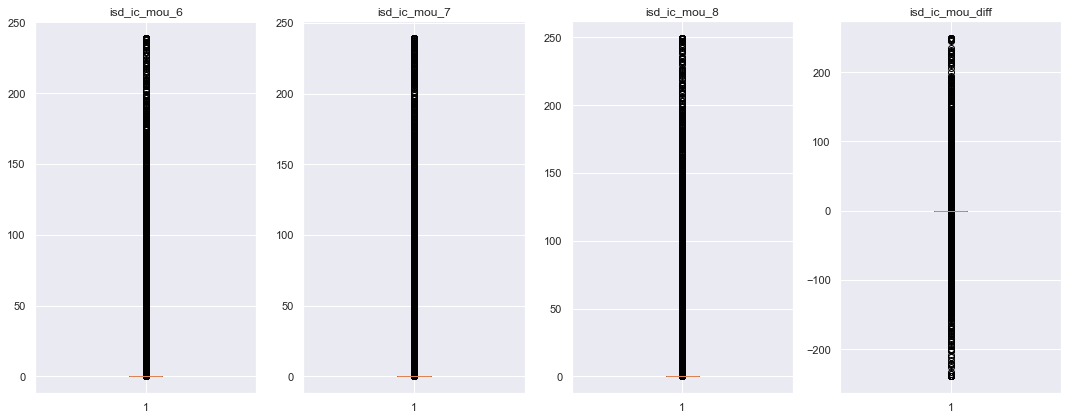

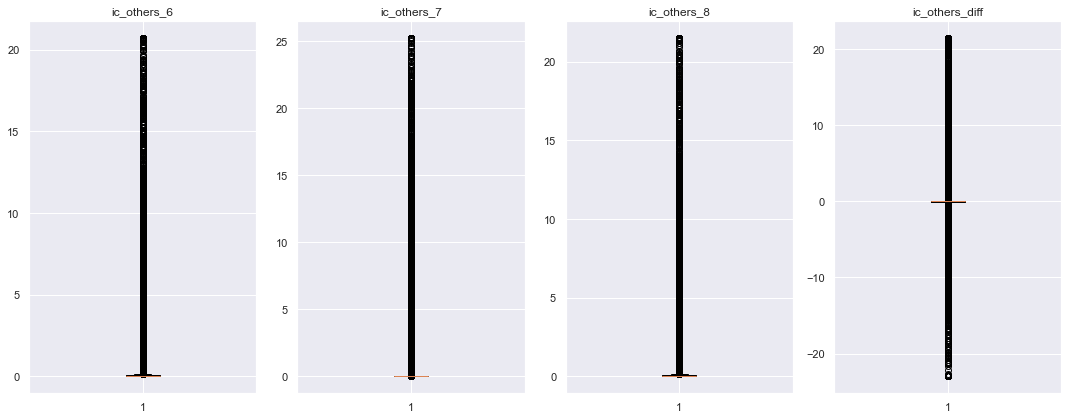

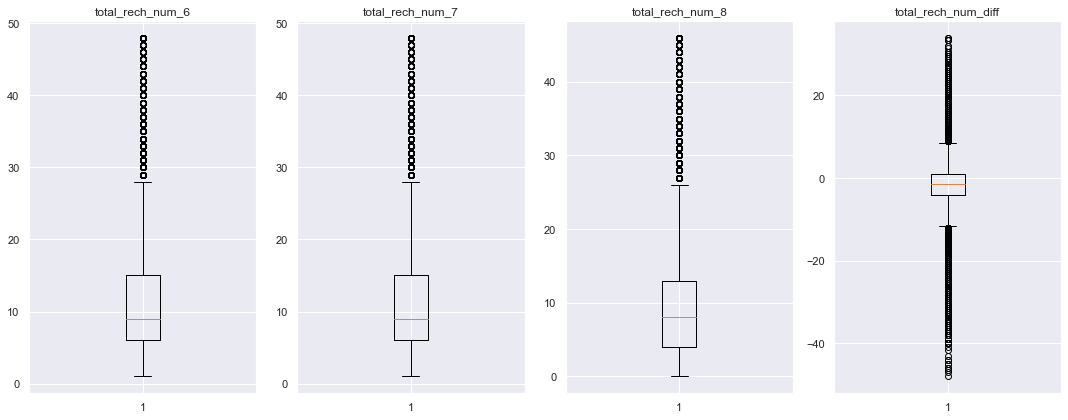

In [458]:
# Plotting each column w.r.t. month

for i,j,k,l in zip(col_6_EDA[21:31], col_7_EDA[21:31], col_8_EDA[21:31], col_diff_EDA[21:31]):
    plt.figure(figsize = (15,6))
    plt.subplot(1,4,1)
    plt.boxplot(telecom_HVC[i])
    plt.title('%s' %i)
    
    plt.subplot(1,4,2)
    plt.boxplot(telecom_HVC[j])
    plt.title('%s' %j)
    
    plt.subplot(1,4,3)
    plt.boxplot(telecom_HVC[k])
    plt.title('%s' %k)
    
    plt.subplot(1,4,4)
    plt.boxplot(telecom_HVC[l])
    plt.title('%s' %l)
    
    plt.tight_layout()
    plt.show()


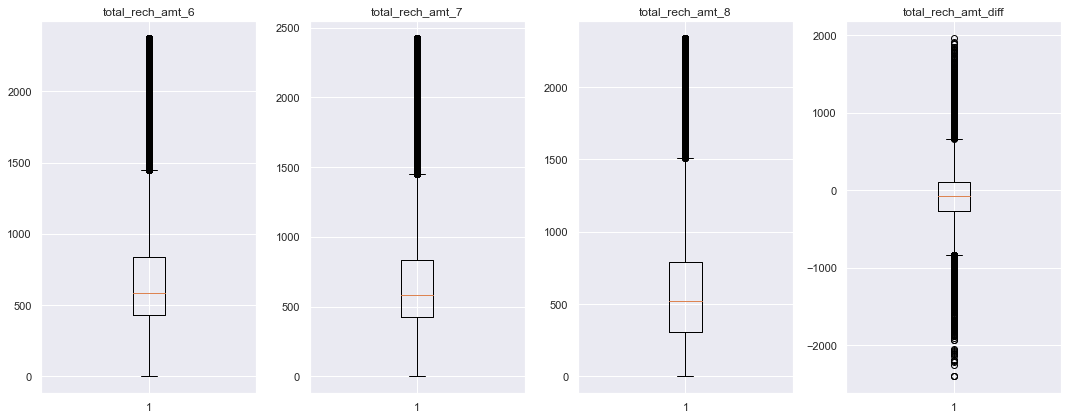

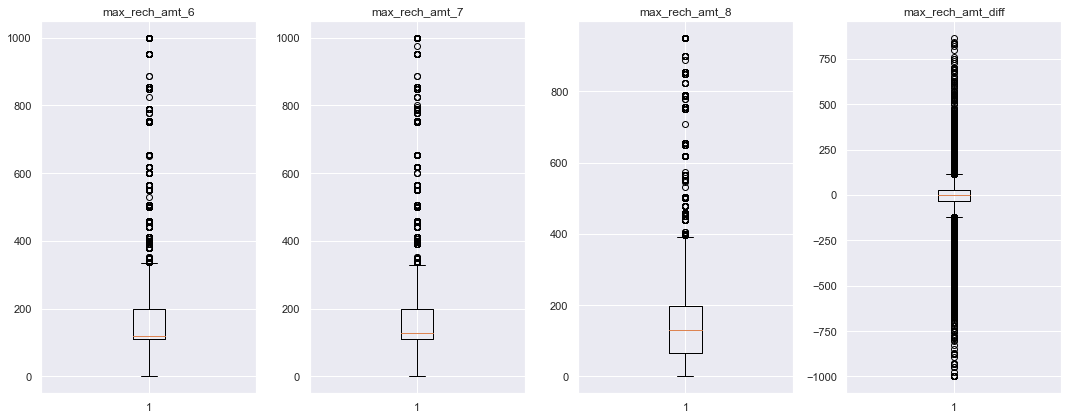

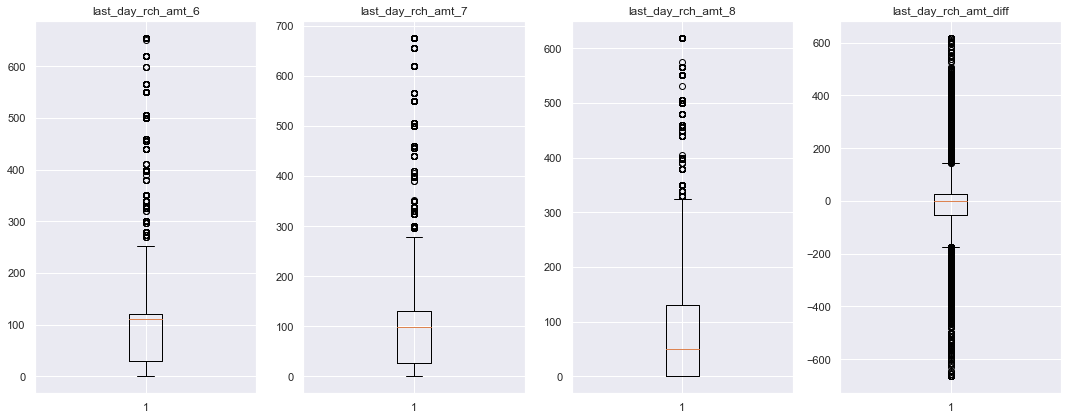

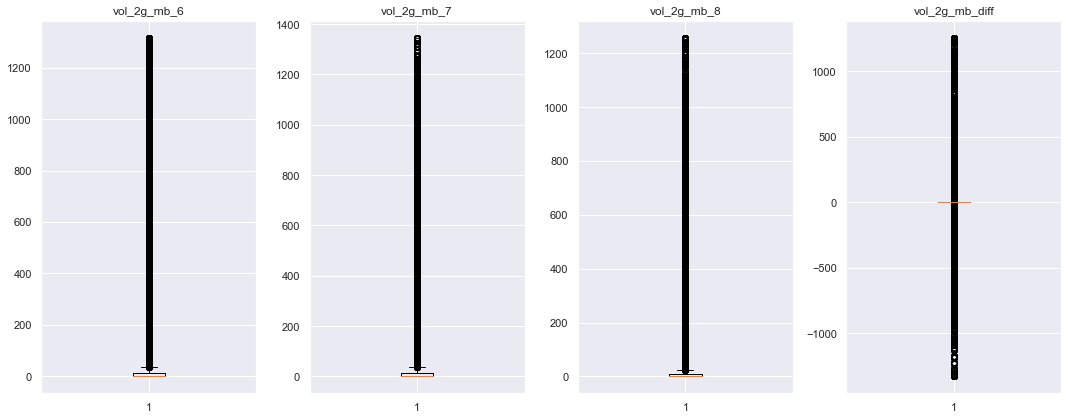

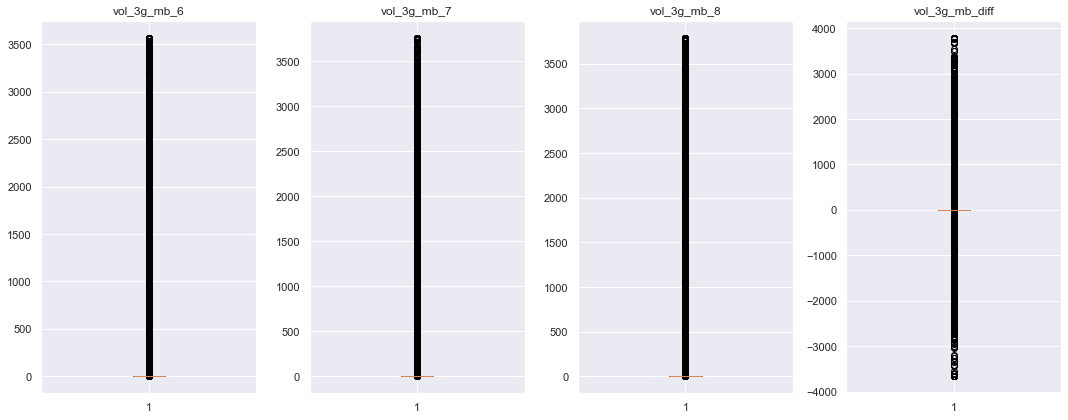

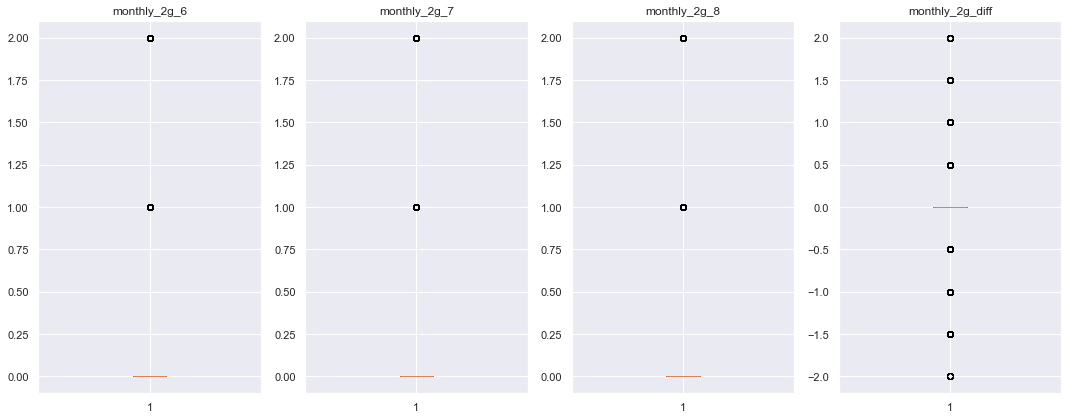

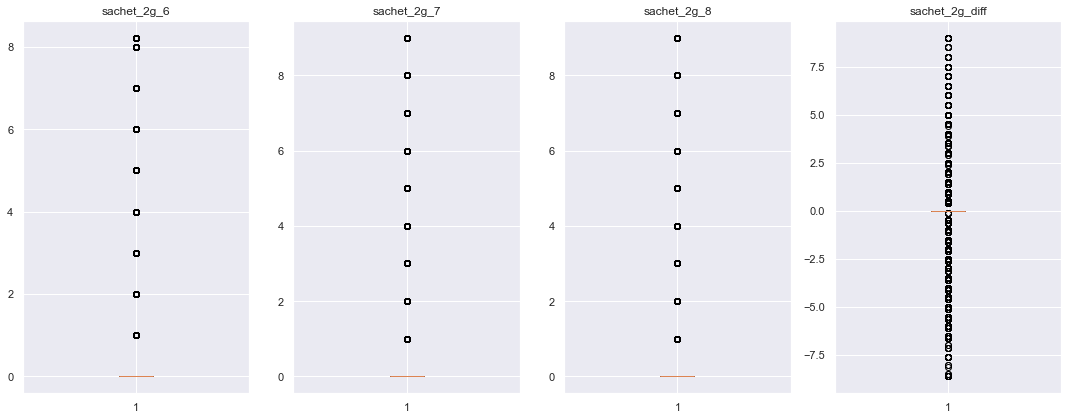

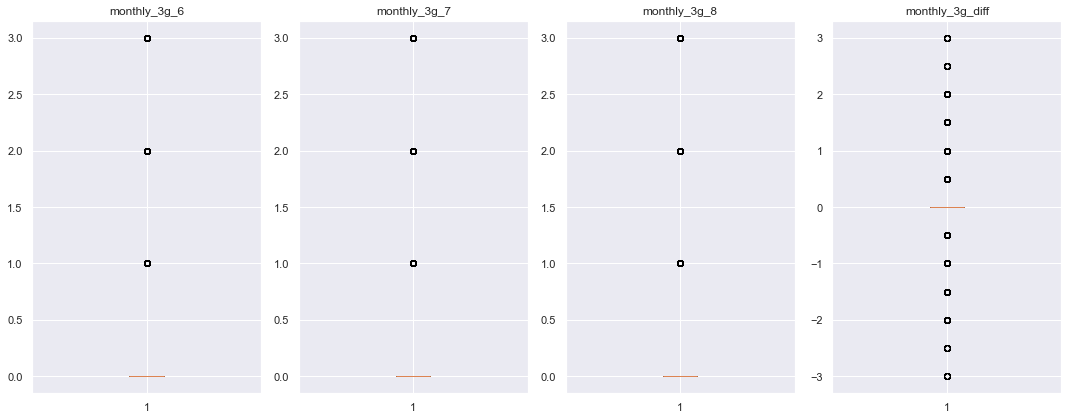

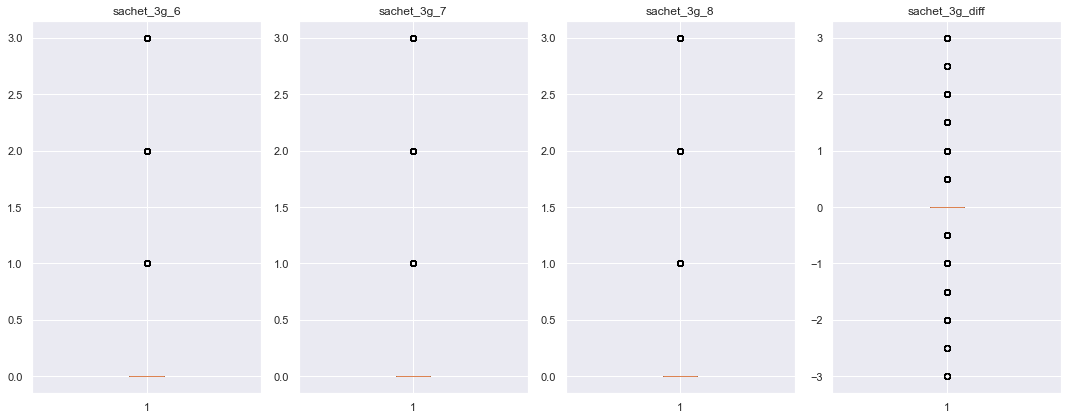

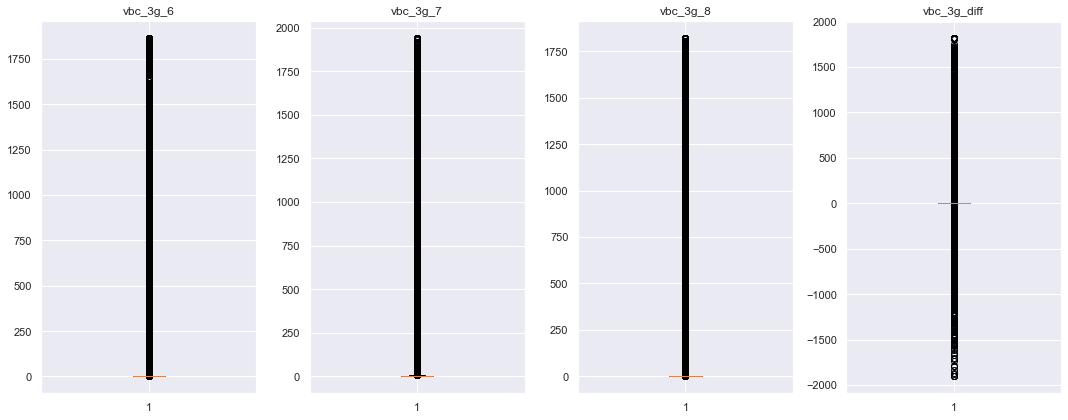

In [459]:
# Plotting each column w.r.t. month

for i,j,k,l in zip(col_6_EDA[31:42], col_7_EDA[31:42], col_8_EDA[31:42], col_diff_EDA[31:42]):
    plt.figure(figsize = (15,6))
    plt.subplot(1,4,1)
    plt.boxplot(telecom_HVC[i])
    plt.title('%s' %i)
    
    plt.subplot(1,4,2)
    plt.boxplot(telecom_HVC[j])
    plt.title('%s' %j)
    
    plt.subplot(1,4,3)
    plt.boxplot(telecom_HVC[k])
    plt.title('%s' %k)
    
    plt.subplot(1,4,4)
    plt.boxplot(telecom_HVC[l])
    plt.title('%s' %l)
    
    plt.tight_layout()
    plt.show()


### Inferences:

- From values of month 6th , 7th & 8th we get to see the increasing or decreasing pattern.
- From values of column '_diff'. We know if median is above zero then average revenue from month 6th and 7th is less than month 8th. which let us know that the values are increasing. And if median is below zero then average revenue from month 6th and 7th is greater than month 8th. Which let us know that the values are increasing.
- Columns where median value of '_diff' is located at zero shows no fluctuations in revenue.

### 3.2 Bivariate Analysis

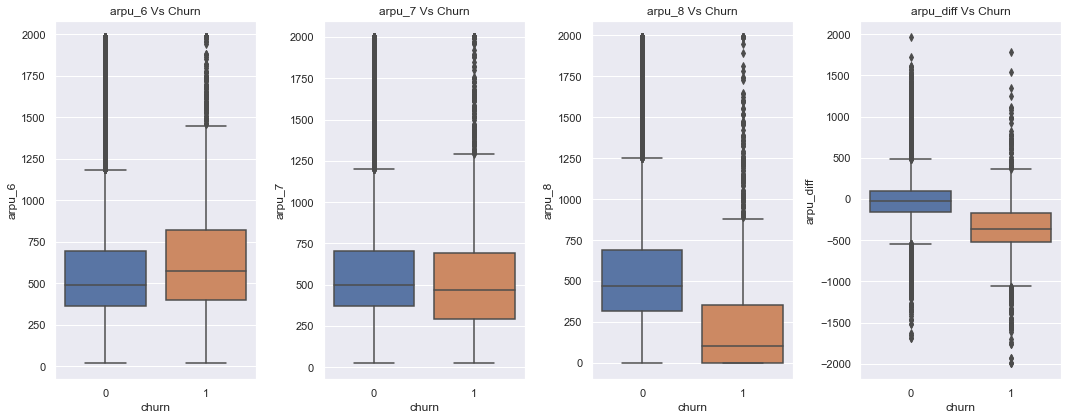

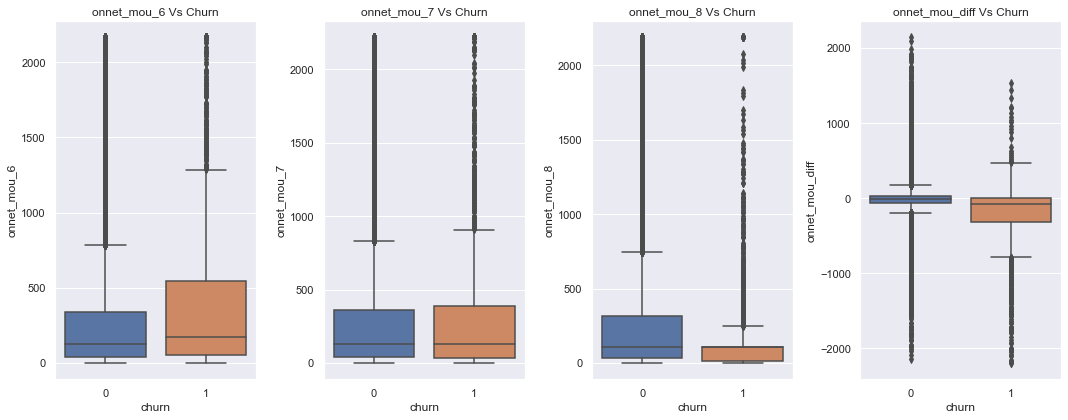

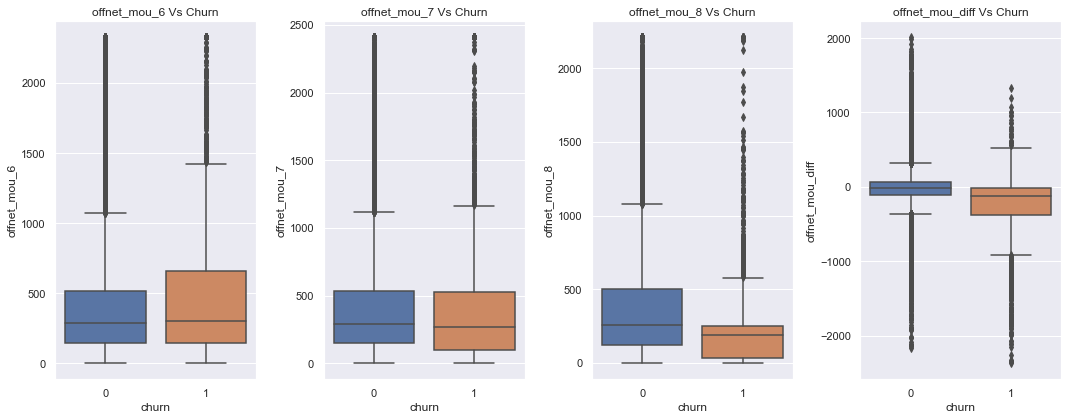

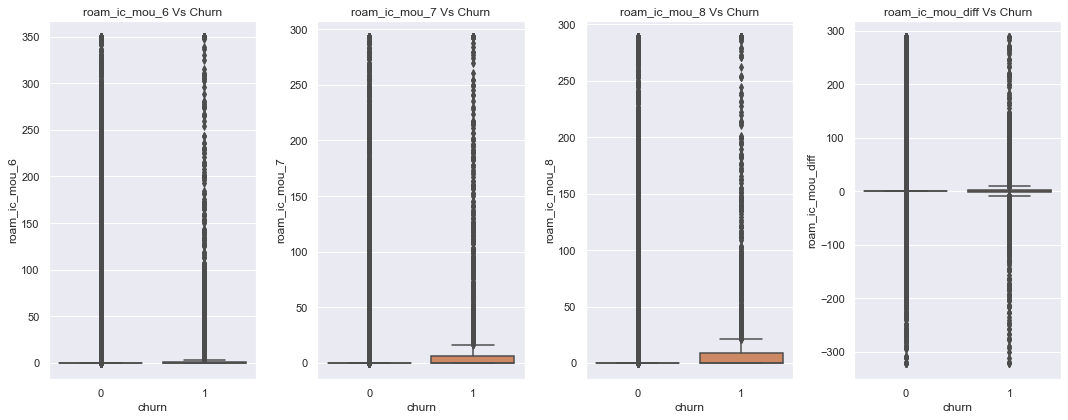

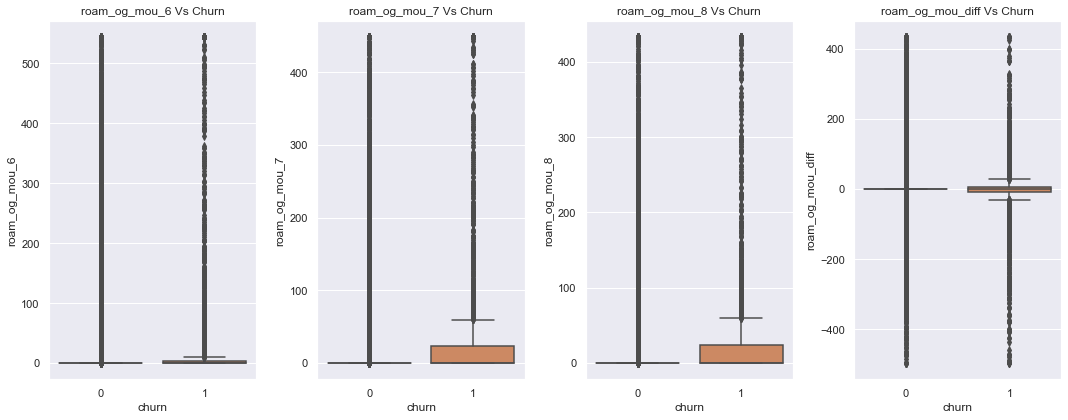

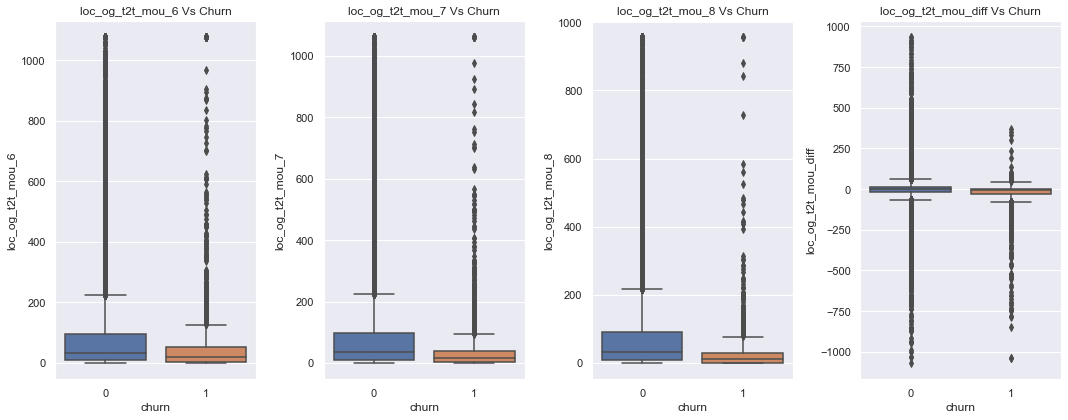

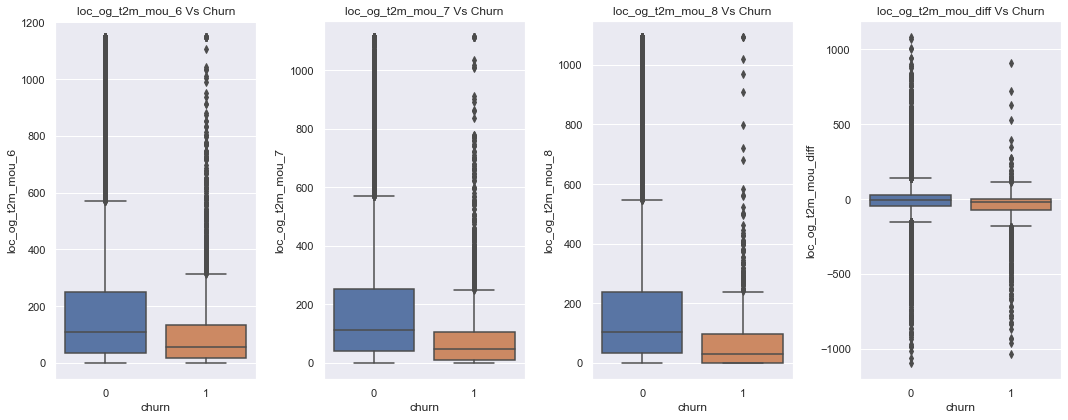

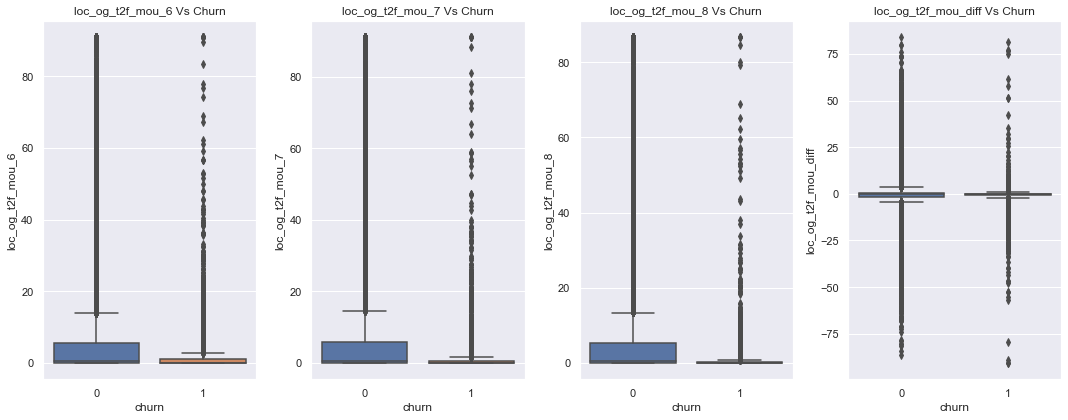

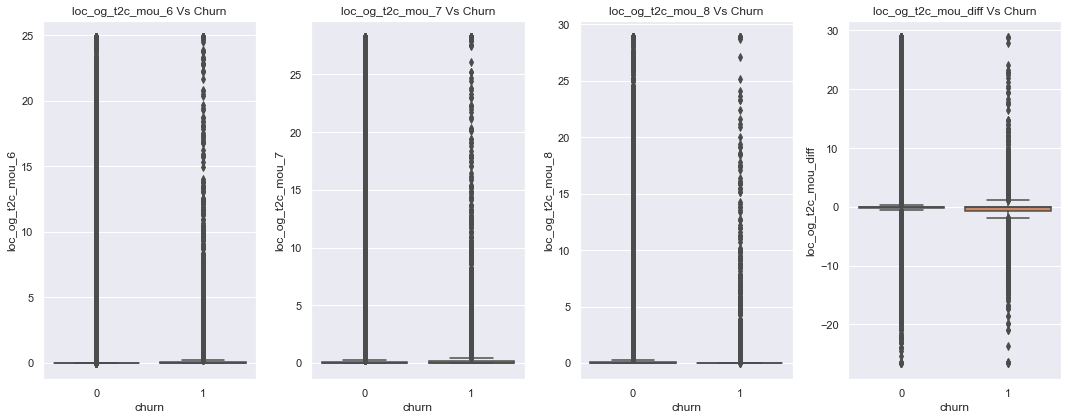

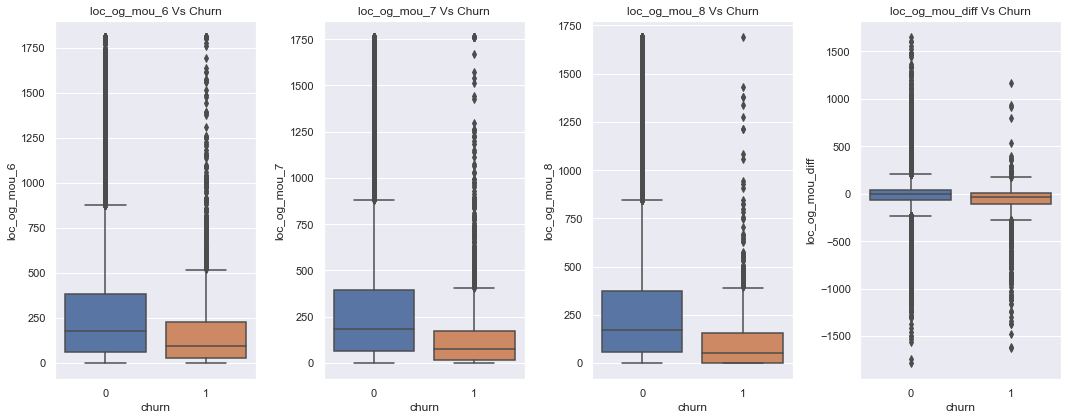

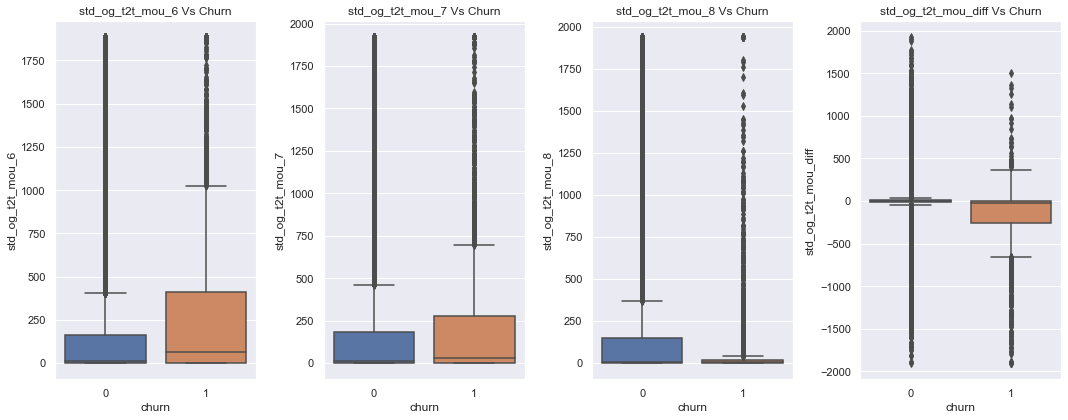

In [460]:
# Plotting each column associated with months w.r.t. target variable churn

for i,j,k,l in zip(col_6_EDA[:11], col_7_EDA[:11], col_8_EDA[:11], col_diff_EDA[:11]):
    
    plt.figure(figsize = (15,6))
    
    plt.subplot(1,4,1)
    sns.boxplot(x = 'churn',y = i, data = telecom_HVC)
    plt.title('%s Vs Churn' %i)
    
    plt.subplot(1,4,2)
    sns.boxplot(x = 'churn',y = j, data = telecom_HVC)
    plt.title('%s Vs Churn' %j)
    
    plt.subplot(1,4,3)
    sns.boxplot(x = 'churn',y = k, data = telecom_HVC)
    plt.title('%s Vs Churn' %k)

    plt.subplot(1,4,4)
    sns.boxplot(x = 'churn',y = l, data = telecom_HVC)
    plt.title('%s Vs Churn' %l)
    
    plt.tight_layout()
    plt.show()


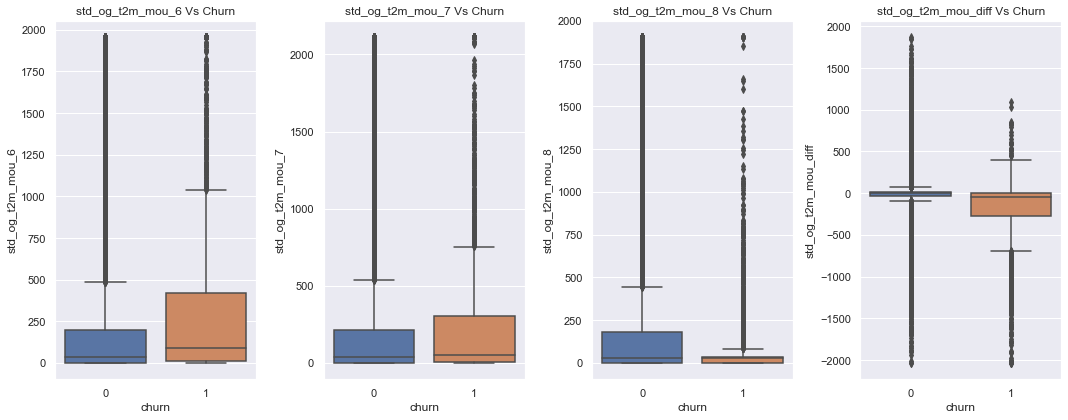

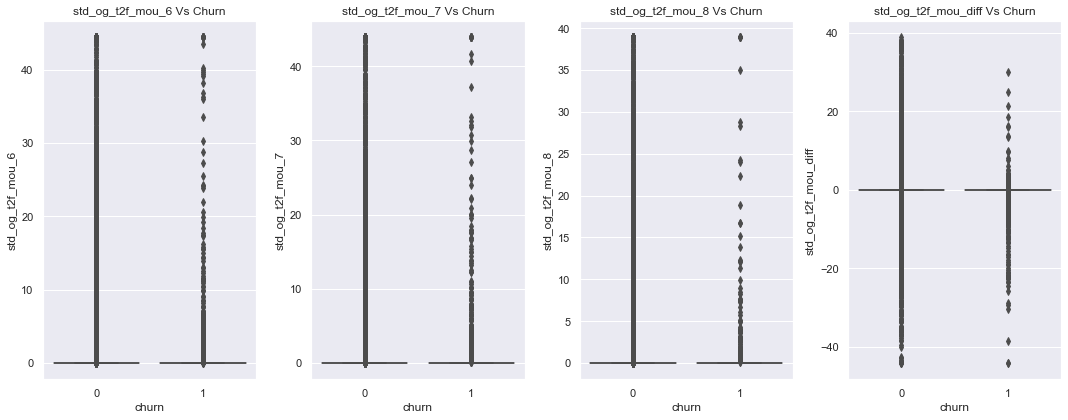

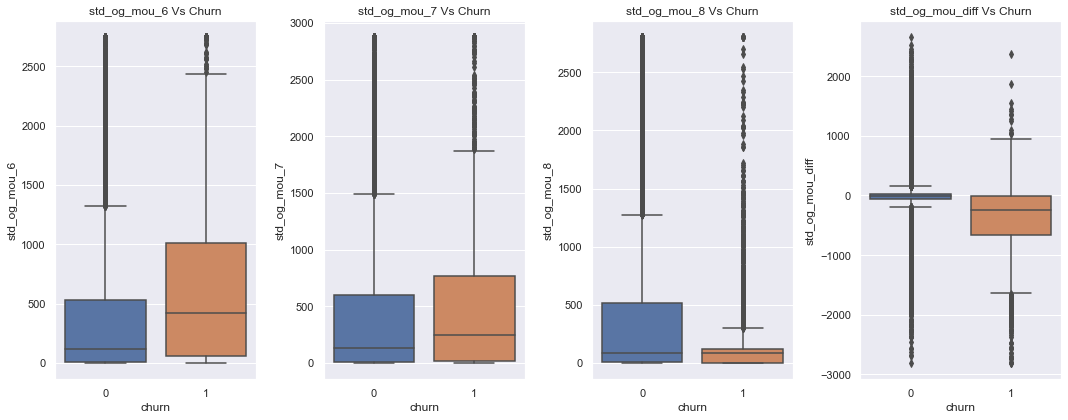

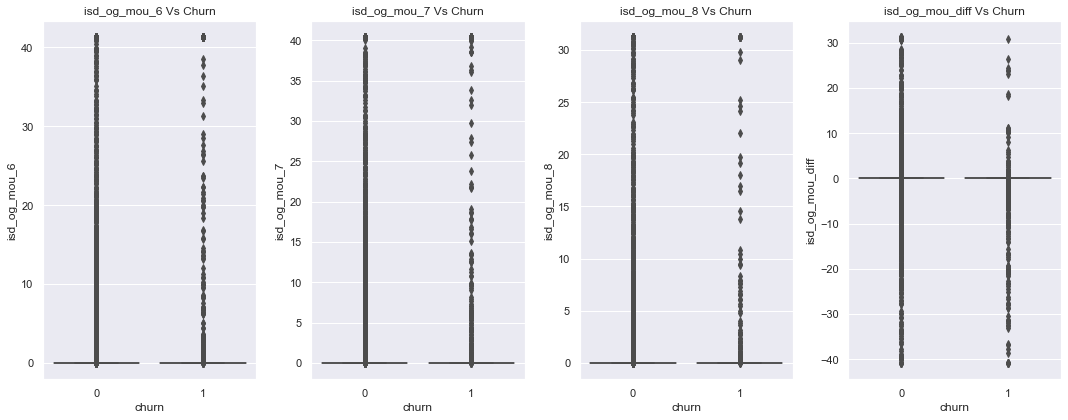

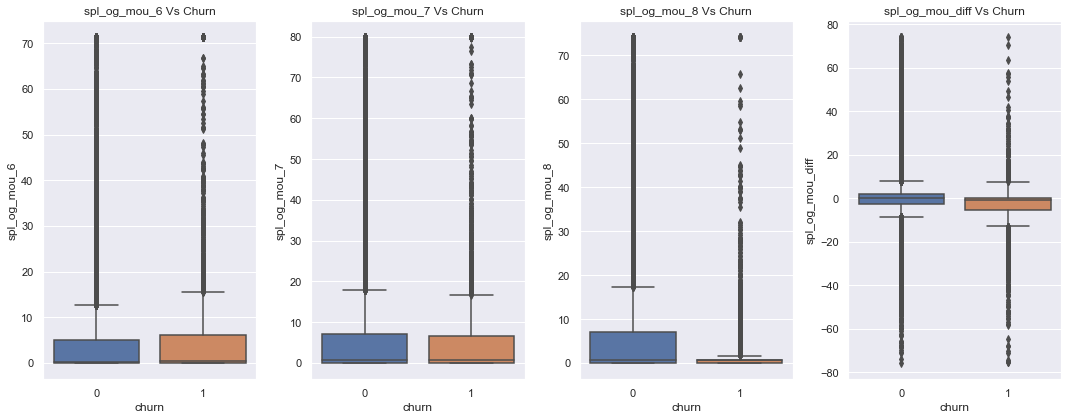

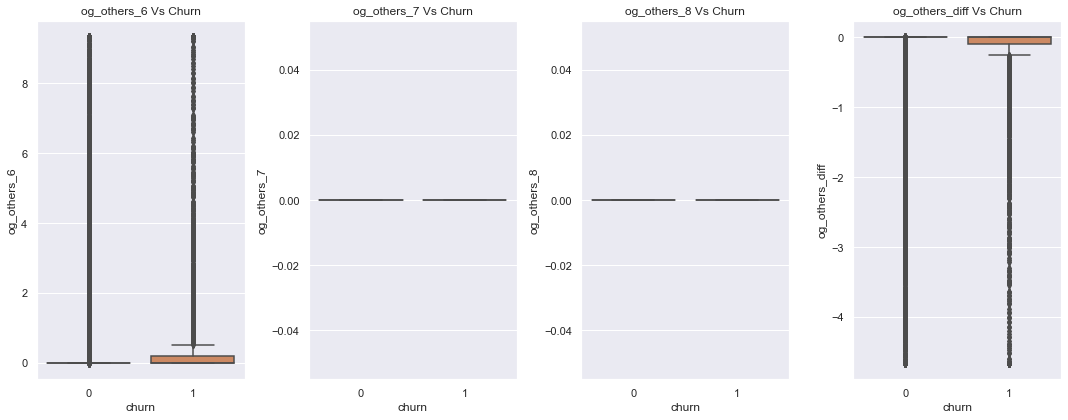

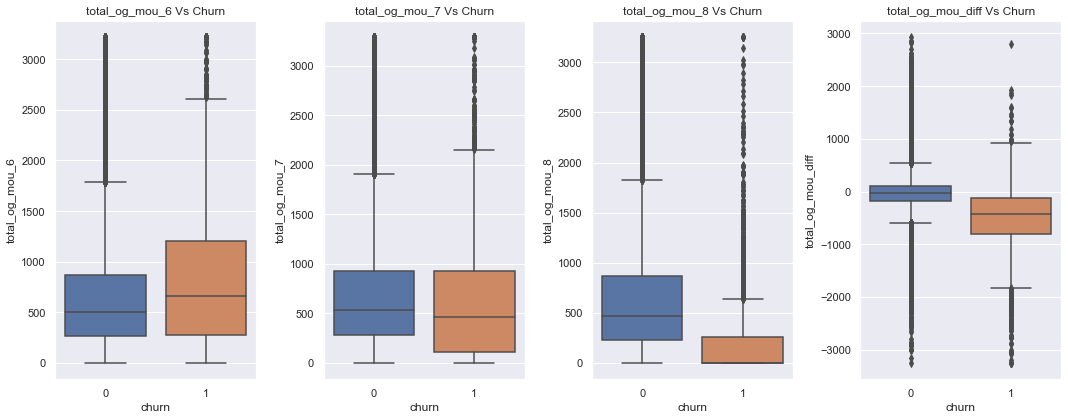

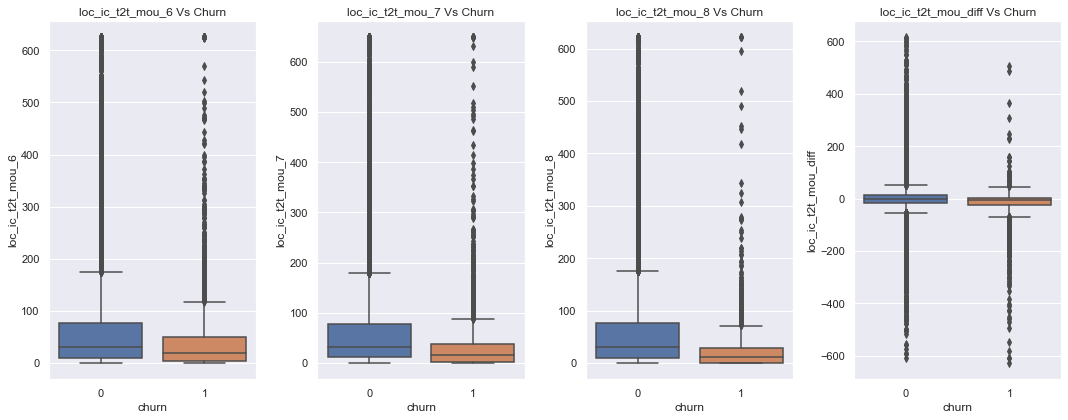

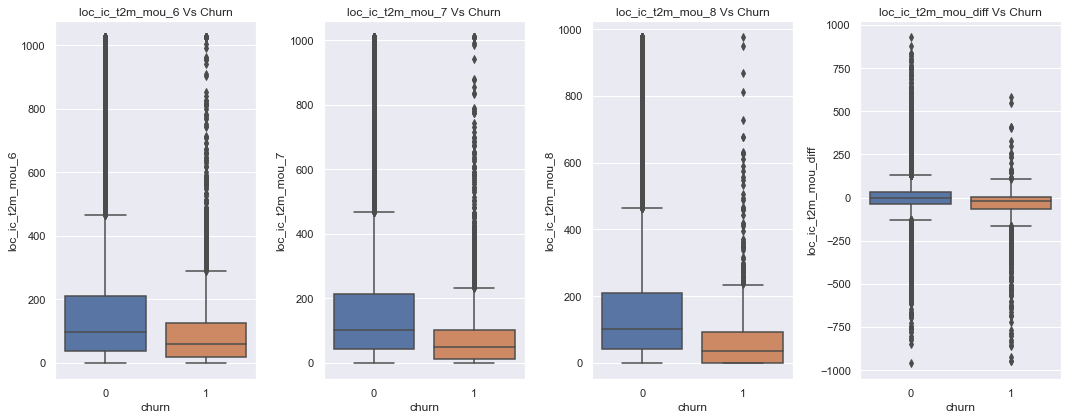

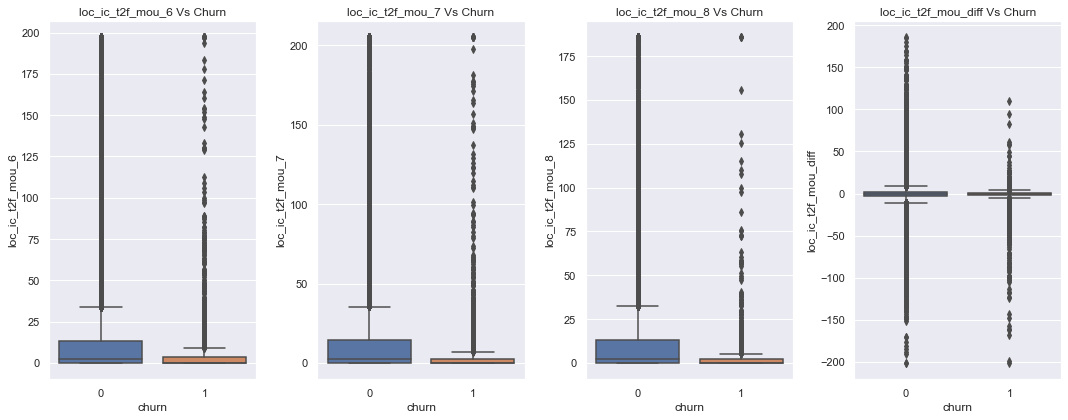

In [461]:
# Plotting each column associated with months w.r.t. target variable churn

for i,j,k,l in zip(col_6_EDA[11:21], col_7_EDA[11:21], col_8_EDA[11:21], col_diff_EDA[11:21]):
    plt.figure(figsize = (15,6))
    
    plt.subplot(1,4,1)
    sns.boxplot(x = 'churn',y = i, data = telecom_HVC)
    plt.title('%s Vs Churn' %i)
    
    plt.subplot(1,4,2)
    sns.boxplot(x = 'churn',y = j, data = telecom_HVC)
    plt.title('%s Vs Churn' %j)
    
    plt.subplot(1,4,3)
    sns.boxplot(x = 'churn',y = k, data = telecom_HVC)
    plt.title('%s Vs Churn' %k)

    plt.subplot(1,4,4)
    sns.boxplot(x = 'churn',y = l, data = telecom_HVC)
    plt.title('%s Vs Churn' %l)
    
    plt.tight_layout()
    plt.show()


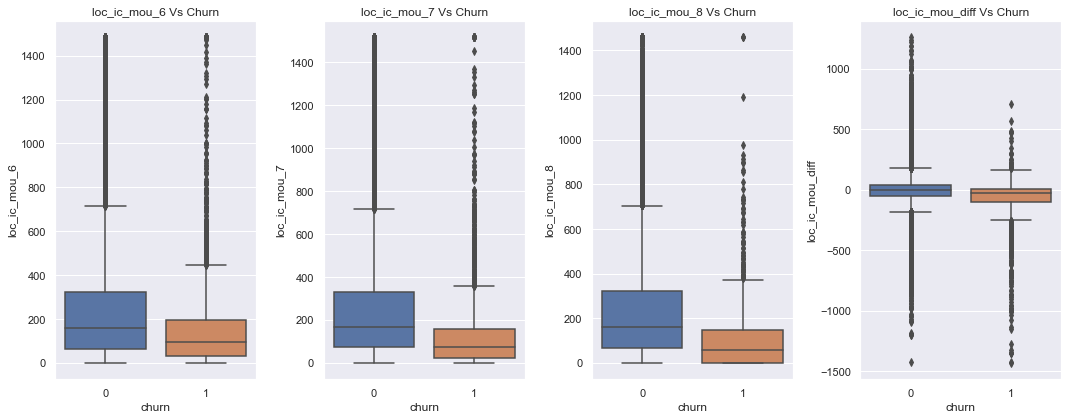

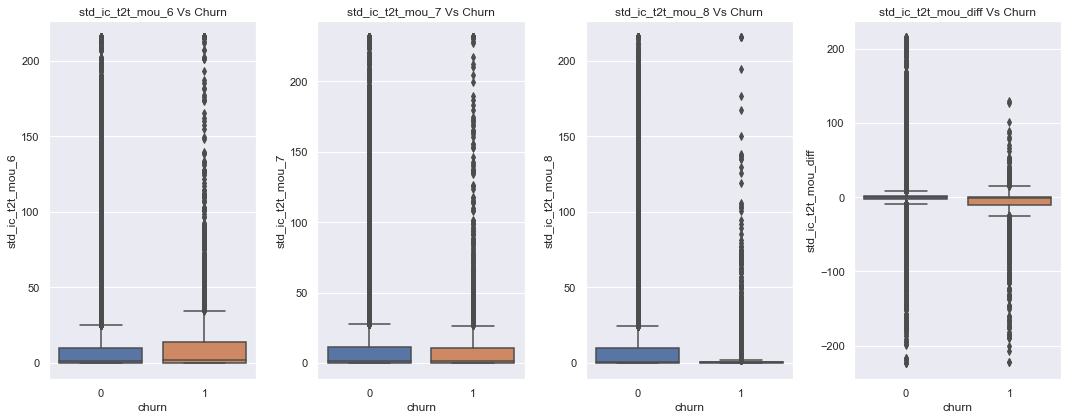

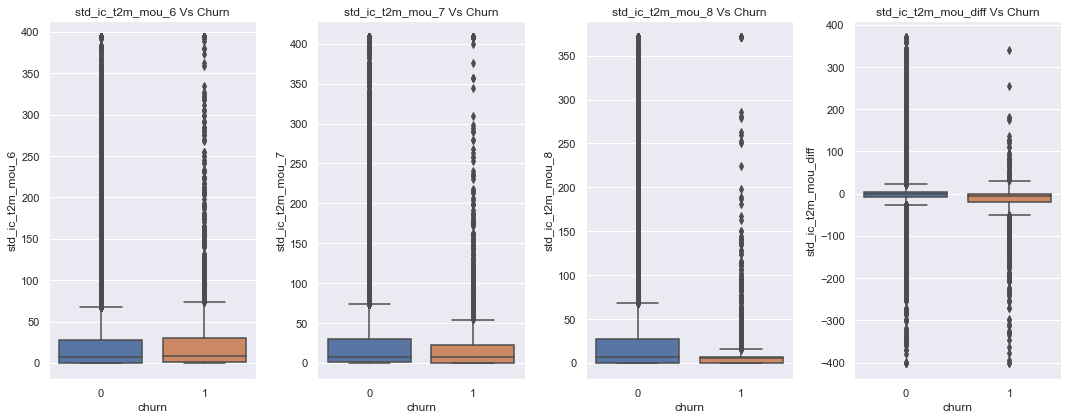

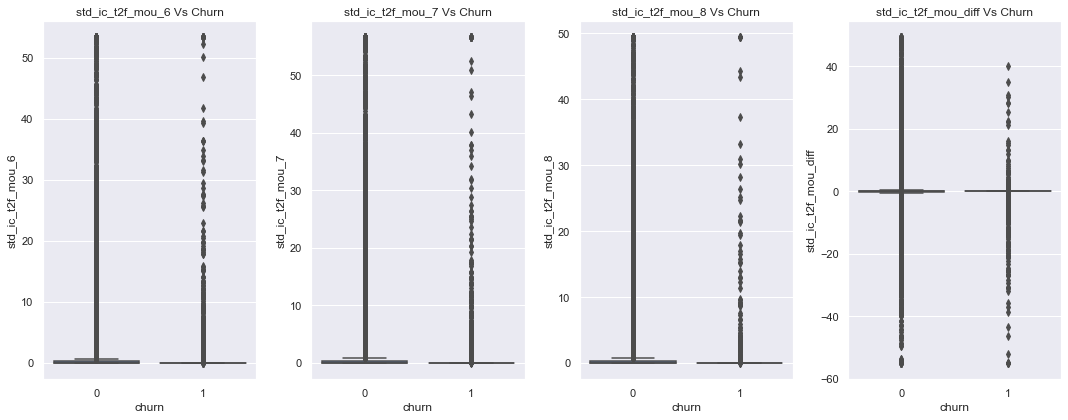

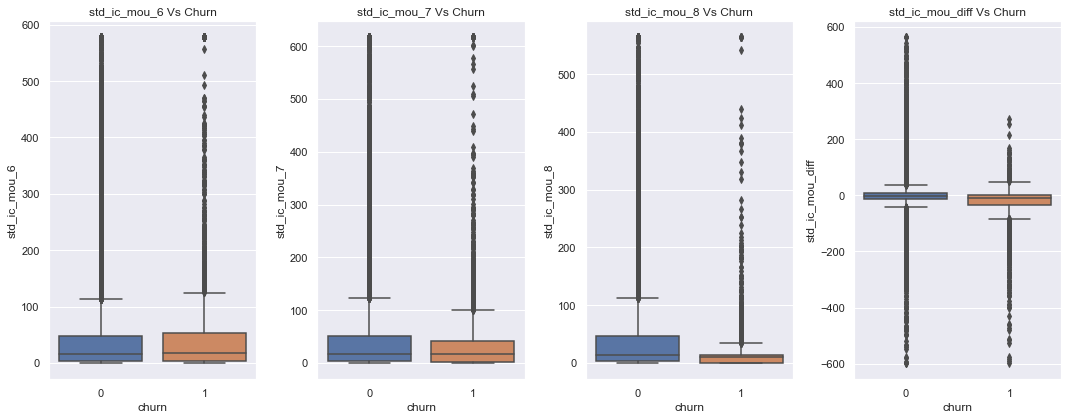

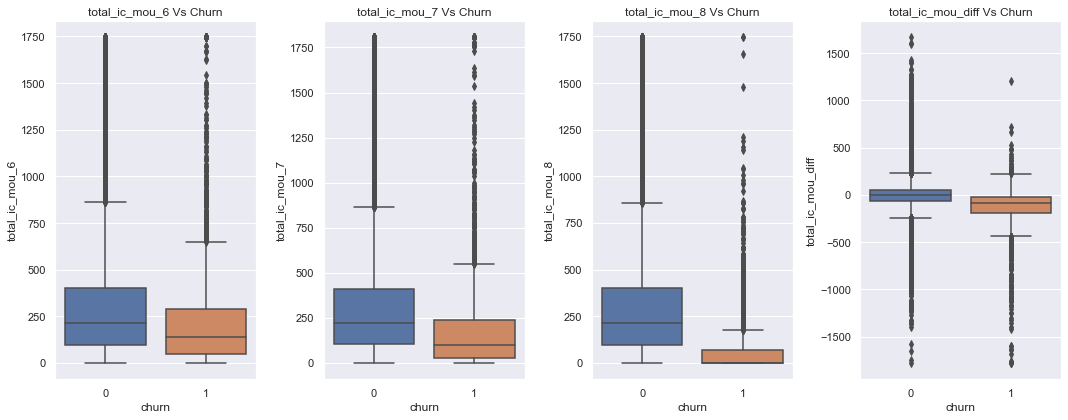

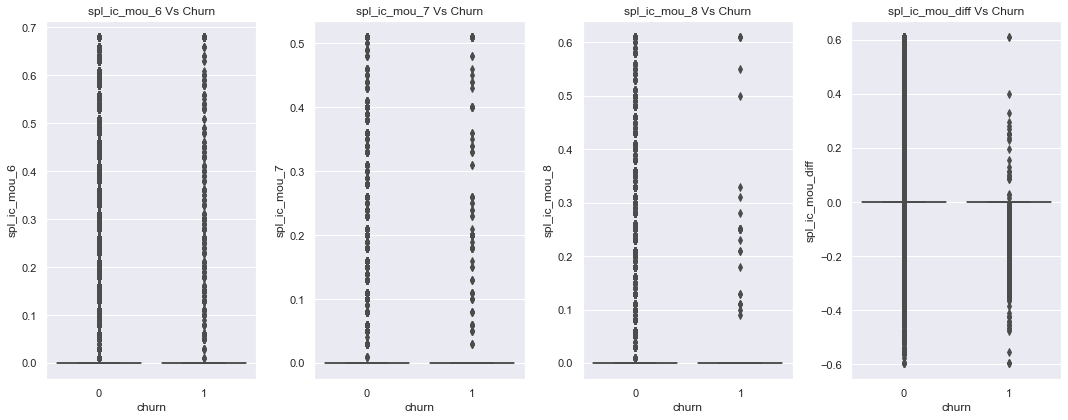

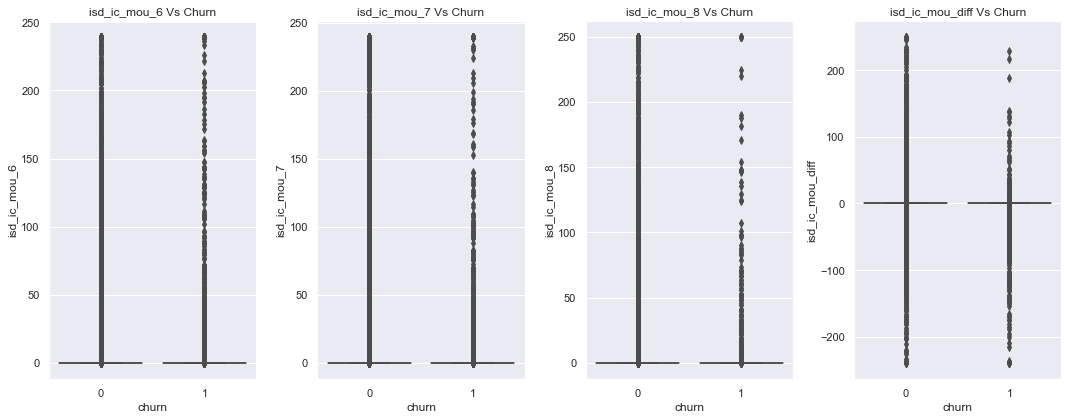

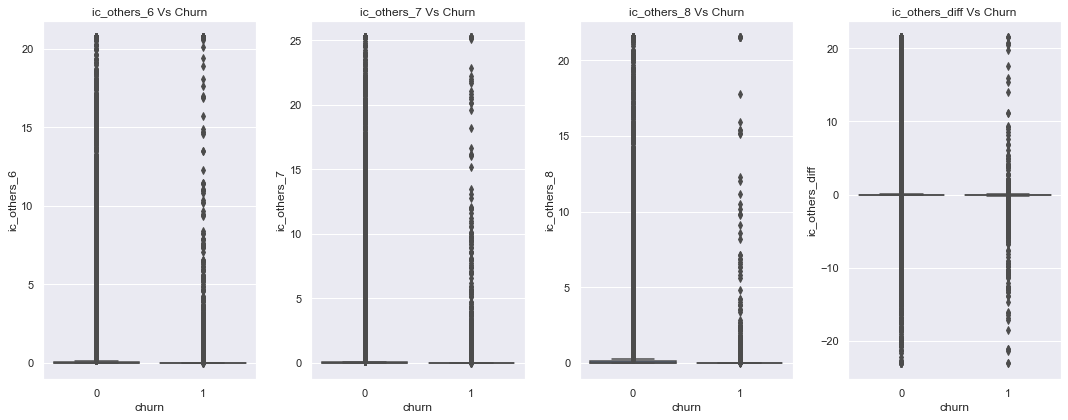

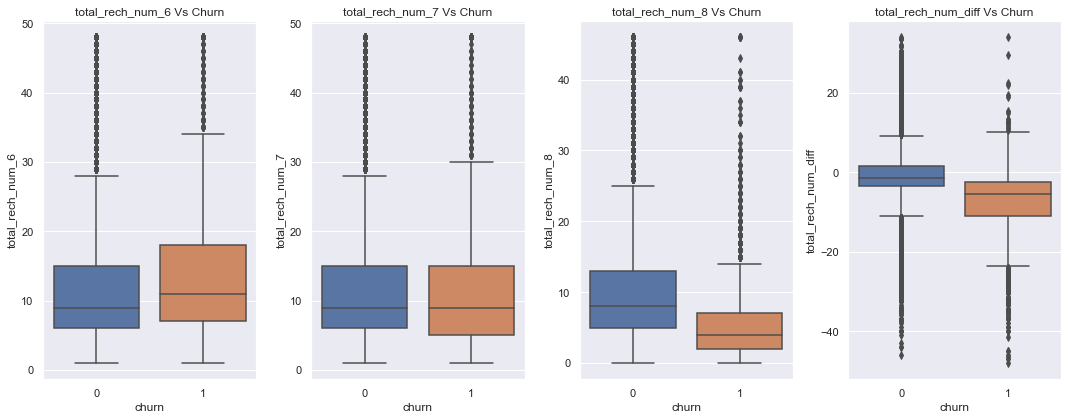

In [462]:
# Plotting each column associated with months w.r.t. target variable churn

for i,j,k,l in zip(col_6_EDA[21:31], col_7_EDA[21:31], col_8_EDA[21:31], col_diff_EDA[21:31]):
    plt.figure(figsize = (15,6))
    
    plt.subplot(1,4,1)
    sns.boxplot(x = 'churn',y = i, data = telecom_HVC)
    plt.title('%s Vs Churn' %i)
    
    plt.subplot(1,4,2)
    sns.boxplot(x = 'churn',y = j, data = telecom_HVC)
    plt.title('%s Vs Churn' %j)
    
    plt.subplot(1,4,3)
    sns.boxplot(x = 'churn',y = k, data = telecom_HVC)
    plt.title('%s Vs Churn' %k)

    plt.subplot(1,4,4)
    sns.boxplot(x = 'churn',y = l, data = telecom_HVC)
    plt.title('%s Vs Churn' %l)
    
    plt.tight_layout()
    plt.show()


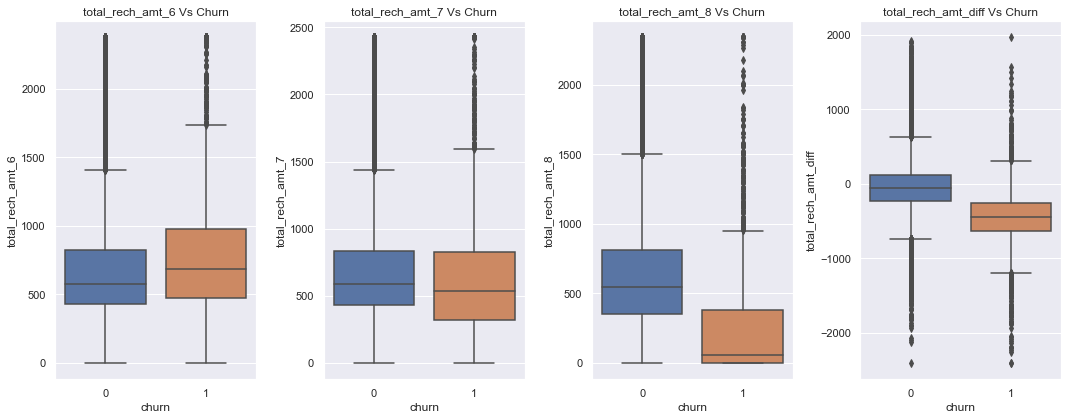

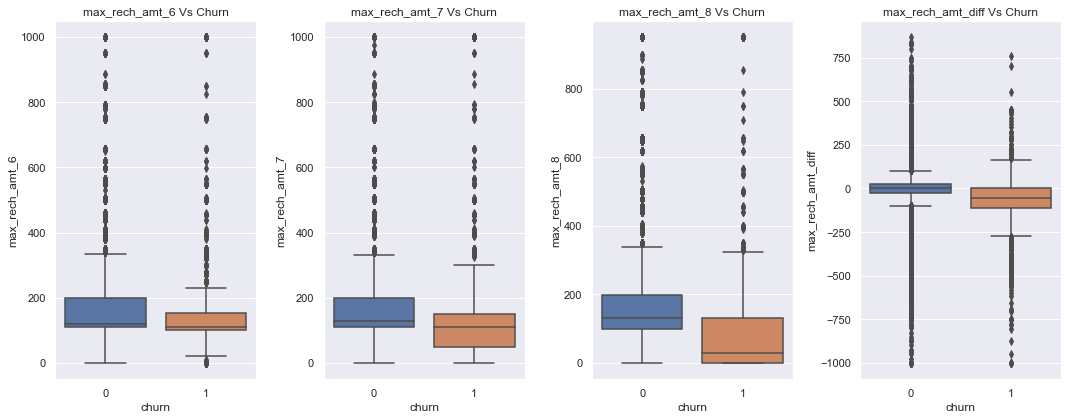

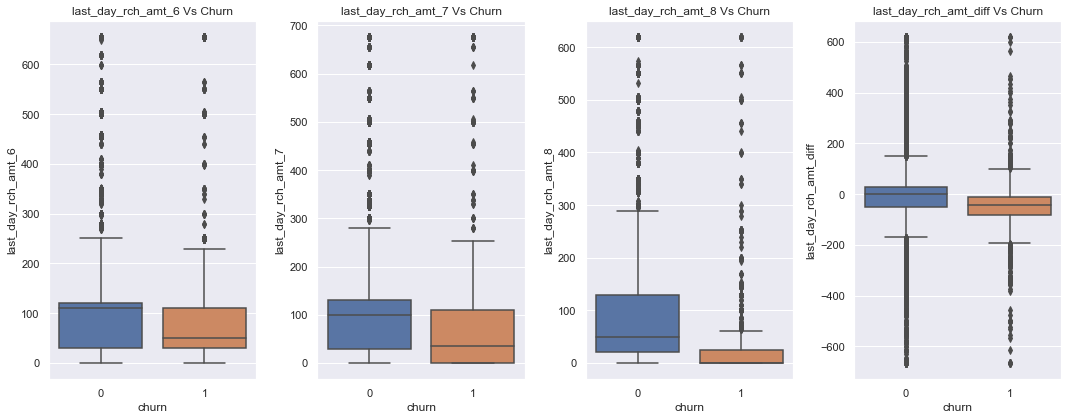

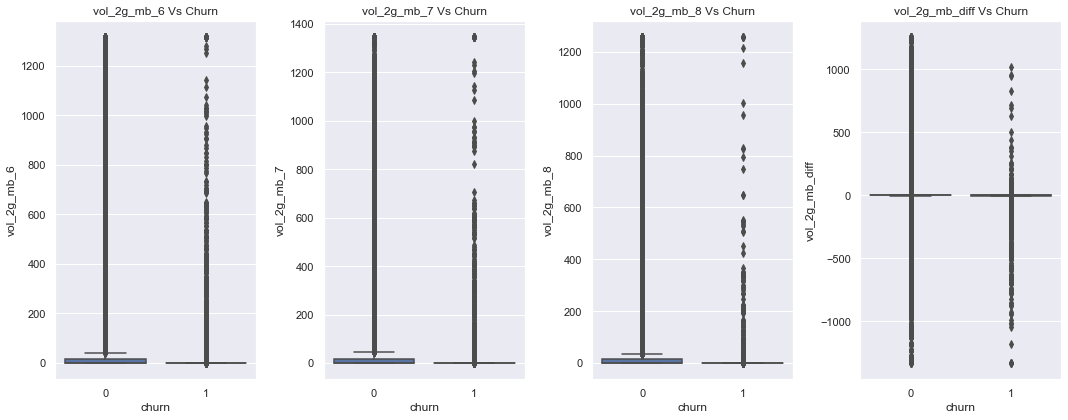

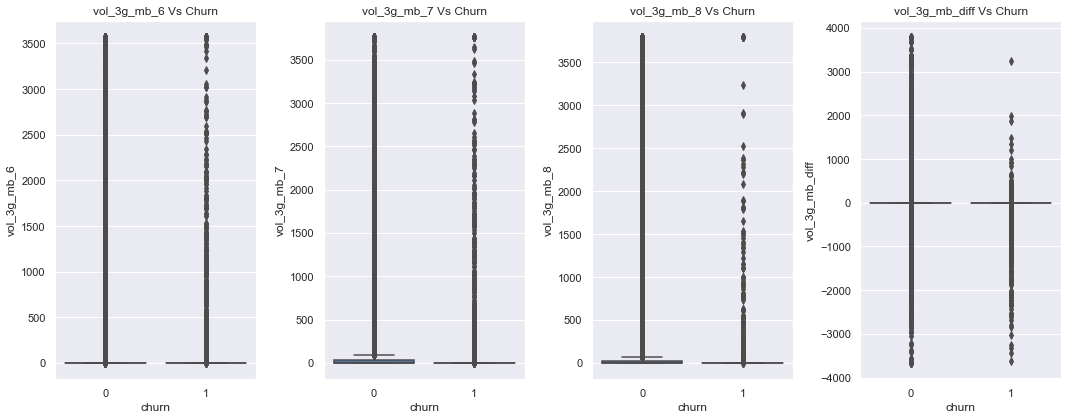

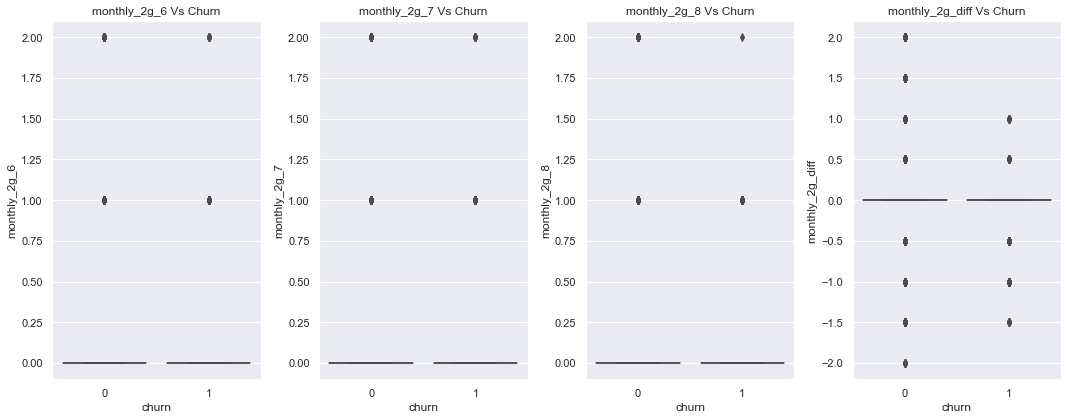

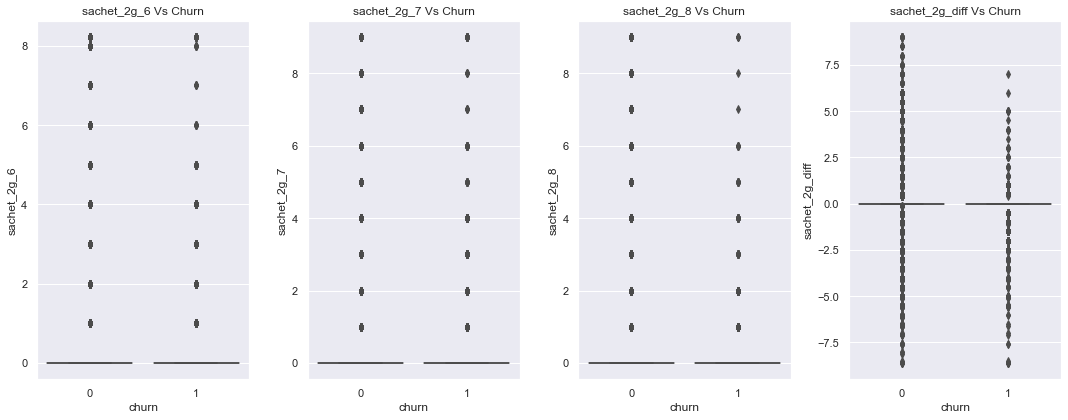

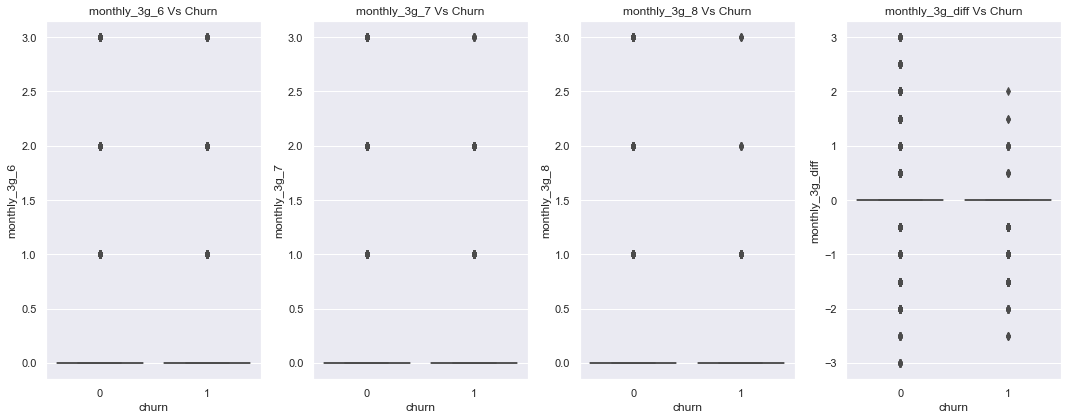

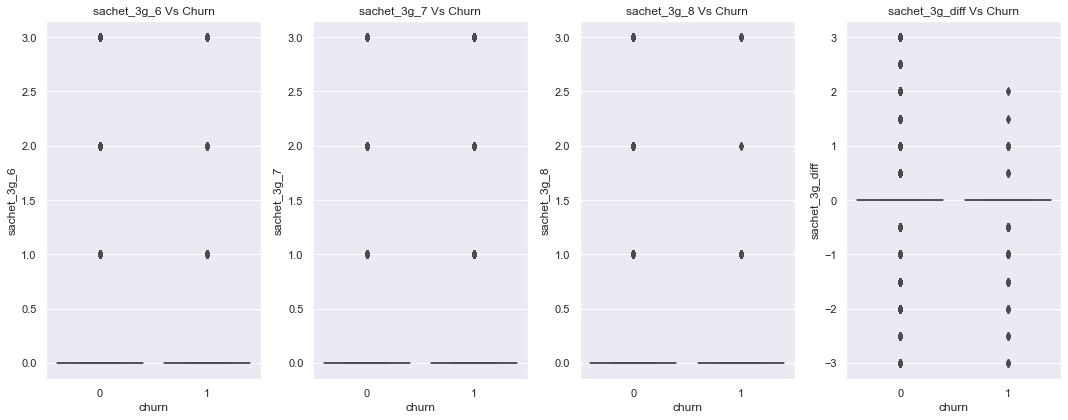

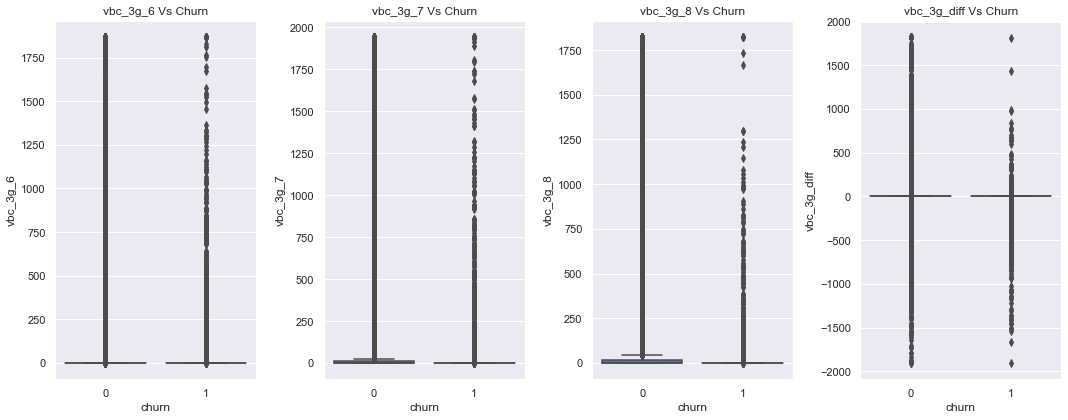

In [463]:
# Plotting each column associated with months w.r.t. target variable churn

for i,j,k,l in zip(col_6_EDA[31:42], col_7_EDA[31:42], col_8_EDA[31:42], col_diff_EDA[31:42]):
    plt.figure(figsize = (15,6))
    
    plt.subplot(1,4,1)
    sns.boxplot(x = 'churn',y = i, data = telecom_HVC)
    plt.title('%s Vs Churn' %i)
    
    plt.subplot(1,4,2)
    sns.boxplot(x = 'churn',y = j, data = telecom_HVC)
    plt.title('%s Vs Churn' %j)
    
    plt.subplot(1,4,3)
    sns.boxplot(x = 'churn',y = k, data = telecom_HVC)
    plt.title('%s Vs Churn' %k)

    plt.subplot(1,4,4)
    sns.boxplot(x = 'churn',y = l, data = telecom_HVC)
    plt.title('%s Vs Churn' %l)
    
    plt.tight_layout()
    plt.show()


### Inferences:

- from column associated with 'arpu','onnet_mou','offnet_mou','total_rech_amt','max_rech_amt' we get to know the expense from churned group is getting reduced.
- from column 'roam_ic_mou','roam_og_mou' we get to know that customers usage of these options is increased.

### 3.3 Correlation Analysis

In [464]:
# Create correlation matrix
corr_matrix = telecom_HVC.corr().abs()

# Select upper triangle of correlation matrix
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))

# Find index of feature columns with correlation greater than 0.7
to_drop = [column for column in upper.columns if any(upper[column] > 0.7)]

print(len(to_drop))

telecom_HVC = telecom_HVC.drop(to_drop, 1)


73


In [465]:
# After outlier treatment droping column which don't have much variance or zero variance

telecom_HVC = telecom_HVC.drop(['og_others_7','og_others_8','spl_ic_mou_6','spl_ic_mou_7','spl_ic_mou_8','aon'], 1)

In [466]:
telecom_HVC.shape

(29979, 87)

In [467]:
telecom_HVC.head()

,arpu_6,arpu_7,arpu_8,onnet_mou_6,offnet_mou_6,offnet_mou_7,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,loc_og_t2t_mou_6,loc_og_t2m_mou_6,loc_og_t2f_mou_6,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,isd_og_mou_6,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,og_others_6,loc_ic_t2t_mou_6,loc_ic_t2m_mou_6,loc_ic_t2f_mou_6,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2m_mou_6,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,isd_ic_mou_6,ic_others_6,ic_others_7,ic_others_8,total_rech_num_6,total_rech_num_7,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_3g_mb_6,monthly_2g_6,monthly_2g_7,monthly_2g_8,sachet_2g_6,sachet_2g_8,monthly_3g_7,sachet_3g_6,sachet_3g_7,sachet_3g_8,vbc_3g_8,churn,arpu_diff,onnet_mou_diff,offnet_mou_diff,roam_ic_mou_diff,loc_og_t2t_mou_diff,loc_og_t2m_mou_diff,loc_og_t2f_mou_diff,std_og_t2f_mou_diff,isd_og_mou_diff,spl_og_mou_diff,loc_ic_t2t_mou_diff,loc_ic_t2m_mou_diff,loc_ic_t2f_mou_diff,std_ic_t2t_mou_diff,std_ic_t2m_mou_diff,std_ic_t2f_mou_diff,isd_ic_mou_diff,ic_others_diff,total_rech_num_diff,max_rech_amt_diff,last_day_rch_amt_diff,vol_2g_mb_diff,vol_3g_mb_diff,monthly_2g_diff,sachet_2g_diff,monthly_3g_diff,sachet_3g_diff,vbc_3g_diff
7,1069.180,1349.8500,1988.08226,57.84,453.43,567.160,16.23,33.49,31.64,51.39,308.63,62.13,0.0,0.0,0.00,6.66,20.08,16.68,0.0,4.50,0.00,6.50,0.00,58.14,217.56,152.16,36.89,11.83,91.44,52.19,34.24,22.21,2.060,15.7400,15.19,15.14,5,5,1000,790,951,0,0.0,619,0.0,0.0,0.00,0.0,0,0,0,0.0,0,0,0,0,0,57.74,1,778.56726,-3.970,-184.3850,6.780,-1.105,-215.725,-5.405,3.31,9.92,4.25,-17.890,-98.335,-87.280,6.030,32.115,-21.005,23.2950,-0.3250,2.0,56.0,619.0,0.00,0.000,0.0,0.0,0.0,0.0,38.680
8,378.721,492.2230,137.36200,413.69,94.66,80.630,0.00,0.00,0.00,297.13,80.96,0.00,0.0,0.0,7.15,0.00,0.00,0.00,0.0,0.00,0.00,10.23,0.00,23.84,57.58,0.00,0.00,0.58,22.43,0.00,0.00,0.00,0.000,0.0000,0.00,0.00,19,21,90,154,30,50,0.0,10,0.0,356.0,0.03,0.0,0,1,0,0.0,3,0,0,0,0,21.03,0,-298.11000,-347.280,48.8350,0.000,-244.870,-25.230,0.000,0.00,0.00,10.23,-16.530,-20.300,0.000,-0.190,-12.605,0.000,0.0000,0.0000,-6.0,-92.0,-15.0,-177.97,-363.535,-0.5,2.5,0.0,0.0,-495.375
13,492.846,205.6710,593.26000,501.76,413.31,119.280,23.53,144.24,72.11,49.63,151.13,4.54,0.0,0.0,0.49,0.00,0.00,0.00,0.0,0.00,0.00,4.78,0.00,67.88,142.88,4.81,115.68,38.29,308.13,0.00,0.00,1.91,239.192,20.7408,16.24,21.44,6,4,110,110,130,110,50.0,0,0.0,0.0,0.02,0.0,0,0,0,0.0,3,0,0,0,0,0.00,0,244.00150,229.165,216.1650,-11.775,8.100,195.255,21.240,0.00,1.29,4.78,14.850,114.475,5.085,77.595,148.950,1.910,99.0874,2.9496,6.0,20.0,-80.0,0.02,0.000,0.0,3.0,0.0,0.0,0.000
16,430.975,299.8690,187.89400,50.51,296.29,229.740,0.00,2.83,0.00,42.61,273.29,0.00,0.0,0.0,0.00,0.00,0.00,0.00,0.0,0.00,3.26,5.91,0.00,41.33,226.81,8.71,68.79,78.64,18.68,0.51,0.00,2.18,0.000,0.0000,0.00,0.00,10,6,110,110,130,100,100.0,130,0.0,0.0,0.00,0.0,0,0,0,0.0,0,0,0,0,0,0.00,0,-177.52800,8.350,-100.2550,-1.415,13.495,-81.360,8.020,0.00,0.00,4.28,-27.495,-38.090,24.015,-67.385,28.050,1.925,0.2300,0.0000,-6.0,20.0,30.0,0.00,0.000,0.0,0.0,0.0,0.0,-12.170
17,690.008,25.6006,25.49900,1185.91,61.64,1.099,0.00,4.76,4.81,38.99,58.54,0.00,0.0,0.0,0.00,0.00,0.00,0.00,0.0,2.58,0.00,0.00,0.93,34.54,47.41,0.00,8.63,0.00,1.28,0.00,0.00,0.00,0.000,0.0000,0.00,0.00,19,2,110,0,30,30,0.0,0,0.0,0.0,0.00,0.0,0,0,0,0.0,0,0,0,0,0,0.00,0,-332.30530,-589.805,-25.8295,2.430,-19.495,-29.270,0.000,0.00,0.00,-1.29,-17.270,-24.860,0.000,-4.315,-0.640,0.000,0.0000,0.0000,-6.5,-25.0,-15.0,0.00,0.000,0.0,0.0,0.0,0.0,0.000


## 4. Model Building

### 4.1 Splitting Data into Training and Test Sets

In [468]:
from sklearn.model_selection import train_test_split

from sklearn.metrics import confusion_matrix

from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# Putting feature variable to X
X = telecom_HVC.drop(['churn'],axis=1)

# Putting response variable to y
y = telecom_HVC['churn']

In [469]:
# defining a normalisation function 

def normalize (x): 
    return ( (x-np.min(x))/ (max(x) - min(x)))
                                                                                          
# applying normalize ( ) to all columns 

X_norm = X.apply(normalize) 
X_norm.head()

,arpu_6,arpu_7,arpu_8,onnet_mou_6,offnet_mou_6,offnet_mou_7,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,loc_og_t2t_mou_6,loc_og_t2m_mou_6,loc_og_t2f_mou_6,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,isd_og_mou_6,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,og_others_6,loc_ic_t2t_mou_6,loc_ic_t2m_mou_6,loc_ic_t2f_mou_6,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2m_mou_6,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,isd_ic_mou_6,ic_others_6,ic_others_7,ic_others_8,total_rech_num_6,total_rech_num_7,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_3g_mb_6,monthly_2g_6,monthly_2g_7,monthly_2g_8,sachet_2g_6,sachet_2g_8,monthly_3g_7,sachet_3g_6,sachet_3g_7,sachet_3g_8,vbc_3g_8,arpu_diff,onnet_mou_diff,offnet_mou_diff,roam_ic_mou_diff,loc_og_t2t_mou_diff,loc_og_t2m_mou_diff,loc_og_t2f_mou_diff,std_og_t2f_mou_diff,isd_og_mou_diff,spl_og_mou_diff,loc_ic_t2t_mou_diff,loc_ic_t2m_mou_diff,loc_ic_t2f_mou_diff,std_ic_t2t_mou_diff,std_ic_t2m_mou_diff,std_ic_t2f_mou_diff,isd_ic_mou_diff,ic_others_diff,total_rech_num_diff,max_rech_amt_diff,last_day_rch_amt_diff,vol_2g_mb_diff,vol_3g_mb_diff,monthly_2g_diff,sachet_2g_diff,monthly_3g_diff,sachet_3g_diff,vbc_3g_diff
7,0.534739,0.670877,1.000000,0.026693,0.194390,0.234889,0.046432,0.114358,0.109657,0.047732,0.268883,0.683540,0.0,0.0,0.000000,0.149929,0.457072,0.42849,0.0,0.063041,0.000000,0.087659,0.000000,0.092945,0.211929,0.771168,0.171040,0.051143,0.232122,0.977323,0.604889,0.449504,0.008612,0.758891,0.601189,0.703205,0.085106,0.085106,1.00,0.790,1.000000,0.000000,0.000000,1.000000,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.031678,0.699927,0.504573,0.498405,0.537904,0.532969,0.403685,0.488258,0.571411,0.704181,0.533372,0.490171,0.455504,0.294501,0.522714,0.560941,0.325612,0.537049,0.509248,0.609756,0.565462,1.000000,0.514195,0.491564,0.500,0.488927,0.5,0.5,0.521405
8,0.183426,0.236395,0.069093,0.190915,0.040222,0.033002,0.000000,0.000000,0.000000,0.275980,0.070534,0.000000,0.0,0.0,0.247557,0.000000,0.000000,0.00000,0.0,0.000000,0.000000,0.137962,0.000000,0.038112,0.056090,0.000000,0.000000,0.002507,0.056939,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.382979,0.425532,0.09,0.154,0.031546,0.076336,0.000000,0.016155,0.0,0.264461,0.000024,0.0,0.0,0.5,0.0,0.0,0.333333,0.0,0.0,0.0,0.0,0.011538,0.427883,0.425466,0.551608,0.526784,0.411252,0.491215,0.519193,0.531581,0.566539,0.573292,0.491266,0.496819,0.519949,0.508549,0.503041,0.526784,0.489423,0.516546,0.512195,0.486212,0.506404,0.445457,0.442818,0.375,0.630892,0.5,0.5,0.378135
13,0.241494,0.091225,0.298408,0.231559,0.177150,0.049040,0.067316,0.492536,0.249916,0.046097,0.131667,0.049948,0.0,0.0,0.016965,0.000000,0.000000,0.00000,0.0,0.000000,0.000000,0.064463,0.000000,0.108516,0.139182,0.024378,0.536350,0.165535,0.782194,0.000000,0.000000,0.038656,1.000000,1.000000,0.642746,0.995820,0.106383,0.063830,0.11,0.110,0.136698,0.167939,0.073975,0.000000,0.0,0.000000,0.000016,0.0,0.0,0.0,0.0,0.0,0.333333,0.0,0.0,0.0,0.0,0.000000,0.564858,0.558293,0.589781,0.507472,0.537565,0.592525,0.640759,0.531581,0.584438,0.536910,0.516521,0.568174,0.533084,0.685694,0.712211,0.545077,0.692002,0.582779,0.658537,0.546185,0.455798,0.514203,0.491564,0.500,0.659284,0.5,0.5,0.511028
16,0.210013,0.138947,0.094510,0.023310,0.126865,0.094876,0.000000,0.009664,0.000000,0.039577,0.238094,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.00000,0.0,0.000000,0.040793,0.079702,0.000000,0.066072,0.220940,0.044144,0.318945,0.339976,0.047420,0.009550,0.000000,0.044121,0.000000,0.000000,0.000000,0.000000,0.191489,0.106383,0.11,0.110,0.136698,0.152672,0.147951,0.210016,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.458350,0.507412,0.517597,0.524463,0.540259,0.465424,0.565095,0.531581,0.566539,0.533572,0.482441,0.487400,0.581981,0.355521,0.555678,0.545220,0.489894,0.516546,0.51

In [470]:
X_train, X_test, y_train, y_test = train_test_split(X_norm, y, train_size=0.7,test_size=0.3,random_state=100)

print(" X_train : ", X_train.shape)
print(" y_train : ", y_train.shape)
print(" X_test : ", X_test.shape)
print(" y_test : ", y_test.shape)

 X_train :  (20985, 86)
 y_train :  (20985,)
 X_test :  (8994, 86)
 y_test :  (8994,)


## 4.2 PCA

### 4.2.1 Seems There is a class imbalance in curn event rate
- We can add class_weight = 'balanced'
- Lets do PCA 

In [471]:
#Improting the PCA module

from sklearn.decomposition import PCA

pca = PCA(random_state=42)

In [472]:
# Applying the PCA on the train data

pca.fit(X_train)

PCA(random_state=42)

In [473]:
print(pca.components_)

colnames = list(X_train.columns)

pcs_df = pd.DataFrame({'PC1':pca.components_[0],'PC2':pca.components_[1], 
                       'PC3':pca.components_[2],'PC4':pca.components_[3],
                       'PC5':pca.components_[4],'PC6':pca.components_[5],
                       'PC7':pca.components_[6],'PC8':pca.components_[7],
                       'PC9':pca.components_[8],'PC10':pca.components_[9],
                       'Feature':colnames})
pcs_df.head(10)

[[ 1.73939467e-01  2.00176659e-01  2.42237410e-01 ...  4.18767617e-03
  -1.07417710e-03  7.31274381e-03]
 [ 3.07719713e-01  2.93330239e-01  2.57769913e-01 ...  5.60997561e-03
   2.44656464e-03  1.75500670e-03]
 [-1.77890629e-02  1.49081087e-02  4.07797027e-02 ...  2.65502371e-03
  -3.25289909e-03  1.14751533e-02]
 ...
 [ 0.00000000e+00 -6.29601321e-17 -3.38960938e-17 ... -2.56739074e-16
  -5.34909413e-02 -2.42861287e-17]
 [ 0.00000000e+00  2.24805314e-16 -4.10886951e-16 ... -9.71445147e-17
   7.92946621e-02  1.17961196e-16]
 [-0.00000000e+00 -8.67361738e-17  1.48448820e-16 ...  1.49186219e-16
  -7.51734501e-02  8.93382590e-17]]


,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,Feature
0,0.173939,0.307720,-0.017789,-0.040495,-0.167941,0.006763,-0.014555,0.233507,0.168992,0.044287,arpu_6
1,0.200177,0.293330,0.014908,0.122435,-0.166686,-0.103270,0.117285,-0.040346,-0.053620,-0.062822,arpu_7
2,0.242237,0.257770,0.040780,0.161058,-0.137571,-0.105098,0.141116,-0.140338,-0.338413,-0.081750,arpu_8
3,-0.051674,0.170644,-0.080366,0.042056,-0.066398,-0.085864,0.030164,0.575289,-0.250354,0.087261,onnet_mou_6
4,0.081481,0.303958,-0.140940,-0.210491,-0.112203,-0.110533,-0.010389,-0.184675,0.308574,0.062248,offnet_mou_6
5,0.084915,0.282288,-0.118173,-0.083482,-0.105532,-0.201613,0.094917,-0.333459,0.139853,-0.006994,offnet_mou_7
6,0.038493,0.008135,-0.016857,0.086752,-0.060603,-0.091316,0.189952,0.033686,0.084032,0.140430,roam_ic_mou_6
7,0.042031,0.011320,-0.021623,0.058711,-0.054386,-0.065840,0.163398,0.064643,0.090646,0.148054,roam_ic_mou_7
8,0.047964,0.026588,-0.015193,0.047129,-0.049923,-0.059813,0.153961,0.058369,0.077069,0.136455,roam_ic_mou_8
9,0.056319,0.089692,-0.034261,-0.121210,-0.001666,0.085260,-0.139293,0.258106,-0.274684,0.078639,loc_og_t2t_mou_6


In [474]:
np.cumsum(pca.explained_variance_ratio_)

array([0.09595145, 0.17237546, 0.23709102, 0.28342034, 0.32508489,
       0.36368311, 0.39942696, 0.43340176, 0.46262534, 0.48981709,
       0.5137589 , 0.53575396, 0.55692271, 0.57709911, 0.59712657,
       0.61550982, 0.6331272 , 0.64995579, 0.66599828, 0.68107975,
       0.69575708, 0.71000191, 0.72388542, 0.73726979, 0.75059482,
       0.76258256, 0.77412141, 0.78525371, 0.79609983, 0.80683288,
       0.81687987, 0.82665292, 0.83628635, 0.84553633, 0.85442246,
       0.86303779, 0.87116652, 0.87884796, 0.88621133, 0.8932894 ,
       0.90020657, 0.90681604, 0.91291642, 0.91890491, 0.92453144,
       0.9300796 , 0.93547168, 0.94075917, 0.94592322, 0.9505592 ,
       0.955052  , 0.95931053, 0.96343595, 0.96734972, 0.97115878,
       0.97477425, 0.97800646, 0.98062768, 0.98287739, 0.98489594,
       0.98655779, 0.98813367, 0.98958391, 0.99093822, 0.99210953,
       0.99326363, 0.99439628, 0.99545475, 0.99641709, 0.99733023,
       0.99799992, 0.99862429, 0.99917705, 0.99968157, 1.     

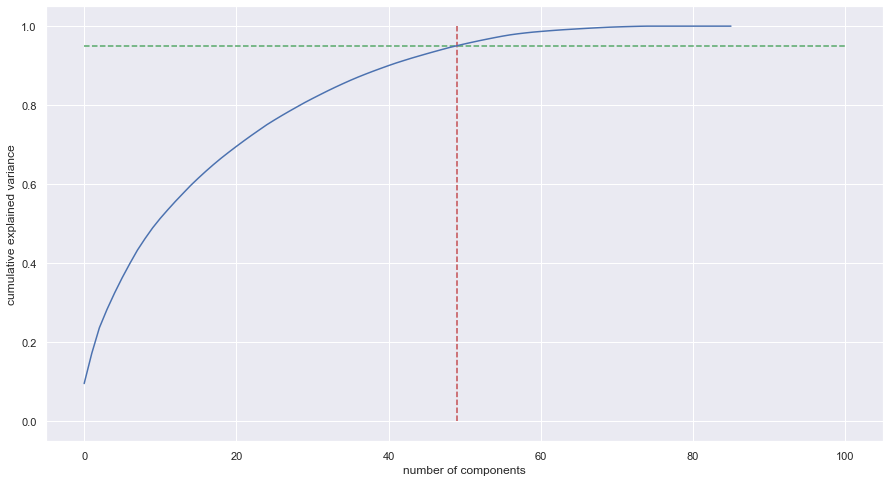

In [475]:
fig = plt.figure(figsize = (15,8))

plt.plot(np.cumsum(pca.explained_variance_ratio_))

plt.xlabel('number of components')
plt.ylabel('cumulative explained variance')

plt.vlines(x=49, ymax=1.00, ymin=0, colors="r", linestyles="--")
plt.hlines(y=0.95, xmax=100, xmin=0, colors="g", linestyles="--")

plt.show()

#### As we can see 49 component explain 95% of variance in the data

In [476]:
from sklearn.decomposition import IncrementalPCA

pca_final = IncrementalPCA(n_components=49)

df_train_pca = pca_final.fit_transform(X_train)

df_train_pca.shape

(20985, 49)

### 4.2.2 Correlation matrix

In [477]:
# creating correlation matrix for the principal components

corrmat = np.corrcoef(df_train_pca.transpose())

corrmat

array([[ 1.00000000e+00,  5.43639917e-07,  2.20280331e-06, ...,
        -4.02111900e-05, -5.45078002e-05,  8.14704105e-05],
       [ 5.43639917e-07,  1.00000000e+00,  8.62301948e-07, ...,
         4.33823959e-05, -1.63457471e-04,  2.94093500e-05],
       [ 2.20280331e-06,  8.62301948e-07,  1.00000000e+00, ...,
        -4.04517182e-05, -1.99236453e-04,  8.67015075e-05],
       ...,
       [-4.02111900e-05,  4.33823959e-05, -4.04517182e-05, ...,
         1.00000000e+00,  4.34840749e-04, -1.26354211e-03],
       [-5.45078002e-05, -1.63457471e-04, -1.99236453e-04, ...,
         4.34840749e-04,  1.00000000e+00, -6.57108327e-03],
       [ 8.14704105e-05,  2.94093500e-05,  8.67015075e-05, ...,
        -1.26354211e-03, -6.57108327e-03,  1.00000000e+00]])

In [478]:
# Removing dial values
corrmat_nodiag = corrmat - np.diagflat(corrmat.diagonal())
print("max corr:",corrmat_nodiag.max(), ", min corr: ", corrmat_nodiag.min(),)


max corr: 0.0058587815771080146 , min corr:  -0.009577217237166133


In [479]:
# Applying selected components to the test data

df_test_pca = pca_final.transform(X_test)
df_test_pca.shape

(8994, 49)

### 4.3 LogisticRegression model with PCA

- Now lets do the modeling with selected 49 pca feature 
- We will use class imbalance module with regression  with class_width = balanced

In [480]:
# Training the model 

from sklearn.linear_model import LogisticRegression
from sklearn import metrics

learner_pca = LogisticRegression(class_weight='balanced')
model_pca = learner_pca.fit(df_train_pca,y_train)

- Making prediction on the test data

In [481]:
# Predicting probabilities

pred_probs_test = model_pca.predict_proba(df_test_pca)[:,1]

"{:2.2}".format(metrics.roc_auc_score(y_test, pred_probs_test))

'0.86'

In [482]:
# prediction on the test data
pred_test = model_pca.predict_proba(df_test_pca)
y_pred_default = model_pca.predict(df_test_pca)

In [483]:
print(classification_report(y_test,y_pred_default))
print(confusion_matrix(y_test,y_pred_default))
print(accuracy_score(y_test,y_pred_default))

              precision    recall  f1-score   support

           0       0.98      0.81      0.88      8179
           1       0.29      0.80      0.43       815

    accuracy                           0.81      8994
   macro avg       0.64      0.80      0.66      8994
weighted avg       0.91      0.81      0.84      8994

[[6613 1566]
 [ 162  653]]
0.8078719146097398


In [484]:
# Converting y_pred to a dataframe which is an array

y_pred_df = pd.DataFrame(pred_test)

# Converting to column dataframe

y_pred_1 = y_pred_df.iloc[:,[1]]

# Removing index for both dataframes

y_pred_1.reset_index(drop=True, inplace=True)

y_test.reset_index(drop=True, inplace=True)

# Appending y_test_df and y_pred_1

y_pred_final = pd.concat([y_test,y_pred_1],axis=1)

# Renaming the column 
y_pred_final= y_pred_final.rename(columns={ 1 : 'churn_prob'})


In [485]:
from sklearn.metrics import roc_curve, auc

fpr, tpr, thresholds =roc_curve(y_pred_final.churn,y_pred_final.churn_prob)

roc_auc = auc(fpr, tpr)

print('ROC_AUC score: ',roc_auc)

ROC_AUC score:  0.86233485876219


### 4.3.1 ROC Curve

In [486]:
#ROC Curve

def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(6, 6))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return fpr, tpr, thresholds

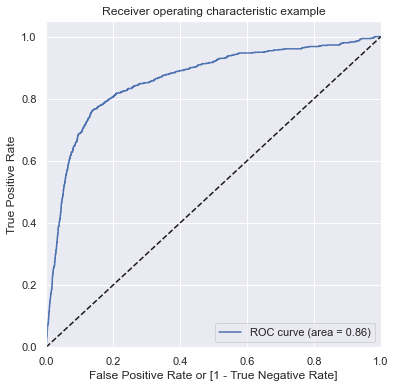

(array([0.00000000e+00, 1.22264335e-04, 1.22264335e-04, ...,
        9.99755471e-01, 9.99877736e-01, 1.00000000e+00]),
 array([0.        , 0.        , 0.00122699, ..., 1.        , 1.        ,
        1.        ]),
 array([1.99836349e+00, 9.98363490e-01, 9.97610674e-01, ...,
        1.07739400e-04, 7.83645257e-05, 2.84336630e-05]))

In [487]:
# Plotting ROC Curve

draw_roc(y_pred_final.churn, y_pred_final.churn_prob)

In [488]:
# Let's create columns with different probability cutoffs 

numbers = [float(x)/10 for x in range(10)]

for i in numbers:
    y_pred_final[i]= y_pred_final.churn_prob.map( lambda x: 1 if x > i else 0)
    
y_pred_final.head()

,churn,churn_prob,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,0,0.025691,1,0,0,0,0,0,0,0,0,0
1,0,0.149127,1,1,0,0,0,0,0,0,0,0
2,0,0.152962,1,1,0,0,0,0,0,0,0,0
3,0,0.359236,1,1,1,1,0,0,0,0,0,0
4,0,0.456135,1,1,1,1,1,0,0,0,0,0


- Now let's calculate accuracy sensitivity and specificity for various probability cutoffs.

In [489]:
# Now let's calculate accuracy sensitivity and specificity for various probability cutoffs.

cutoff_df = pd.DataFrame( columns = ['prob','accuracy','sensi','speci'])

num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]

for i in num:
    cm1 = metrics.confusion_matrix( y_pred_final.churn, y_pred_final[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    sensi = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    speci = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]

print(cutoff_df)

     prob  accuracy     sensi     speci
0.0   0.0  0.090616  0.000000  1.000000
0.1   0.1  0.310540  0.245751  0.960736
0.2   0.2  0.478764  0.432571  0.942331
0.3   0.3  0.604625  0.575620  0.895706
0.4   0.4  0.722704  0.710111  0.849080
0.5   0.5  0.807872  0.808534  0.801227
0.6   0.6  0.861352  0.873823  0.736196
0.7   0.7  0.894485  0.920773  0.630675
0.8   0.8  0.909273  0.954640  0.453988
0.9   0.9  0.911163  0.984472  0.175460


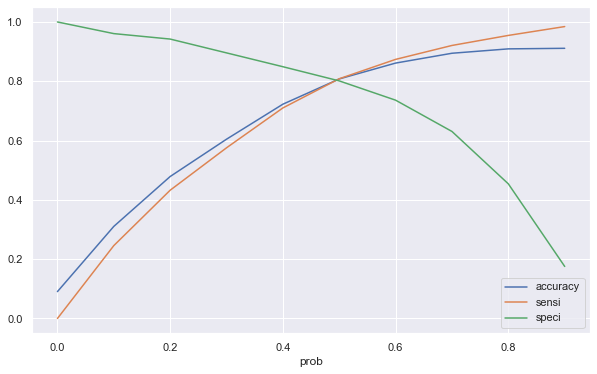

In [490]:
# Let's plot accuracy sensitivity and specificity for various probabilities.

cutoff_df.plot.line(x='prob', y=['accuracy','sensi','speci'], figsize = (10,6))
plt.show()

In [491]:
## Finidng the optimal cutoff

def Find_Optimal_Cutoff(target, predicted):

    fpr, tpr, threshold = roc_curve(target, predicted)
    
    i = np.arange(len(tpr)) 
    
    roc = pd.DataFrame({'tf' : pd.Series(tpr-(1-fpr), index=i), 'threshold' : pd.Series(threshold, index=i)})
    
    roc_t = roc.iloc[(roc.tf-0).abs().argsort()[:1]]

    return list(roc_t['threshold'])

# Finding the optimal probability threshold

threshold = Find_Optimal_Cutoff(y_pred_final.churn,y_pred_final.churn_prob)

print('Threshold: ',threshold)

Threshold:  [0.4924355001633765]


- Creating new column 'predicted' with 1 if Churn_Prob>0.49 else 0

In [492]:
# Creating new column 'predicted' with 1 if Churn_Prob > 0.49 else 0

y_pred_final['pred_churn'] = y_pred_final.churn_prob.map( lambda x: 1 if x > 0.49 else 0)

y_pred_final.churn.value_counts()

0    8179
1     815
Name: churn, dtype: int64

### 4.3.2 Confusion matrix 

In [493]:
# Confusion matrix 

confusion = metrics.confusion_matrix( y_pred_final.churn, y_pred_final.pred_churn )

confusion

array([[6553, 1626],
       [ 159,  656]], dtype=int64)

### 4.3.3 Logistic Regression model matrics with PCA -

In [494]:
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

print('Accuracy Score on test data: ', round(accuracy_score(y_test,y_pred_default),4))

# Let's see the sensitivity of our logistic regression model
print('Sensitivity: ', (round(TP / float(TP+FN),4)))

# Let us calculate specificity
print('Specificity: ',(round(TN / float(TN+FP),4)))

# Calculate false postive rate - predicting churn when customer does not have churned
print('false postive rate: ',round(FP/ float(TN+FP),4))

# positive predictive value 
print('positive predictive value: ', round(TP / float(TP+FP),4))

# Negative predictive value
print('Negative predictive value: ',round(TN / float(TN+ FN),4))

## Misclassification rate

print('Misclassification Rate: ',round((FN+FP)/(TP+TN+FP+FN),4))

Accuracy Score on test data:  0.8079
Sensitivity:  0.8049
Specificity:  0.8012
false postive rate:  0.1988
positive predictive value:  0.2875
Negative predictive value:  0.9763
Misclassification Rate:  0.1985


### 4.4 LogistcRegression model with RFE
- As we have seen with PCA we select 49 component.
- We are selecting 15 feature from RFE

In [495]:
from sklearn.feature_selection import RFE
logreg = LogisticRegression(class_weight='balanced')

rfe = RFE(logreg, 15)             
rfe = rfe.fit(X_norm,y)

print(rfe.support_)           
print(rfe.ranking_)           

[ True False  True False False False False False  True False  True False
 False False False False False False False False False False False False
  True  True False False False False False False False False False False
  True False False False False False False  True False False False False
 False False  True False False False False False False False False False
 False False False  True False False False False False  True  True  True
 False False False False  True False False False False False False  True
 False False]
[ 1 10  1 34 23 51 58 20  1 12  1 25 42 64 41 59 71 13 16 69 48 29 70  6
  1  1 31 46 21 68 67 24 38 47 44 35  1 11 27 18 43 45 19  1 55 53 17 40
 37 36  1 49  4 26 60 33 32  7 28 14 57 50  8  1 63 52 15 62  3  1  1  1
  5 30  2 72  1 65 54 22  9 66 61  1 56 39]


In [496]:
col = X_train.columns[rfe.support_]
col

Index(['arpu_6', 'arpu_8', 'roam_ic_mou_8', 'loc_og_t2m_mou_6',
       'loc_ic_t2m_mou_6', 'loc_ic_t2f_mou_6', 'total_rech_num_6',
       'last_day_rch_amt_8', 'monthly_2g_8', 'loc_og_t2m_mou_diff',
       'loc_ic_t2m_mou_diff', 'loc_ic_t2f_mou_diff', 'std_ic_t2t_mou_diff',
       'total_rech_num_diff', 'monthly_3g_diff'],
      dtype='object')

In [497]:
import statsmodels.api as sm

In [498]:
# Building model with 15 features derived with PCA

X_train_sm = sm.add_constant(X_train[col])

logm2 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())

res = logm2.fit()

res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                  churn   No. Observations:                20985
Model:                            GLM   Df Residuals:                    20969
Model Family:                Binomial   Df Model:                           15
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -4363.1
Date:                Mon, 05 Apr 2021   Deviance:                       8726.2
Time:                        17:24:32   Pearson chi2:                 1.44e+05
No. Iterations:                     8                                         
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                  10.7525      0.821     13.103      0.000       9.144      12.361
arpu_6                  2.8717      0.198     14.516      0.000       2.484       3.259
arpu_8                 -5.1407      0.310    -16.581      0.000      -5.748      -4.533
roam_ic_mou_8           1.9723      0.161     12.264      0.000       1.657       2.288
loc_og_t2m_mou_6       -0.7418      0.340     -2.183      0.029      -1.408      -0.076
loc_ic_t2m_mou_6       -2.0242      0.365     -5.544      0.000      -2.740      -1.309
loc_ic_t2f_mou_6       -2.9212      0.457     -6.399      0.000      -3.816      -2.026
total_rech_num_6       -2.4307      0.238    -10.196      0.000      -2.898      -1.963
last_day_rch_amt_8     -4.0589      0.319    -12.709      0.000      -4.685      -3.433
monthly_2g_8           -2.5551      0.366     -6.980      0.000      -3.273      -1.838
loc_og_t2m_mou_diff     2.6065      0.912      2.858      0.004       0.819       4.394
loc_ic_t2m_mou_diff    -7.7389      0.974     -7.949      0.000      -9.647      -5.831
loc_ic_t2f_mou_diff    -6.5541      1.177     -5.569      0.000      -8.861      -4.248
std_ic_t2t_mou_diff    -2.9233      0.507     -5.765      0.000      -3.917      -1.929
total_rech_num_diff    -7.4117      0.570    -13.007      0.000      -8.529      -6.295
monthly_3g_diff        -0.4077      0.500     -0.816      0.415      -1.387       0.572
=======================================================================================
"""

In [499]:
col = col.drop('monthly_3g_diff',1)
col

Index(['arpu_6', 'arpu_8', 'roam_ic_mou_8', 'loc_og_t2m_mou_6',
       'loc_ic_t2m_mou_6', 'loc_ic_t2f_mou_6', 'total_rech_num_6',
       'last_day_rch_amt_8', 'monthly_2g_8', 'loc_og_t2m_mou_diff',
       'loc_ic_t2m_mou_diff', 'loc_ic_t2f_mou_diff', 'std_ic_t2t_mou_diff',
       'total_rech_num_diff'],
      dtype='object')

In [500]:
# Building model again

X_train_sm = sm.add_constant(X_train[col])

logm3 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())

res = logm3.fit()

res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                  churn   No. Observations:                20985
Model:                            GLM   Df Residuals:                    20970
Model Family:                Binomial   Df Model:                           14
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -4363.5
Date:                Mon, 05 Apr 2021   Deviance:                       8726.9
Time:                        17:24:32   Pearson chi2:                 1.45e+05
No. Iterations:                     8                                         
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                  10.5384      0.777     13.556      0.000       9.015      12.062
arpu_6                  2.9026      0.194     14.941      0.000       2.522       3.283
arpu_8                 -5.1676      0.308    -16.760      0.000      -5.772      -4.563
roam_ic_mou_8           1.9746      0.161     12.283      0.000       1.660       2.290
loc_og_t2m_mou_6       -0.7472      0.340     -2.199      0.028      -1.413      -0.081
loc_ic_t2m_mou_6       -2.0189      0.365     -5.531      0.000      -2.734      -1.303
loc_ic_t2f_mou_6       -2.9249      0.457     -6.406      0.000      -3.820      -2.030
total_rech_num_6       -2.4552      0.237    -10.368      0.000      -2.919      -1.991
last_day_rch_amt_8     -4.0564      0.319    -12.705      0.000      -4.682      -3.431
monthly_2g_8           -2.5400      0.365     -6.952      0.000      -3.256      -1.824
loc_og_t2m_mou_diff     2.6250      0.912      2.880      0.004       0.838       4.412
loc_ic_t2m_mou_diff    -7.7296      0.974     -7.940      0.000      -9.638      -5.821
loc_ic_t2f_mou_diff    -6.5483      1.177     -5.565      0.000      -8.854      -4.242
std_ic_t2t_mou_diff    -2.9104      0.507     -5.744      0.000      -3.903      -1.917
total_rech_num_diff    -7.4262      0.570    -13.027      0.000      -8.543      -6.309
=======================================================================================
"""

In [501]:
# Check for the VIF values of the feature variables.

from statsmodels.stats.outliers_influence import variance_inflation_factor

In [502]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs

vif = pd.DataFrame()

vif['Features'] = X_train[col].columns

vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]

vif['VIF'] = round(vif['VIF'], 2)

vif = vif.sort_values(by = "VIF", ascending = False)

vif

,Features,VIF
10,loc_ic_t2m_mou_diff,123.17
9,loc_og_t2m_mou_diff,113.59
11,loc_ic_t2f_mou_diff,112.08
13,total_rech_num_diff,80.19
12,std_ic_t2t_mou_diff,76.72
0,arpu_6,6.44
1,arpu_8,5.39
6,total_rech_num_6,3.91
3,loc_og_t2m_mou_6,3.37
4,loc_ic_t2m_mou_6,3.27


In [503]:
col = col.drop('loc_ic_t2m_mou_diff',1)
col

Index(['arpu_6', 'arpu_8', 'roam_ic_mou_8', 'loc_og_t2m_mou_6',
       'loc_ic_t2m_mou_6', 'loc_ic_t2f_mou_6', 'total_rech_num_6',
       'last_day_rch_amt_8', 'monthly_2g_8', 'loc_og_t2m_mou_diff',
       'loc_ic_t2f_mou_diff', 'std_ic_t2t_mou_diff', 'total_rech_num_diff'],
      dtype='object')

In [504]:
# Building model again

X_train_sm = sm.add_constant(X_train[col])

logm4 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())

res = logm4.fit()

res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                  churn   No. Observations:                20985
Model:                            GLM   Df Residuals:                    20971
Model Family:                Binomial   Df Model:                           13
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -4399.8
Date:                Mon, 05 Apr 2021   Deviance:                       8799.7
Time:                        17:24:32   Pearson chi2:                 1.45e+05
No. Iterations:                     8                                         
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                   9.6340      0.765     12.599      0.000       8.135      11.133
arpu_6                  2.9167      0.194     15.042      0.000       2.537       3.297
arpu_8                 -5.1934      0.309    -16.828      0.000      -5.798      -4.589
roam_ic_mou_8           2.1118      0.159     13.296      0.000       1.800       2.423
loc_og_t2m_mou_6       -1.7645      0.331     -5.335      0.000      -2.413      -1.116
loc_ic_t2m_mou_6       -0.0993      0.240     -0.414      0.679      -0.569       0.371
loc_ic_t2f_mou_6       -3.4546      0.459     -7.530      0.000      -4.354      -2.555
total_rech_num_6       -2.5338      0.236    -10.725      0.000      -2.997      -2.071
last_day_rch_amt_8     -4.1201      0.320    -12.881      0.000      -4.747      -3.493
monthly_2g_8           -2.5740      0.365     -7.060      0.000      -3.289      -1.859
loc_og_t2m_mou_diff    -1.1562      0.812     -1.424      0.154      -2.747       0.435
loc_ic_t2f_mou_diff    -8.2472      1.160     -7.108      0.000     -10.521      -5.973
std_ic_t2t_mou_diff    -3.0844      0.499     -6.187      0.000      -4.062      -2.107
total_rech_num_diff    -7.7632      0.569    -13.644      0.000      -8.878      -6.648
=======================================================================================
"""

In [505]:
col = col.drop('loc_ic_t2m_mou_6',1)
col

Index(['arpu_6', 'arpu_8', 'roam_ic_mou_8', 'loc_og_t2m_mou_6',
       'loc_ic_t2f_mou_6', 'total_rech_num_6', 'last_day_rch_amt_8',
       'monthly_2g_8', 'loc_og_t2m_mou_diff', 'loc_ic_t2f_mou_diff',
       'std_ic_t2t_mou_diff', 'total_rech_num_diff'],
      dtype='object')

In [506]:
# Building model again

X_train_sm = sm.add_constant(X_train[col])

logm5 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())

res = logm5.fit()

res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                  churn   No. Observations:                20985
Model:                            GLM   Df Residuals:                    20972
Model Family:                Binomial   Df Model:                           12
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -4399.9
Date:                Mon, 05 Apr 2021   Deviance:                       8799.8
Time:                        17:24:33   Pearson chi2:                 1.46e+05
No. Iterations:                     8                                         
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                   9.6309      0.764     12.598      0.000       8.133      11.129
arpu_6                  2.9195      0.194     15.067      0.000       2.540       3.299
arpu_8                 -5.1932      0.309    -16.826      0.000      -5.798      -4.588
roam_ic_mou_8           2.1113      0.159     13.294      0.000       1.800       2.423
loc_og_t2m_mou_6       -1.8254      0.297     -6.145      0.000      -2.408      -1.243
loc_ic_t2f_mou_6       -3.4773      0.456     -7.633      0.000      -4.370      -2.584
total_rech_num_6       -2.5369      0.236    -10.744      0.000      -3.000      -2.074
last_day_rch_amt_8     -4.1215      0.320    -12.885      0.000      -4.748      -3.495
monthly_2g_8           -2.5795      0.364     -7.079      0.000      -3.294      -1.865
loc_og_t2m_mou_diff    -1.1742      0.811     -1.448      0.148      -2.764       0.415
loc_ic_t2f_mou_diff    -8.2346      1.159     -7.104      0.000     -10.507      -5.963
std_ic_t2t_mou_diff    -3.0801      0.498     -6.180      0.000      -4.057      -2.103
total_rech_num_diff    -7.7643      0.569    -13.646      0.000      -8.879      -6.649
=======================================================================================
"""

In [507]:
col = col.drop('loc_og_t2m_mou_diff',1)
col

Index(['arpu_6', 'arpu_8', 'roam_ic_mou_8', 'loc_og_t2m_mou_6',
       'loc_ic_t2f_mou_6', 'total_rech_num_6', 'last_day_rch_amt_8',
       'monthly_2g_8', 'loc_ic_t2f_mou_diff', 'std_ic_t2t_mou_diff',
       'total_rech_num_diff'],
      dtype='object')

In [508]:
# Building model again


X_train_sm = sm.add_constant(X_train[col])

logm6 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())

res = logm6.fit()

res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                  churn   No. Observations:                20985
Model:                            GLM   Df Residuals:                    20973
Model Family:                Binomial   Df Model:                           11
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -4401.0
Date:                Mon, 05 Apr 2021   Deviance:                       8802.0
Time:                        17:24:33   Pearson chi2:                 1.42e+05
No. Iterations:                     8                                         
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                   9.2207      0.710     12.978      0.000       7.828      10.613
arpu_6                  2.9269      0.194     15.082      0.000       2.547       3.307
arpu_8                 -5.2856      0.303    -17.468      0.000      -5.879      -4.692
roam_ic_mou_8           2.1570      0.156     13.840      0.000       1.852       2.462
loc_og_t2m_mou_6       -1.5154      0.202     -7.495      0.000      -1.912      -1.119
loc_ic_t2f_mou_6       -3.5432      0.454     -7.798      0.000      -4.434      -2.653
total_rech_num_6       -2.5607      0.236    -10.847      0.000      -3.023      -2.098
last_day_rch_amt_8     -4.1446      0.319    -12.976      0.000      -4.771      -3.519
monthly_2g_8           -2.5770      0.364     -7.071      0.000      -3.291      -1.863
loc_ic_t2f_mou_diff    -8.4322      1.153     -7.314      0.000     -10.692      -6.172
std_ic_t2t_mou_diff    -3.1010      0.499     -6.214      0.000      -4.079      -2.123
total_rech_num_diff    -7.8840      0.565    -13.966      0.000      -8.990      -6.778
=======================================================================================
"""

In [509]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs

vif = pd.DataFrame()

vif['Features'] = X_train[col].columns

vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]

vif['VIF'] = round(vif['VIF'], 2)

vif = vif.sort_values(by = "VIF", ascending = False)

vif

,Features,VIF
8,loc_ic_t2f_mou_diff,84.39
9,std_ic_t2t_mou_diff,70.99
10,total_rech_num_diff,70.38
0,arpu_6,6.43
1,arpu_8,5.29
5,total_rech_num_6,3.85
6,last_day_rch_amt_8,2.21
3,loc_og_t2m_mou_6,2.05
4,loc_ic_t2f_mou_6,1.42
7,monthly_2g_8,1.13


In [510]:
col = col.drop('loc_ic_t2f_mou_diff',1)
col

Index(['arpu_6', 'arpu_8', 'roam_ic_mou_8', 'loc_og_t2m_mou_6',
       'loc_ic_t2f_mou_6', 'total_rech_num_6', 'last_day_rch_amt_8',
       'monthly_2g_8', 'std_ic_t2t_mou_diff', 'total_rech_num_diff'],
      dtype='object')

In [511]:
# Building model again


X_train_sm = sm.add_constant(X_train[col])

logm7 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())

res = logm7.fit()

res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                  churn   No. Observations:                20985
Model:                            GLM   Df Residuals:                    20974
Model Family:                Binomial   Df Model:                           10
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -4432.4
Date:                Mon, 05 Apr 2021   Deviance:                       8864.8
Time:                        17:24:33   Pearson chi2:                 1.73e+05
No. Iterations:                     8                                         
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                   5.0060      0.406     12.327      0.000       4.210       5.802
arpu_6                  2.9592      0.194     15.280      0.000       2.580       3.339
arpu_8                 -5.5064      0.303    -18.170      0.000      -6.100      -4.912
roam_ic_mou_8           2.2382      0.156     14.377      0.000       1.933       2.543
loc_og_t2m_mou_6       -1.5282      0.201     -7.594      0.000      -1.923      -1.134
loc_ic_t2f_mou_6       -1.3779      0.282     -4.892      0.000      -1.930      -0.826
total_rech_num_6       -2.5668      0.236    -10.862      0.000      -3.030      -2.104
last_day_rch_amt_8     -4.1778      0.318    -13.124      0.000      -4.802      -3.554
monthly_2g_8           -2.6058      0.365     -7.146      0.000      -3.321      -1.891
std_ic_t2t_mou_diff    -3.3491      0.497     -6.740      0.000      -4.323      -2.375
total_rech_num_diff    -7.9869      0.565    -14.139      0.000      -9.094      -6.880
=======================================================================================
"""

In [512]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs

vif = pd.DataFrame()

vif['Features'] = X_train[col].columns

vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]

vif['VIF'] = round(vif['VIF'], 2)

vif = vif.sort_values(by = "VIF", ascending = False)

vif

,Features,VIF
8,std_ic_t2t_mou_diff,52.47
9,total_rech_num_diff,49.30
0,arpu_6,6.20
1,arpu_8,4.93
5,total_rech_num_6,3.68
6,last_day_rch_amt_8,2.17
3,loc_og_t2m_mou_6,2.04
4,loc_ic_t2f_mou_6,1.29
7,monthly_2g_8,1.12
2,roam_ic_mou_8,1.10


In [513]:
col = col.drop('std_ic_t2t_mou_diff',1)
col

Index(['arpu_6', 'arpu_8', 'roam_ic_mou_8', 'loc_og_t2m_mou_6',
       'loc_ic_t2f_mou_6', 'total_rech_num_6', 'last_day_rch_amt_8',
       'monthly_2g_8', 'total_rech_num_diff'],
      dtype='object')

In [514]:
# Building model again

X_train_sm = sm.add_constant(X_train[col])

logm8 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())

res = logm8.fit()

res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                  churn   No. Observations:                20985
Model:                            GLM   Df Residuals:                    20975
Model Family:                Binomial   Df Model:                            9
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -4455.0
Date:                Mon, 05 Apr 2021   Deviance:                       8909.9
Time:                        17:24:34   Pearson chi2:                 1.82e+05
No. Iterations:                     8                                         
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                   3.4166      0.329     10.369      0.000       2.771       4.062
arpu_6                  3.0959      0.192     16.099      0.000       2.719       3.473
arpu_8                 -5.6357      0.302    -18.650      0.000      -6.228      -5.043
roam_ic_mou_8           2.3300      0.154     15.082      0.000       2.027       2.633
loc_og_t2m_mou_6       -1.5792      0.200     -7.880      0.000      -1.972      -1.186
loc_ic_t2f_mou_6       -1.3510      0.281     -4.804      0.000      -1.902      -0.800
total_rech_num_6       -2.6080      0.236    -11.053      0.000      -3.070      -2.146
last_day_rch_amt_8     -4.2148      0.318    -13.254      0.000      -4.838      -3.592
monthly_2g_8           -2.5995      0.363     -7.163      0.000      -3.311      -1.888
total_rech_num_diff    -8.1366      0.564    -14.421      0.000      -9.242      -7.031
=======================================================================================
"""

In [515]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs

vif = pd.DataFrame()

vif['Features'] = X_train[col].columns

vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]

vif['VIF'] = round(vif['VIF'], 2)

vif = vif.sort_values(by = "VIF", ascending = False)

vif

,Features,VIF
0,arpu_6,6.01
8,total_rech_num_diff,5.07
1,arpu_8,4.49
5,total_rech_num_6,3.32
6,last_day_rch_amt_8,2.10
3,loc_og_t2m_mou_6,2.04
4,loc_ic_t2f_mou_6,1.29
7,monthly_2g_8,1.12
2,roam_ic_mou_8,1.10


- VIF looks good now will select these coloum for creating LogisticRegression.

### 4.4.1 Applying LogisticRegression

In [516]:
# Let's run the model using the selected variables

logsk = LogisticRegression(class_weight='balanced')

logsk.fit(X_train[col], y_train)

LogisticRegression(class_weight='balanced')

In [517]:
# prediction on the test data

"{:2.2}".format(metrics.roc_auc_score(y_test, pred_probs_test))

'0.86'

In [518]:
# prediction on the test data
pred_test = logsk.predict_proba(X_test[col])

y_pred_default = logsk.predict(X_test[col])

In [519]:
# Evaluation

print(classification_report(y_test,y_pred_default))

print(confusion_matrix(y_test,y_pred_default))

print('accuracy_score : ',accuracy_score(y_test,y_pred_default))

              precision    recall  f1-score   support

           0       0.97      0.80      0.88      8179
           1       0.28      0.79      0.42       815

    accuracy                           0.80      8994
   macro avg       0.63      0.79      0.65      8994
weighted avg       0.91      0.80      0.84      8994

[[6543 1636]
 [ 173  642]]
accuracy_score :  0.7988659106070714


In [520]:
# Converting y_pred to a dataframe which is an array

y_pred_df = pd.DataFrame(pred_test)

# Converting to column dataframe

y_pred_1 = y_pred_df.iloc[:,[1]]

# Removing index for both dataframes to append them side by side 

y_pred_1.reset_index(drop=True, inplace=True)

y_test.reset_index(drop=True, inplace=True)

# Appending y_test_df and y_pred_1

y_pred_final = pd.concat([y_test,y_pred_1],axis=1)

# Renaming the column 

y_pred_final= y_pred_final.rename(columns={ 1 : 'churn_prob'})


In [521]:
from sklearn.metrics import roc_curve, auc

fpr, tpr, thresholds =roc_curve(y_pred_final.churn,y_pred_final.churn_prob)

roc_auc = auc(fpr, tpr)

print('ROC_AUC Score: ',roc_auc)

ROC_AUC Score:  0.8517343158485333


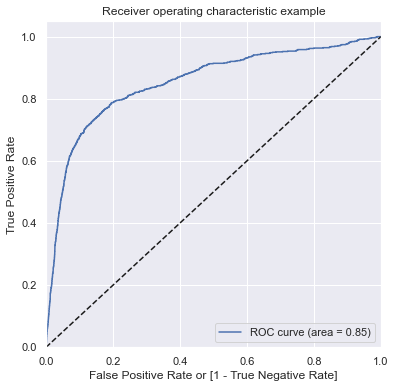

(array([0.00000000e+00, 0.00000000e+00, 1.22264335e-04, ...,
        9.99755471e-01, 9.99877736e-01, 1.00000000e+00]),
 array([0.        , 0.00122699, 0.00122699, ..., 1.        , 1.        ,
        1.        ]),
 array([1.99667270e+00, 9.96672701e-01, 9.95732624e-01, ...,
        2.84672466e-04, 2.53692142e-04, 1.89008520e-04]))

In [522]:
# Plotting ROC Curve

draw_roc(y_pred_final.churn, y_pred_final.churn_prob)

In [523]:
# Let's create columns with different probability cutoffs 

from sklearn.metrics import confusion_matrix

numbers = [float(x)/10 for x in range(10)]

for i in numbers:
    y_pred_final[i]= y_pred_final.churn_prob.map( lambda x: 1 if x > i else 0)
    
y_pred_final.head()

,churn,churn_prob,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,0,0.071026,1,0,0,0,0,0,0,0,0,0
1,0,0.228572,1,1,1,0,0,0,0,0,0,0
2,0,0.174363,1,1,0,0,0,0,0,0,0,0
3,0,0.348080,1,1,1,1,0,0,0,0,0,0
4,0,0.581236,1,1,1,1,1,1,0,0,0,0


In [524]:
# Now let's calculate accuracy sensitivity and specificity for various probability cutoffs.

cutoff_df = pd.DataFrame( columns = ['prob','accuracy','sensi','speci'])

num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]

for i in num:
    cm1 = metrics.confusion_matrix( y_pred_final.churn, y_pred_final[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    sensi = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    speci = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
    
print(cutoff_df)

     prob  accuracy     sensi     speci
0.0   0.0  0.090616  0.000000  1.000000
0.1   0.1  0.256282  0.185842  0.963190
0.2   0.2  0.414054  0.361413  0.942331
0.3   0.3  0.567489  0.534051  0.903067
0.4   0.4  0.695575  0.681501  0.836810
0.5   0.5  0.798866  0.799976  0.787730
0.6   0.6  0.858795  0.873212  0.714110
0.7   0.7  0.899266  0.927253  0.618405
0.8   0.8  0.913720  0.962098  0.428221
0.9   0.9  0.911941  0.989485  0.133742


<AxesSubplot:xlabel='prob'>

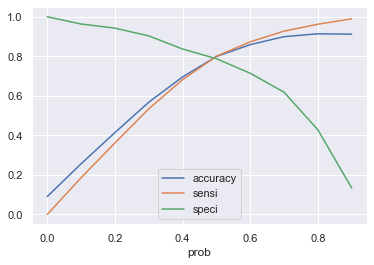

In [525]:
# Let's plot accuracy sensitivity and specificity for various probabilities.

cutoff_df.plot.line(x='prob', y=['accuracy','sensi','speci'])

In [526]:
## Finidng the optimal cutoff

def Find_Optimal_Cutoff(target, predicted):

    fpr, tpr, threshold = roc_curve(target, predicted)
    i = np.arange(len(tpr)) 
    roc = pd.DataFrame({'tf' : pd.Series(tpr-(1-fpr), index=i), 'threshold' : pd.Series(threshold, index=i)})
    roc_t = roc.iloc[(roc.tf-0).abs().argsort()[:1]]

    return list(roc_t['threshold'])

# Find optimal probability threshold

threshold = Find_Optimal_Cutoff(y_pred_final.churn,y_pred_final.churn_prob)

print('CutOff threshold: ', threshold)

CutOff threshold:  [0.4925441795933664]


In [527]:
# Creating new column 'predicted' with 1 if Churn_Prob>0.49 else 0

y_pred_final['pred_churn'] = y_pred_final.churn_prob.map( lambda x: 1 if x > 0.49 else 0)

y_pred_final.churn.value_counts()


0    8179
1     815
Name: churn, dtype: int64

In [528]:
# Confusion matrix 

confusion = metrics.confusion_matrix( y_pred_final.churn, y_pred_final.pred_churn )
confusion

array([[6463, 1716],
       [ 168,  647]], dtype=int64)

In [529]:
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

print('Accuracy Score on test data: ', round(accuracy_score(y_test,y_pred_default),4))

# Let's see the sensitivity of our logistic regression model
print('Sensitivity: ', (round(TP / float(TP+FN),4)))

# Let us calculate specificity
print('Specificity: ',(round(TN / float(TN+FP),4)))

# Calculate false postive rate - predicting churn when customer does not have churned
print('false postive rate: ',round(FP/ float(TN+FP),4))

# positive predictive value 
print('positive predictive value: ', round(TP / float(TP+FP),4))

# Negative predictive value
print('Negative predictive value: ',round(TN / float(TN+ FN),4))

## Misclassification rate

print('Misclassification Rate: ',round((FN+FP)/(TP+TN+FP+FN),4))

Accuracy Score on test data:  0.7989
Sensitivity:  0.7939
Specificity:  0.7902
false postive rate:  0.2098
positive predictive value:  0.2738
Negative predictive value:  0.9747
Misclassification Rate:  0.2095


#### LogisticRegression giving good Accuracy with PCA and with RFE

### With PCA
- Accuracy Score on test data:  0.8079
- Sensitivity:  0.8049
- Specificity:  0.8012
- false postive rate:  0.1988
- positive predictive value:  0.2875
- Negative predictive value:  0.9763
- Misclassification Rate:  0.1985

#### With RFE
- Accuracy Score on test data:  0.7989
- Sensitivity:  0.7939
- Specificity:  0.7902
- false postive rate:  0.2098
- positive predictive value:  0.2738
- Negative predictive value:  0.9747
- Misclassification Rate:  0.2095


## 4.5 DecisionTreeClassifier With PCA

In [530]:
# Importing decision tree classifier from sklearn library

from sklearn.tree import DecisionTreeClassifier

# Fitting the decision tree with default hyperparameters

dt_default = DecisionTreeClassifier(max_depth=5, class_weight='balanced')

dt_default.fit(df_train_pca,y_train)

DecisionTreeClassifier(class_weight='balanced', max_depth=5)

In [531]:
# Making predictions on default hyperparameters

y_pred_default = dt_default.predict(df_test_pca)

# Printing classification report

print(classification_report(y_test,y_pred_default))

print(confusion_matrix(y_test,y_pred_default))

print('Acuracy Score', accuracy_score(y_test,y_pred_default))

              precision    recall  f1-score   support

           0       0.97      0.74      0.84      8179
           1       0.23      0.76      0.35       815

    accuracy                           0.75      8994
   macro avg       0.60      0.75      0.60      8994
weighted avg       0.90      0.75      0.80      8994

[[6089 2090]
 [ 199  616]]
Acuracy Score 0.7454969979986658


In [532]:
# Evaluation 

confusion_tree = confusion_matrix(y_test,y_pred_default)
TP = confusion_tree[1,1] # true positive 
TN = confusion_tree[0,0] # true negatives
FP = confusion_tree[0,1] # false positives
FN = confusion_tree[1,0] # false negatives

print('Accuracy Score on test data: ', round(accuracy_score(y_test,y_pred_default),4))

# Let's see the sensitivity of our logistic regression model
print('Sensitivity: ', (round(TP / float(TP+FN),4)))

# Let us calculate specificity
print('Specificity: ',(round(TN / float(TN+FP),4)))

# Calculate false postive rate - predicting churn when customer does not have churned
print('false postive rate: ',round(FP/ float(TN+FP),4))

# positive predictive value 
print('positive predictive value: ', round(TP / float(TP+FP),4))

# Negative predictive value
print('Negative predictive value: ',round(TN / float(TN+ FN),4))

## Misclassification rate

print('Misclassification Rate: ',round((FN+FP)/(TP+TN+FP+FN),4))

Accuracy Score on test data:  0.7455
Sensitivity:  0.7558
Specificity:  0.7445
false postive rate:  0.2555
positive predictive value:  0.2276
Negative predictive value:  0.9684
Misclassification Rate:  0.2545


- As we can see above Sensitivity of model is not great let's tune the Hyperparameter

### 4.5.1 Hyperparameter tuning : GridSearchCV to find optimal max_depth

In [533]:
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV

# specify number of folds for k-fold CV

n_folds = 5

# parameters to build the model on

parameters = {'max_depth': range(1, 25)}

# instantiate the model

dtree = DecisionTreeClassifier(criterion = "gini", class_weight='balanced', random_state = 100)

# fit tree on training data

tree = GridSearchCV(estimator= dtree, 
                    param_grid = parameters, 
                    cv=n_folds,
                    n_jobs = -1,
                    verbose = 1, 
                   scoring="accuracy")

tree.fit(df_train_pca,y_train)

Fitting 5 folds for each of 24 candidates, totalling 120 fits


GridSearchCV(cv=5,
             estimator=DecisionTreeClassifier(class_weight='balanced',
                                              random_state=100),
             n_jobs=-1, param_grid={'max_depth': range(1, 25)},
             scoring='accuracy', verbose=1)

In [534]:
y_train.shape

(20985,)

In [535]:
# scores of GridSearch CV

scores = tree.cv_results_

scores = pd.DataFrame(scores)

scores.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.208930,0.011612,0.006249,0.007654,1,{'max_depth': 1},0.649988,0.625447,0.712175,0.634263,0.664046,0.657184,0.030514,24
1,0.373703,0.007875,0.009836,0.007582,2,{'max_depth': 2},0.715273,0.578985,0.814391,0.696450,0.787706,0.718561,0.082396,23
2,0.552120,0.011156,0.000000,0.000000,3,{'max_depth': 3},0.731475,0.794853,0.744818,0.722659,0.743388,0.747439,0.025061,22
3,0.687015,0.014625,0.006471,0.007932,4,{'max_depth': 4},0.810102,0.722421,0.757446,0.802954,0.814391,0.781463,0.035859,18
4,0.897430,0.040196,0.008632,0.007182,5,{'max_depth': 5},0.757684,0.731475,0.777460,0.762449,0.766023,0.759018,0.015240,21


In [536]:
scores.nlargest(5, 'mean_test_score')

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
23,1.742533,0.114232,0.002531,0.003706,24,{'max_depth': 24},0.861330,0.881582,0.883488,0.883965,0.880629,0.878199,0.008522,1
22,2.001062,0.048684,0.009398,0.007673,23,{'max_depth': 23},0.861330,0.879438,0.879914,0.881582,0.878008,0.876054,0.007450,2
21,1.940472,0.202328,0.004971,0.006226,22,{'max_depth': 22},0.857756,0.878723,0.877055,0.883488,0.876817,0.874768,0.008838,3
20,2.160005,0.103046,0.012703,0.018598,21,{'max_depth': 21},0.850131,0.879438,0.878485,0.879914,0.871098,0.871813,0.011304,4
19,1.842458,0.120963,0.000401,0.000491,20,{'max_depth': 20},0.849416,0.878961,0.876340,0.878485,0.868239,0.870288,0.011125,5


In [537]:
tree.best_score_

0.8781987133666906

In [538]:
tree.best_estimator_

DecisionTreeClassifier(class_weight='balanced', max_depth=24, random_state=100)

### 4.5.2 GridSearchCV to find optimal min_samples_leaf

In [539]:
# parameters to build the model on

parameters = {'min_samples_leaf': range(5, 200, 20)}

# instantiate the model

dtree = DecisionTreeClassifier(criterion = "gini",class_weight='balanced',random_state = 100)

# fit tree on training data

tree = GridSearchCV(estimator= dtree, 
                    param_grid = parameters, 
                    cv=n_folds,
                    n_jobs = -1,
                    verbose = 1, 
                   scoring="accuracy")

tree.fit(df_train_pca,y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


GridSearchCV(cv=5,
             estimator=DecisionTreeClassifier(class_weight='balanced',
                                              random_state=100),
             n_jobs=-1, param_grid={'min_samples_leaf': range(5, 200, 20)},
             scoring='accuracy', verbose=1)

In [540]:
# scores of GridSearch CV

scores = tree.cv_results_

scores = pd.DataFrame(scores)

scores.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_min_samples_leaf,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,1.719337,0.064405,0.003126,0.006252,5,{'min_samples_leaf': 5},0.835835,0.847272,0.853228,0.858709,0.840839,0.847177,0.008227,1
1,1.454982,0.093606,0.000000,0.000000,25,{'min_samples_leaf': 25},0.762926,0.784132,0.786991,0.796760,0.785085,0.783178,0.011079,2
2,1.416840,0.093332,0.006254,0.007659,45,{'min_samples_leaf': 45},0.746009,0.771742,0.772457,0.776269,0.761735,0.765642,0.010930,3
3,1.437519,0.036032,0.006249,0.007653,65,{'min_samples_leaf': 65},0.741959,0.764355,0.769359,0.778651,0.772218,0.765309,0.012556,4
4,1.193230,0.065416,0.006506,0.007973,85,{'min_samples_leaf': 85},0.751251,0.742197,0.750536,0.766976,0.781511,0.758494,0.014022,7


In [541]:
scores.nlargest(5, 'mean_test_score')

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_min_samples_leaf,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,1.719337,0.064405,0.003126,0.006252,5,{'min_samples_leaf': 5},0.835835,0.847272,0.853228,0.858709,0.840839,0.847177,0.008227,1
1,1.454982,0.093606,0.000000,0.000000,25,{'min_samples_leaf': 25},0.762926,0.784132,0.786991,0.796760,0.785085,0.783178,0.011079,2
2,1.416840,0.093332,0.006254,0.007659,45,{'min_samples_leaf': 45},0.746009,0.771742,0.772457,0.776269,0.761735,0.765642,0.010930,3
3,1.437519,0.036032,0.006249,0.007653,65,{'min_samples_leaf': 65},0.741959,0.764355,0.769359,0.778651,0.772218,0.765309,0.012556,4
6,1.300096,0.158190,0.000000,0.000000,125,{'min_samples_leaf': 125},0.741482,0.766976,0.750060,0.774124,0.792233,0.764975,0.017917,5


In [542]:
tree.best_score_

0.8471765546819157

In [543]:
tree.best_estimator_

DecisionTreeClassifier(class_weight='balanced', min_samples_leaf=5,
                       random_state=100)

### 4.5.3 GridSearchCV to find optimal min_samples_split

In [544]:
parameters = {'min_samples_split': range(5, 200, 20)}

# instantiate the model

dtree = DecisionTreeClassifier(criterion = "gini",class_weight='balanced', random_state = 100)

# fit tree on training data

tree = GridSearchCV(estimator= dtree, 
                    param_grid = parameters, 
                    cv=n_folds,
                    n_jobs = -1,
                    verbose = 1, 
                   scoring="accuracy")

tree.fit(df_train_pca,y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


GridSearchCV(cv=5,
             estimator=DecisionTreeClassifier(class_weight='balanced',
                                              random_state=100),
             n_jobs=-1, param_grid={'min_samples_split': range(5, 200, 20)},
             scoring='accuracy', verbose=1)

In [545]:
# scores of GridSearch CV

scores = tree.cv_results_

scores = pd.DataFrame(scores)

scores.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_min_samples_split,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,1.982431,0.062624,0.000000,0.000000,5,{'min_samples_split': 5},0.873719,0.882535,0.885871,0.881344,0.878723,0.880438,0.004070,1
1,1.896668,0.206188,0.003125,0.006250,25,{'min_samples_split': 25},0.827496,0.838456,0.851322,0.846319,0.829640,0.838647,0.009220,2
2,1.786767,0.115411,0.003125,0.006251,45,{'min_samples_split': 45},0.794853,0.804622,0.818442,0.818442,0.798904,0.807053,0.009804,3
3,1.731124,0.095869,0.003152,0.006304,65,{'min_samples_split': 65},0.783417,0.788182,0.788659,0.808196,0.770550,0.787801,0.012113,4
4,1.921174,0.090923,0.001167,0.001680,85,{'min_samples_split': 85},0.768168,0.782225,0.779843,0.794139,0.762211,0.777317,0.011183,5


In [546]:
scores.nlargest(5, 'mean_test_score')

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_min_samples_split,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,1.982431,0.062624,0.000000,0.000000,5,{'min_samples_split': 5},0.873719,0.882535,0.885871,0.881344,0.878723,0.880438,0.004070,1
1,1.896668,0.206188,0.003125,0.006250,25,{'min_samples_split': 25},0.827496,0.838456,0.851322,0.846319,0.829640,0.838647,0.009220,2
2,1.786767,0.115411,0.003125,0.006251,45,{'min_samples_split': 45},0.794853,0.804622,0.818442,0.818442,0.798904,0.807053,0.009804,3
3,1.731124,0.095869,0.003152,0.006304,65,{'min_samples_split': 65},0.783417,0.788182,0.788659,0.808196,0.770550,0.787801,0.012113,4
4,1.921174,0.090923,0.001167,0.001680,85,{'min_samples_split': 85},0.768168,0.782225,0.779843,0.794139,0.762211,0.777317,0.011183,5


In [547]:
tree.best_score_

0.880438408386943

In [548]:
tree.best_estimator_

DecisionTreeClassifier(class_weight='balanced', min_samples_split=5,
                       random_state=100)

### 4.5.4 GridSearchCV to find optimal parameters

In [549]:
# Create the parameter grid 

param_grid = {
    'max_depth': range(5, 15, 5),
    'min_samples_leaf': range(5, 100, 20),
    'min_samples_split': range(5, 100, 20),
    'criterion': ["entropy", "gini"]
}

n_folds = 5

# Instantiate the grid search model

dtree = DecisionTreeClassifier(class_weight='balanced')

grid_search = GridSearchCV(estimator = dtree, 
                           param_grid = param_grid, 
                           refit='recall_score',
                           cv = n_folds, 
                           verbose = 1, 
                           n_jobs = -1)

# Fit the grid search to the data
grid_search.fit(df_train_pca,y_train)

Fitting 5 folds for each of 100 candidates, totalling 500 fits


GridSearchCV(cv=5, estimator=DecisionTreeClassifier(class_weight='balanced'),
             n_jobs=-1,
             param_grid={'criterion': ['entropy', 'gini'],
                         'max_depth': range(5, 15, 5),
                         'min_samples_leaf': range(5, 100, 20),
                         'min_samples_split': range(5, 100, 20)},
             refit='recall_score', verbose=1)

In [550]:
# cv results
cv_results = pd.DataFrame(grid_search.cv_results_)
cv_results.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_criterion,param_max_depth,param_min_samples_leaf,param_min_samples_split,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,1.563499,0.031083,0.007890,0.007032,entropy,5,5,5,"{'criterion': 'entropy', 'max_depth': 5, 'min_...",0.764355,0.733381,0.732904,0.796998,0.776984,0.760924,0.024959,64
1,1.627827,0.019911,0.000199,0.000399,entropy,5,5,25,"{'criterion': 'entropy', 'max_depth': 5, 'min_...",0.764355,0.733381,0.732904,0.796998,0.776984,0.760924,0.024959,64
2,1.614953,0.010264,0.001813,0.003627,entropy,5,5,45,"{'criterion': 'entropy', 'max_depth': 5, 'min_...",0.764355,0.733381,0.732904,0.796998,0.776984,0.760924,0.024959,64
3,1.617295,0.022014,0.006463,0.007923,entropy,5,5,65,"{'criterion': 'entropy', 'max_depth': 5, 'min_...",0.764355,0.733381,0.732904,0.796998,0.776984,0.760924,0.024959,64
4,1.437448,0.010852,0.007352,0.006439,entropy,5,5,85,"{'criterion': 'entropy', 'max_depth': 5, 'min_...",0.764355,0.733381,0.732904,0.796998,0.776984,0.760924,0.024959,64


In [551]:
# printing the optimal accuracy score and hyperparameters

print("best accuracy", grid_search.best_score_)

print(grid_search.best_estimator_)

best accuracy 0.7974743864665237
DecisionTreeClassifier(class_weight='balanced', max_depth=10,
                       min_samples_leaf=5, min_samples_split=5)


In [552]:
# model with optimal hyperparameters

clf_gini = DecisionTreeClassifier(criterion = "gini",
                                  class_weight='balanced',
                                  random_state = 100,
                                  max_depth=10, 
                                  min_samples_leaf=5,
                                  min_samples_split=5)

clf_gini.fit(df_train_pca,y_train)

DecisionTreeClassifier(class_weight='balanced', max_depth=10,
                       min_samples_leaf=5, min_samples_split=5,
                       random_state=100)

In [553]:
y_pred_default = clf_gini.predict(df_test_pca)

confusion_tree_hyper=confusion_matrix(y_test,y_pred_default)

confusion_tree_hyper

array([[6765, 1414],
       [ 300,  515]], dtype=int64)

In [554]:
TP = confusion_tree_hyper[1,1] # true positive 
TN = confusion_tree_hyper[0,0] # true negatives
FP = confusion_tree_hyper[0,1] # false positives
FN = confusion_tree_hyper[1,0] # false negatives

print('Accuracy Score on test data: ', round(accuracy_score(y_test,y_pred_default),4))

# Let's see the sensitivity of our logistic regression model
print('Sensitivity: ', (round(TP / float(TP+FN),4)))

# Let us calculate specificity
print('Specificity: ',(round(TN / float(TN+FP),4)))

# Calculate false postive rate - predicting churn when customer does not have churned
print('false postive rate: ',round(FP/ float(TN+FP),4))

# positive predictive value 
print('positive predictive value: ', round(TP / float(TP+FP),4))

# Negative predictive value
print('Negative predictive value: ',round(TN / float(TN+ FN),4))

## Misclassification rate

print('Misclassification Rate: ',round((FN+FP)/(TP+TN+FP+FN),4))

Accuracy Score on test data:  0.8094
Sensitivity:  0.6319
Specificity:  0.8271
false postive rate:  0.1729
positive predictive value:  0.267
Negative predictive value:  0.9575
Misclassification Rate:  0.1906


## 4.6 RandomForestClassifier with PCA

In [555]:
# Importing random forest classifier from sklearn library

from sklearn.ensemble import RandomForestClassifier

# Running the random forest with default parameters.

rfc = RandomForestClassifier(class_weight='balanced')

# fit

rfc.fit(df_train_pca,y_train)

# Making predictions

y_pred_default = rfc.predict(df_test_pca)

In [556]:
confusion_rf=confusion_matrix(y_test,y_pred_default)

confusion_rf

array([[8134,   45],
       [ 732,   83]], dtype=int64)

In [557]:
TN = confusion_rf[0,0] # true positive 
TP = confusion_rf[1,1] # true negatives
FP = confusion_rf[0,1] # false positives
FN = confusion_rf[1,0] # false negatives

print('Accuracy Score on test data: ', round(accuracy_score(y_test,y_pred_default),4))

# Let's see the sensitivity of our logistic regression model
print('Sensitivity: ', (round(TP / float(TP+FN),4)))

# Let us calculate specificity
print('Specificity: ',(round(TN / float(TN+FP),4)))

# Calculate false postive rate - predicting churn when customer does not have churned
print('false postive rate: ',round(FP/ float(TN+FP),4))

# positive predictive value 
print('positive predictive value: ', round(TP / float(TP+FP),4))

# Negative predictive value
print('Negative predictive value: ',round(TN / float(TN+ FN),4))

## Misclassification rate

print('Misclassification Rate: ',round((FN+FP)/(TP+TN+FP+FN),4))

Accuracy Score on test data:  0.9136
Sensitivity:  0.1018
Specificity:  0.9945
false postive rate:  0.0055
positive predictive value:  0.6484
Negative predictive value:  0.9174
Misclassification Rate:  0.0864


### 4.6.1 Hyperparameter tuning for RandomForest : GridSearchCV to find optimal n_estimators

In [558]:
# GridSearchCV to find optimal n_estimators

# k-fold CV

n_folds = 5

# parameters to build the model on

parameters = {'max_depth': range(2, 20, 5)}

# instantiate the model

rf_with_pca = RandomForestClassifier(class_weight='balanced')


# fit tree on training data
rf_with_pca = GridSearchCV(rf_with_pca, 
                           parameters, 
                           cv=n_folds, 
                           scoring="accuracy", 
                           n_jobs=-1,
                           verbose = 1)

rf_with_pca.fit(df_train_pca, y_train)

Fitting 5 folds for each of 4 candidates, totalling 20 fits


GridSearchCV(cv=5, estimator=RandomForestClassifier(class_weight='balanced'),
             n_jobs=-1, param_grid={'max_depth': range(2, 20, 5)},
             scoring='accuracy', verbose=1)

In [559]:
# scores of GridSearch CV

scores = rf_with_pca.cv_results_

scores = pd.DataFrame(scores)

scores.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,3.855968,0.112828,0.072456,0.011113,2,{'max_depth': 2},0.778175,0.782940,0.777460,0.772695,0.786276,0.779509,0.004690,4
1,11.278629,0.100074,0.091629,0.009582,7,{'max_depth': 7},0.872528,0.871337,0.879676,0.876817,0.873958,0.874863,0.003023,3
2,16.001083,0.389886,0.127131,0.006282,12,{'max_depth': 12},0.904932,0.914939,0.918275,0.916845,0.910889,0.913176,0.004812,2
3,15.307857,0.982423,0.110002,0.024532,17,{'max_depth': 17},0.909936,0.916845,0.918990,0.924708,0.915416,0.917179,0.004809,1


In [560]:
scores.nlargest(5, 'mean_test_score')

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
3,15.307857,0.982423,0.110002,0.024532,17,{'max_depth': 17},0.909936,0.916845,0.918990,0.924708,0.915416,0.917179,0.004809,1
2,16.001083,0.389886,0.127131,0.006282,12,{'max_depth': 12},0.904932,0.914939,0.918275,0.916845,0.910889,0.913176,0.004812,2
1,11.278629,0.100074,0.091629,0.009582,7,{'max_depth': 7},0.872528,0.871337,0.879676,0.876817,0.873958,0.874863,0.003023,3
0,3.855968,0.112828,0.072456,0.011113,2,{'max_depth': 2},0.778175,0.782940,0.777460,0.772695,0.786276,0.779509,0.004690,4


In [561]:
tree.best_score_

0.880438408386943

In [562]:
tree.best_estimator_

DecisionTreeClassifier(class_weight='balanced', min_samples_split=5,
                       random_state=100)

### 4.6.2 GridSearchCV to find optimal n_estimators

In [563]:
# specify number of folds for k-fold CV

n_folds = 5

# parameters to build the model on

parameters = {'n_estimators': range(100, 1500, 400)}

# instantiate the model (note we are specifying a max_depth)

rf = RandomForestClassifier(max_depth=10, class_weight='balanced')

# fit tree on training data

rf = GridSearchCV(rf, 
                  parameters, 
                  cv=n_folds, 
                  scoring="accuracy", 
                  n_jobs= -1,
                  verbose = 1)

rf.fit(df_train_pca, y_train)

Fitting 5 folds for each of 4 candidates, totalling 20 fits


GridSearchCV(cv=5,
             estimator=RandomForestClassifier(class_weight='balanced',
                                              max_depth=10),
             n_jobs=-1, param_grid={'n_estimators': range(100, 1500, 400)},
             scoring='accuracy', verbose=1)

In [564]:
# scores of GridSearch CV
scores = rf_with_pca.cv_results_
scores = pd.DataFrame(scores)
scores.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,3.855968,0.112828,0.072456,0.011113,2,{'max_depth': 2},0.778175,0.782940,0.777460,0.772695,0.786276,0.779509,0.004690,4
1,11.278629,0.100074,0.091629,0.009582,7,{'max_depth': 7},0.872528,0.871337,0.879676,0.876817,0.873958,0.874863,0.003023,3
2,16.001083,0.389886,0.127131,0.006282,12,{'max_depth': 12},0.904932,0.914939,0.918275,0.916845,0.910889,0.913176,0.004812,2
3,15.307857,0.982423,0.110002,0.024532,17,{'max_depth': 17},0.909936,0.916845,0.918990,0.924708,0.915416,0.917179,0.004809,1


In [565]:
scores.nlargest(5, 'mean_test_score')

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
3,15.307857,0.982423,0.110002,0.024532,17,{'max_depth': 17},0.909936,0.916845,0.918990,0.924708,0.915416,0.917179,0.004809,1
2,16.001083,0.389886,0.127131,0.006282,12,{'max_depth': 12},0.904932,0.914939,0.918275,0.916845,0.910889,0.913176,0.004812,2
1,11.278629,0.100074,0.091629,0.009582,7,{'max_depth': 7},0.872528,0.871337,0.879676,0.876817,0.873958,0.874863,0.003023,3
0,3.855968,0.112828,0.072456,0.011113,2,{'max_depth': 2},0.778175,0.782940,0.777460,0.772695,0.786276,0.779509,0.004690,4


In [566]:
rf.best_score_

0.9081725041696449

In [567]:
rf.best_estimator_

RandomForestClassifier(class_weight='balanced', max_depth=10, n_estimators=1300)

### 4.6.3 GridSearchCV to find optimal max_features

In [568]:
# specify number of folds for k-fold CV

n_folds = 5

# parameters to build the model on

parameters = {'max_features': [4, 8, 14, 20, 24]}

# instantiate the model

rf = RandomForestClassifier(max_depth=10,class_weight='balanced')


# fit tree on training data

rf = GridSearchCV(rf, 
                  parameters, 
                  cv= n_folds, 
                  scoring= "accuracy", 
                  n_jobs= -1,
                  verbose = 1)

rf.fit(df_train_pca, y_train)

Fitting 5 folds for each of 5 candidates, totalling 25 fits


GridSearchCV(cv=5,
             estimator=RandomForestClassifier(class_weight='balanced',
                                              max_depth=10),
             n_jobs=-1, param_grid={'max_features': [4, 8, 14, 20, 24]},
             scoring='accuracy', verbose=1)

In [569]:
# scores of GridSearch CV

scores = rf_with_pca.cv_results_

scores = pd.DataFrame(scores)

scores.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,3.855968,0.112828,0.072456,0.011113,2,{'max_depth': 2},0.778175,0.782940,0.777460,0.772695,0.786276,0.779509,0.004690,4
1,11.278629,0.100074,0.091629,0.009582,7,{'max_depth': 7},0.872528,0.871337,0.879676,0.876817,0.873958,0.874863,0.003023,3
2,16.001083,0.389886,0.127131,0.006282,12,{'max_depth': 12},0.904932,0.914939,0.918275,0.916845,0.910889,0.913176,0.004812,2
3,15.307857,0.982423,0.110002,0.024532,17,{'max_depth': 17},0.909936,0.916845,0.918990,0.924708,0.915416,0.917179,0.004809,1


In [570]:
scores.nlargest(5, 'mean_test_score')

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
3,15.307857,0.982423,0.110002,0.024532,17,{'max_depth': 17},0.909936,0.916845,0.918990,0.924708,0.915416,0.917179,0.004809,1
2,16.001083,0.389886,0.127131,0.006282,12,{'max_depth': 12},0.904932,0.914939,0.918275,0.916845,0.910889,0.913176,0.004812,2
1,11.278629,0.100074,0.091629,0.009582,7,{'max_depth': 7},0.872528,0.871337,0.879676,0.876817,0.873958,0.874863,0.003023,3
0,3.855968,0.112828,0.072456,0.011113,2,{'max_depth': 2},0.778175,0.782940,0.777460,0.772695,0.786276,0.779509,0.004690,4


In [571]:
rf.best_score_

0.9059804622349297

In [572]:
rf.best_estimator_

RandomForestClassifier(class_weight='balanced', max_depth=10, max_features=4)

### 4.6.4 GridSearchCV to find optimal min_samples_leaf

In [573]:
# specify number of folds for k-fold CV

n_folds = 5

# parameters to build the model on

parameters = {'min_samples_leaf': range(100, 400, 50)}

# instantiate the model

rf = RandomForestClassifier(class_weight='balanced')


# fit tree on training data
rf = GridSearchCV(rf, 
                  parameters, 
                  cv= n_folds, 
                  scoring= "accuracy", 
                  n_jobs= -1,
                  verbose = 1)

rf.fit(df_train_pca, y_train)

Fitting 5 folds for each of 6 candidates, totalling 30 fits


GridSearchCV(cv=5, estimator=RandomForestClassifier(class_weight='balanced'),
             n_jobs=-1, param_grid={'min_samples_leaf': range(100, 400, 50)},
             scoring='accuracy', verbose=1)

In [574]:
# scores of GridSearch CV

scores = rf_with_pca.cv_results_

scores = pd.DataFrame(scores)

scores.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,3.855968,0.112828,0.072456,0.011113,2,{'max_depth': 2},0.778175,0.782940,0.777460,0.772695,0.786276,0.779509,0.004690,4
1,11.278629,0.100074,0.091629,0.009582,7,{'max_depth': 7},0.872528,0.871337,0.879676,0.876817,0.873958,0.874863,0.003023,3
2,16.001083,0.389886,0.127131,0.006282,12,{'max_depth': 12},0.904932,0.914939,0.918275,0.916845,0.910889,0.913176,0.004812,2
3,15.307857,0.982423,0.110002,0.024532,17,{'max_depth': 17},0.909936,0.916845,0.918990,0.924708,0.915416,0.917179,0.004809,1


In [575]:
scores.nlargest(5, 'mean_test_score')

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
3,15.307857,0.982423,0.110002,0.024532,17,{'max_depth': 17},0.909936,0.916845,0.918990,0.924708,0.915416,0.917179,0.004809,1
2,16.001083,0.389886,0.127131,0.006282,12,{'max_depth': 12},0.904932,0.914939,0.918275,0.916845,0.910889,0.913176,0.004812,2
1,11.278629,0.100074,0.091629,0.009582,7,{'max_depth': 7},0.872528,0.871337,0.879676,0.876817,0.873958,0.874863,0.003023,3
0,3.855968,0.112828,0.072456,0.011113,2,{'max_depth': 2},0.778175,0.782940,0.777460,0.772695,0.786276,0.779509,0.004690,4


In [576]:
rf.best_score_

0.8533714558017632

In [577]:
rf.best_estimator_

RandomForestClassifier(class_weight='balanced', min_samples_leaf=100)

### 4.6.5 GridSearchCV to find optimal min_samples_split

In [578]:
# specify number of folds for k-fold CV

n_folds = 5

# parameters to build the model on

parameters = {'min_samples_split': range(200, 500, 50)}

# instantiate the model

rf = RandomForestClassifier(class_weight='balanced')


# fit tree on training data

rf = GridSearchCV(rf, 
                  parameters, 
                  cv= n_folds, 
                  scoring= "accuracy", 
                  n_jobs= -1,
                  verbose = 1)

rf.fit(df_train_pca, y_train)

Fitting 5 folds for each of 6 candidates, totalling 30 fits


GridSearchCV(cv=5, estimator=RandomForestClassifier(class_weight='balanced'),
             n_jobs=-1, param_grid={'min_samples_split': range(200, 500, 50)},
             scoring='accuracy', verbose=1)

In [579]:
# scores of GridSearch CV

scores = rf_with_pca.cv_results_

scores = pd.DataFrame(scores)

scores.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,3.855968,0.112828,0.072456,0.011113,2,{'max_depth': 2},0.778175,0.782940,0.777460,0.772695,0.786276,0.779509,0.004690,4
1,11.278629,0.100074,0.091629,0.009582,7,{'max_depth': 7},0.872528,0.871337,0.879676,0.876817,0.873958,0.874863,0.003023,3
2,16.001083,0.389886,0.127131,0.006282,12,{'max_depth': 12},0.904932,0.914939,0.918275,0.916845,0.910889,0.913176,0.004812,2
3,15.307857,0.982423,0.110002,0.024532,17,{'max_depth': 17},0.909936,0.916845,0.918990,0.924708,0.915416,0.917179,0.004809,1


In [580]:
scores.nlargest(5, 'mean_test_score')

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
3,15.307857,0.982423,0.110002,0.024532,17,{'max_depth': 17},0.909936,0.916845,0.918990,0.924708,0.915416,0.917179,0.004809,1
2,16.001083,0.389886,0.127131,0.006282,12,{'max_depth': 12},0.904932,0.914939,0.918275,0.916845,0.910889,0.913176,0.004812,2
1,11.278629,0.100074,0.091629,0.009582,7,{'max_depth': 7},0.872528,0.871337,0.879676,0.876817,0.873958,0.874863,0.003023,3
0,3.855968,0.112828,0.072456,0.011113,2,{'max_depth': 2},0.778175,0.782940,0.777460,0.772695,0.786276,0.779509,0.004690,4


In [581]:
rf.best_score_

0.8722420776745293

In [582]:
rf.best_estimator_

RandomForestClassifier(class_weight='balanced', min_samples_split=200)

### 4.6.6 GridSearchCV to find optimal parameters

In [583]:
# Create the parameter grid based on the results of random search 

param_grid = {
    'max_depth': [8,10],
    'min_samples_leaf': range(100, 200, 100),
    'min_samples_split': range(200, 400, 100),
    'n_estimators': range(200, 400, 100), 
    'max_features': [8, 10, 12]
}

# Create a based model

rf = RandomForestClassifier(class_weight='balanced')

# Instantiate the grid search model
grid_search = GridSearchCV(estimator = rf, 
                           param_grid = param_grid,
                           refit='recall_score' ,
                           cv = 5, 
                           n_jobs=-1, 
                           verbose = 1)

In [584]:
# Fit the grid search to the data

grid_search.fit(df_train_pca, y_train)

Fitting 5 folds for each of 24 candidates, totalling 120 fits


GridSearchCV(cv=5, estimator=RandomForestClassifier(class_weight='balanced'),
             n_jobs=-1,
             param_grid={'max_depth': [8, 10], 'max_features': [8, 10, 12],
                         'min_samples_leaf': range(100, 200, 100),
                         'min_samples_split': range(200, 400, 100),
                         'n_estimators': range(200, 400, 100)},
             refit='recall_score', verbose=1)

In [585]:
# printing the optimal accuracy score and hyperparameters

print('We can get accuracy of',grid_search.best_score_,'using',grid_search.best_params_)

We can get accuracy of 0.8510841076959734 using {'max_depth': 10, 'max_features': 8, 'min_samples_leaf': 100, 'min_samples_split': 200, 'n_estimators': 300}


In [586]:
# model with the best hyperparameters

from sklearn.ensemble import RandomForestClassifier

rfc = RandomForestClassifier(bootstrap=True, 
                             class_weight='balanced',
                             max_depth=10,
                             min_samples_leaf=100, 
                             min_samples_split=200,
                             max_features=8,
                             n_estimators=300)

In [587]:
# fit
rfc.fit(df_train_pca,y_train)

RandomForestClassifier(class_weight='balanced', max_depth=10, max_features=8,
                       min_samples_leaf=100, min_samples_split=200,
                       n_estimators=300)

In [588]:
# predict
y_pred_default = rfc.predict(df_test_pca)

In [589]:
print(classification_report(y_test,y_pred_default))

print(confusion_matrix(y_test,y_pred_default))

print('accuracy_score:  ',accuracy_score(y_test,y_pred_default))

              precision    recall  f1-score   support

           0       0.97      0.86      0.91      8179
           1       0.34      0.71      0.46       815

    accuracy                           0.85      8994
   macro avg       0.65      0.79      0.69      8994
weighted avg       0.91      0.85      0.87      8994

[[7058 1121]
 [ 237  578]]
accuracy_score:   0.8490104514120524


In [590]:
# Confusion Matrix

confusion_rf_hyper=confusion_matrix(y_test,y_pred_default)

confusion_rf_hyper

array([[7058, 1121],
       [ 237,  578]], dtype=int64)

In [591]:
TN = confusion_rf_hyper[0,0] # true positive 
TP = confusion_rf_hyper[1,1] # true negatives
FP = confusion_rf_hyper[0,1] # false positives
FN = confusion_rf_hyper[1,0] # false negatives

print('Accuracy Score on test data: ', round(accuracy_score(y_test,y_pred_default),4))

# Let's see the sensitivity of our logistic regression model
print('Sensitivity: ', (round(TP / float(TP+FN),4)))

# Let us calculate specificity
print('Specificity: ',(round(TN / float(TN+FP),4)))

# Calculate false postive rate - predicting churn when customer does not have churned
print('false postive rate: ',round(FP/ float(TN+FP),4))

# positive predictive value 
print('positive predictive value: ', round(TP / float(TP+FP),4))

# Negative predictive value
print('Negative predictive value: ',round(TN / float(TN+ FN),4))

## Misclassification rate

print('Misclassification Rate: ',round((FN+FP)/(TP+TN+FP+FN),4))

Accuracy Score on test data:  0.849
Sensitivity:  0.7092
Specificity:  0.8629
false postive rate:  0.1371
positive predictive value:  0.3402
Negative predictive value:  0.9675
Misclassification Rate:  0.151


### Recomendation for Model Selection
- Logistic Regression and Random Forest performed better than Decision Tree for customer churn analysis for this particular dataset, using PCA.
- LogisticRegression is the best model 80.9% Sensitivity
- Accuracy of RandomForest is highest with 85%

## 4.7 RandomForest 

In [592]:
# Importing random forest classifier from sklearn library

from sklearn.ensemble import RandomForestClassifier

# Running the random forest with default parameters.

rfc = RandomForestClassifier(class_weight='balanced')

In [593]:
# fit

rfc.fit(X_train,y_train)

RandomForestClassifier(class_weight='balanced')

In [594]:
# Making predictions

predictions = rfc.predict(X_test)

In [595]:
print(classification_report(y_test,predictions))

print(confusion_matrix(y_test,predictions))

print(accuracy_score(y_test,predictions))

              precision    recall  f1-score   support

           0       0.94      0.99      0.97      8179
           1       0.76      0.41      0.53       815

    accuracy                           0.94      8994
   macro avg       0.85      0.70      0.75      8994
weighted avg       0.93      0.94      0.93      8994

[[8076  103]
 [ 480  335]]
0.9351790082277074


In [596]:
# Confusion Matrix
confusion_rf_with_all_feature=confusion_matrix(y_test,predictions)

confusion_rf_with_all_feature

array([[8076,  103],
       [ 480,  335]], dtype=int64)

In [597]:
TN = confusion_rf_with_all_feature[0,0] # true positive 
TP = confusion_rf_with_all_feature[1,1] # true negatives
FP = confusion_rf_with_all_feature[0,1] # false positives
FN = confusion_rf_with_all_feature[1,0] # false negatives

print('Accuracy Score on test data: ', round(accuracy_score(y_test,y_pred_default),4))

# Let's see the sensitivity of our logistic regression model
print('Sensitivity: ', (round(TP / float(TP+FN),4)))

# Let us calculate specificity
print('Specificity: ',(round(TN / float(TN+FP),4)))

# Calculate false postive rate - predicting churn when customer does not have churned
print('false postive rate: ',round(FP/ float(TN+FP),4))

# positive predictive value 
print('positive predictive value: ', round(TP / float(TP+FP),4))

# Negative predictive value
print('Negative predictive value: ',round(TN / float(TN+ FN),4))

## Misclassification rate

print('Misclassification Rate: ',round((FN+FP)/(TP+TN+FP+FN),4))

Accuracy Score on test data:  0.849
Sensitivity:  0.411
Specificity:  0.9874
false postive rate:  0.0126
positive predictive value:  0.7648
Negative predictive value:  0.9439
Misclassification Rate:  0.0648


## 4.7.1 Hyperparameter Tuning: GridSearchCV to find optimal n_estimators

In [598]:
# specify number of folds for k-fold CV
n_folds = 5

# parameters to build the model on
parameters = {'max_depth': range(2, 20, 5)}

# instantiate the model
rf = RandomForestClassifier(class_weight='balanced')


# fit tree on training data

rf = GridSearchCV(rf, 
                  parameters, 
                  cv=n_folds, 
                  scoring="accuracy", 
                  n_jobs=-1, 
                  verbose = 1)

rf.fit(X_train, y_train)

Fitting 5 folds for each of 4 candidates, totalling 20 fits


GridSearchCV(cv=5, estimator=RandomForestClassifier(class_weight='balanced'),
             n_jobs=-1, param_grid={'max_depth': range(2, 20, 5)},
             scoring='accuracy', verbose=1)

In [599]:
# scores of GridSearch CV

scores = rf.cv_results_

scores = pd.DataFrame(scores)

scores.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,2.549660,0.042367,0.078126,0.000004,2,{'max_depth': 2},0.874196,0.880391,0.871813,0.890636,0.881106,0.879628,0.006550,4
1,7.406409,0.050654,0.103126,0.007656,7,{'max_depth': 7},0.902549,0.904217,0.911127,0.914939,0.908506,0.908268,0.004513,3
2,10.843388,0.097285,0.134377,0.007649,12,{'max_depth': 12},0.921134,0.926376,0.935668,0.935668,0.931856,0.930141,0.005645,2
3,11.192830,1.077409,0.121881,0.031857,17,{'max_depth': 17},0.928044,0.931380,0.937813,0.941625,0.935907,0.934954,0.004777,1


In [600]:
scores.nlargest(5, 'mean_test_score')

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
3,11.192830,1.077409,0.121881,0.031857,17,{'max_depth': 17},0.928044,0.931380,0.937813,0.941625,0.935907,0.934954,0.004777,1
2,10.843388,0.097285,0.134377,0.007649,12,{'max_depth': 12},0.921134,0.926376,0.935668,0.935668,0.931856,0.930141,0.005645,2
1,7.406409,0.050654,0.103126,0.007656,7,{'max_depth': 7},0.902549,0.904217,0.911127,0.914939,0.908506,0.908268,0.004513,3
0,2.549660,0.042367,0.078126,0.000004,2,{'max_depth': 2},0.874196,0.880391,0.871813,0.890636,0.881106,0.879628,0.006550,4


In [601]:
rf.best_score_

0.9349535382416011

In [602]:
rf.best_estimator_

RandomForestClassifier(class_weight='balanced', max_depth=17)

### 4.7.2 GridSearchCV to find optimal n_estimators

In [603]:
# specify number of folds for k-fold CV

n_folds = 5

# parameters to build the model on

parameters = {'n_estimators': range(100, 1000, 400)}

# instantiate the model (note we are specifying a max_depth)

rf = RandomForestClassifier(max_depth=10, class_weight='balanced')


# fit tree on training data

rf = GridSearchCV(rf, 
                  parameters, 
                  cv=n_folds, 
                  scoring="accuracy", 
                  n_jobs=-1, 
                  verbose = 1)

rf.fit(X_train, y_train)

Fitting 5 folds for each of 3 candidates, totalling 15 fits


GridSearchCV(cv=5,
             estimator=RandomForestClassifier(class_weight='balanced',
                                              max_depth=10),
             n_jobs=-1, param_grid={'n_estimators': range(100, 1000, 400)},
             scoring='accuracy', verbose=1)

In [604]:
# scores of GridSearch CV

scores = rf.cv_results_

scores = pd.DataFrame(scores)

scores.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_n_estimators,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,9.639660,0.132560,0.143750,0.011692,100,{'n_estimators': 100},0.914939,0.921372,0.929473,0.930903,0.922087,0.923755,0.005830,3
1,48.504239,0.348244,0.612503,0.006249,500,{'n_estimators': 500},0.914701,0.921372,0.928282,0.932094,0.924946,0.924279,0.005962,2
2,78.188422,11.848116,0.878134,0.216811,900,{'n_estimators': 900},0.915892,0.921372,0.929473,0.930426,0.924708,0.924375,0.005361,1


In [605]:
scores.nlargest(5, 'mean_test_score')

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_n_estimators,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
2,78.188422,11.848116,0.878134,0.216811,900,{'n_estimators': 900},0.915892,0.921372,0.929473,0.930426,0.924708,0.924375,0.005361,1
1,48.504239,0.348244,0.612503,0.006249,500,{'n_estimators': 500},0.914701,0.921372,0.928282,0.932094,0.924946,0.924279,0.005962,2
0,9.639660,0.132560,0.143750,0.011692,100,{'n_estimators': 100},0.914939,0.921372,0.929473,0.930903,0.922087,0.923755,0.005830,3


In [606]:
rf.best_score_

0.9243745532523231

In [607]:
rf.best_estimator_

RandomForestClassifier(class_weight='balanced', max_depth=10, n_estimators=900)

### 4.7.3 GridSearchCV to find optimal max_features

In [608]:
# specify number of folds for k-fold CV
n_folds = 5

# parameters to build the model on
parameters = {'max_features': [4, 8, 14, 20, 24]}

# instantiate the model
rf = RandomForestClassifier(max_depth=10, class_weight='balanced')


# fit tree on training data
rf = GridSearchCV(rf, 
                  parameters, 
                  cv=n_folds, 
                  scoring="accuracy", 
                  n_jobs=-1, 
                  verbose = 1)

rf.fit(X_train, y_train)

Fitting 5 folds for each of 5 candidates, totalling 25 fits


GridSearchCV(cv=5,
             estimator=RandomForestClassifier(class_weight='balanced',
                                              max_depth=10),
             n_jobs=-1, param_grid={'max_features': [4, 8, 14, 20, 24]},
             scoring='accuracy', verbose=1)

In [609]:
# scores of GridSearch CV

scores = rf.cv_results_

scores = pd.DataFrame(scores)

scores.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_features,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,4.570627,0.128703,0.149998,0.015937,4,{'max_features': 4},0.917322,0.918513,0.923040,0.926853,0.920896,0.921325,0.003394,5
1,8.836815,0.086918,0.138968,0.017436,8,{'max_features': 8},0.913748,0.922564,0.928759,0.929712,0.924232,0.923803,0.005697,2
2,14.647137,0.113972,0.121875,0.006251,14,{'max_features': 14},0.913510,0.919466,0.928044,0.931380,0.926138,0.923707,0.006412,3
3,20.542042,0.109539,0.112497,0.006251,20,{'max_features': 20},0.916369,0.919466,0.929712,0.928997,0.925661,0.924041,0.005275,1
4,22.764212,2.618488,0.099996,0.025390,24,{'max_features': 24},0.917084,0.918751,0.926614,0.930188,0.924708,0.923469,0.004891,4


In [610]:
scores.nlargest(5, 'mean_test_score')

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_features,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
3,20.542042,0.109539,0.112497,0.006251,20,{'max_features': 20},0.916369,0.919466,0.929712,0.928997,0.925661,0.924041,0.005275,1
1,8.836815,0.086918,0.138968,0.017436,8,{'max_features': 8},0.913748,0.922564,0.928759,0.929712,0.924232,0.923803,0.005697,2
2,14.647137,0.113972,0.121875,0.006251,14,{'max_features': 14},0.913510,0.919466,0.928044,0.931380,0.926138,0.923707,0.006412,3
4,22.764212,2.618488,0.099996,0.025390,24,{'max_features': 24},0.917084,0.918751,0.926614,0.930188,0.924708,0.923469,0.004891,4
0,4.570627,0.128703,0.149998,0.015937,4,{'max_features': 4},0.917322,0.918513,0.923040,0.926853,0.920896,0.921325,0.003394,5


In [611]:
rf.best_score_

0.9240409816535621

In [612]:
rf.best_estimator_

RandomForestClassifier(class_weight='balanced', max_depth=10, max_features=20)

### 4.7.4 GridSearchCV to find optimal min_samples_leaf

In [613]:
# specify number of folds for k-fold CV

n_folds = 5

# parameters to build the model on

parameters = {'min_samples_leaf': range(100, 400, 50)}

# instantiate the model

rf = RandomForestClassifier(class_weight='balanced')


# fit tree on training data

rf = GridSearchCV(rf, 
                  parameters, 
                  cv=n_folds, 
                  scoring="accuracy", 
                  n_jobs=-1, 
                  verbose = 1)

rf.fit(X_train, y_train)

Fitting 5 folds for each of 6 candidates, totalling 30 fits


GridSearchCV(cv=5, estimator=RandomForestClassifier(class_weight='balanced'),
             n_jobs=-1, param_grid={'min_samples_leaf': range(100, 400, 50)},
             scoring='accuracy', verbose=1)

In [614]:
# scores of GridSearch CV
scores = rf.cv_results_
pd.DataFrame(scores).head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_min_samples_leaf,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,8.204209,0.157222,0.109374,0.000001,100,{'min_samples_leaf': 100},0.881582,0.883726,0.888015,0.889683,0.885871,0.885776,0.002901,1
1,7.521330,0.079248,0.109373,0.009882,150,{'min_samples_leaf': 150},0.877770,0.876579,0.885394,0.883012,0.884203,0.881391,0.003545,2
2,6.854085,0.059662,0.106249,0.006249,200,{'min_samples_leaf': 200},0.872766,0.874434,0.879914,0.886109,0.880152,0.878675,0.004730,3
3,6.371395,0.082537,0.100014,0.007672,250,{'min_samples_leaf': 250},0.877770,0.873719,0.877532,0.879438,0.879914,0.877675,0.002182,4
4,6.151179,0.174017,0.096873,0.006250,300,{'min_samples_leaf': 300},0.868001,0.867048,0.870145,0.876340,0.878008,0.871909,0.004446,5


In [615]:
# scores of GridSearch CV

scores = rf.cv_results_

scores = pd.DataFrame(scores)

scores.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_min_samples_leaf,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,8.204209,0.157222,0.109374,0.000001,100,{'min_samples_leaf': 100},0.881582,0.883726,0.888015,0.889683,0.885871,0.885776,0.002901,1
1,7.521330,0.079248,0.109373,0.009882,150,{'min_samples_leaf': 150},0.877770,0.876579,0.885394,0.883012,0.884203,0.881391,0.003545,2
2,6.854085,0.059662,0.106249,0.006249,200,{'min_samples_leaf': 200},0.872766,0.874434,0.879914,0.886109,0.880152,0.878675,0.004730,3
3,6.371395,0.082537,0.100014,0.007672,250,{'min_samples_leaf': 250},0.877770,0.873719,0.877532,0.879438,0.879914,0.877675,0.002182,4
4,6.151179,0.174017,0.096873,0.006250,300,{'min_samples_leaf': 300},0.868001,0.867048,0.870145,0.876340,0.878008,0.871909,0.004446,5


In [616]:
scores.nlargest(5, 'mean_test_score')

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_min_samples_leaf,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,8.204209,0.157222,0.109374,0.000001,100,{'min_samples_leaf': 100},0.881582,0.883726,0.888015,0.889683,0.885871,0.885776,0.002901,1
1,7.521330,0.079248,0.109373,0.009882,150,{'min_samples_leaf': 150},0.877770,0.876579,0.885394,0.883012,0.884203,0.881391,0.003545,2
2,6.854085,0.059662,0.106249,0.006249,200,{'min_samples_leaf': 200},0.872766,0.874434,0.879914,0.886109,0.880152,0.878675,0.004730,3
3,6.371395,0.082537,0.100014,0.007672,250,{'min_samples_leaf': 250},0.877770,0.873719,0.877532,0.879438,0.879914,0.877675,0.002182,4
4,6.151179,0.174017,0.096873,0.006250,300,{'min_samples_leaf': 300},0.868001,0.867048,0.870145,0.876340,0.878008,0.871909,0.004446,5


In [617]:
rf.best_score_

0.8857755539671194

In [618]:
rf.best_estimator_

RandomForestClassifier(class_weight='balanced', min_samples_leaf=100)

### 4.7.5 GridSearchCV to find optimal min_samples_split

In [619]:
# specify number of folds for k-fold CV
n_folds = 5

# parameters to build the model on

parameters = {'min_samples_split': range(100, 700, 50)}

# instantiate the model

rf = RandomForestClassifier(class_weight='balanced')


# fit tree on training data
rf = GridSearchCV(rf, 
                  parameters, 
                  cv=n_folds, 
                  scoring="accuracy", 
                  n_jobs=-1, 
                  verbose = 1)

rf.fit(X_train, y_train)

Fitting 5 folds for each of 12 candidates, totalling 60 fits


GridSearchCV(cv=5, estimator=RandomForestClassifier(class_weight='balanced'),
             n_jobs=-1, param_grid={'min_samples_split': range(100, 700, 50)},
             scoring='accuracy', verbose=1)

In [620]:
# scores of GridSearch CV

scores = rf.cv_results_

scores = pd.DataFrame(scores)

scores.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_min_samples_split,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,11.811503,0.174655,0.149999,0.007655,100,{'min_samples_split': 100},0.913033,0.913748,0.919228,0.925185,0.918751,0.917989,0.004392,1
1,11.358694,0.197601,0.140625,0.000003,150,{'min_samples_split': 150},0.904217,0.909936,0.913271,0.916369,0.912318,0.911222,0.004065,2
2,11.183311,0.274794,0.134373,0.007656,200,{'min_samples_split': 200},0.899214,0.901358,0.904694,0.912557,0.907791,0.905123,0.004726,3
3,11.092406,0.123582,0.134369,0.007662,250,{'min_samples_split': 250},0.895878,0.896116,0.902073,0.905170,0.900643,0.899976,0.003564,4
4,10.240828,0.159648,0.131250,0.007654,300,{'min_samples_split': 300},0.889207,0.893734,0.898499,0.900882,0.897308,0.895926,0.004075,5


In [621]:
scores.nlargest(5, 'mean_test_score')

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_min_samples_split,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,11.811503,0.174655,0.149999,0.007655,100,{'min_samples_split': 100},0.913033,0.913748,0.919228,0.925185,0.918751,0.917989,0.004392,1
1,11.358694,0.197601,0.140625,0.000003,150,{'min_samples_split': 150},0.904217,0.909936,0.913271,0.916369,0.912318,0.911222,0.004065,2
2,11.183311,0.274794,0.134373,0.007656,200,{'min_samples_split': 200},0.899214,0.901358,0.904694,0.912557,0.907791,0.905123,0.004726,3
3,11.092406,0.123582,0.134369,0.007662,250,{'min_samples_split': 250},0.895878,0.896116,0.902073,0.905170,0.900643,0.899976,0.003564,4
4,10.240828,0.159648,0.131250,0.007654,300,{'min_samples_split': 300},0.889207,0.893734,0.898499,0.900882,0.897308,0.895926,0.004075,5


In [622]:
rf.best_score_

0.9179890397903264

In [623]:
rf.best_estimator_

RandomForestClassifier(class_weight='balanced', min_samples_split=100)

### 4.7.6 Model with the optimal hyperparameters

In [624]:
# Create the parameter grid based on the results of random search 

param_grid = {
    'max_depth': [10,12],
    'min_samples_leaf': range(150, 250, 50),
    'min_samples_split': range(200, 400, 100),
    'n_estimators': [300,400,500], 
    'max_features': [15, 20]
}
# Create a based model

rf = RandomForestClassifier(class_weight='balanced')
# Instantiate the grid search model

grid_search = GridSearchCV(estimator = rf, 
                           param_grid = param_grid,
                           refit='recall_score',
                           cv = 3, 
                           verbose = 1, 
                           n_jobs=-1)

# fit
grid_search.fit(X_train,y_train)

Fitting 3 folds for each of 48 candidates, totalling 144 fits


GridSearchCV(cv=3, estimator=RandomForestClassifier(class_weight='balanced'),
             n_jobs=-1,
             param_grid={'max_depth': [10, 12], 'max_features': [15, 20],
                         'min_samples_leaf': range(150, 250, 50),
                         'min_samples_split': range(200, 400, 100),
                         'n_estimators': [300, 400, 500]},
             refit='recall_score', verbose=1)

- printing the optimal accuracy score and hyperparameters

In [625]:
# printing the optimal accuracy score and hyperparameters

print('We can get accuracy of',grid_search.best_score_,'using',grid_search.best_params_)

We can get accuracy of 0.874148201096021 using {'max_depth': 12, 'max_features': 15, 'min_samples_leaf': 150, 'min_samples_split': 200, 'n_estimators': 400}


### 4.7.7 Model with the best hyperparameters

In [626]:
# model with the best hyperparameters

from sklearn.ensemble import RandomForestClassifier
rfc_final = RandomForestClassifier(bootstrap=True,class_weight='balanced',
                             max_depth=10,
                             min_samples_leaf=150, 
                             min_samples_split=300,
                             max_features=15,
                             n_estimators=500)

# fit
rfc_final.fit(X_train,y_train)

RandomForestClassifier(class_weight='balanced', max_depth=10, max_features=15,
                       min_samples_leaf=150, min_samples_split=300,
                       n_estimators=500)

In [627]:
# predict
predictions = rfc_final.predict(X_test)

In [628]:
confusion_rm_f = metrics.confusion_matrix( y_test, predictions )
confusion_rm_f

array([[7159, 1020],
       [ 151,  664]], dtype=int64)

In [629]:
TN = confusion_rm_f[0,0] # true positive 
TP = confusion_rm_f[1,1] # true negatives
FP = confusion_rm_f[0,1] # false positives
FN = confusion_rm_f[1,0] # false negatives

print('Accuracy Score on test data: ', round(accuracy_score(y_test,y_pred_default),4))

# Let's see the sensitivity of our logistic regression model
print('Sensitivity: ', (round(TP / float(TP+FN),4)))

# Let us calculate specificity
print('Specificity: ',(round(TN / float(TN+FP),4)))

# Calculate false postive rate - predicting churn when customer does not have churned
print('false postive rate: ',round(FP/ float(TN+FP),4))

# positive predictive value 
print('positive predictive value: ', round(TP / float(TP+FP),4))

# Negative predictive value
print('Negative predictive value: ',round(TN / float(TN+ FN),4))

## Misclassification rate

print('Misclassification Rate: ',round((FN+FP)/(TP+TN+FP+FN),4))

Accuracy Score on test data:  0.849
Sensitivity:  0.8147
Specificity:  0.8753
false postive rate:  0.1247
positive predictive value:  0.3943
Negative predictive value:  0.9793
Misclassification Rate:  0.1302


### 4.7.8 RandomForest model with All feature gives: 

In [630]:
#Important Variables

from collections import OrderedDict

feature_names=list(X_train.columns.values)

important_features_dict = {}

for name, importance in zip(feature_names, rfc_final.feature_importances_):
    important_features_dict[name]=importance
    
#Sorting Dictionary in descending order of the importance variable

d_descending = OrderedDict(sorted(important_features_dict.items(), 
                                  key=lambda kv: kv[1], reverse=True))

In [631]:
telecom_HVC.columns

Index(['arpu_6', 'arpu_7', 'arpu_8', 'onnet_mou_6', 'offnet_mou_6',
       'offnet_mou_7', 'roam_ic_mou_6', 'roam_ic_mou_7', 'roam_ic_mou_8',
       'loc_og_t2t_mou_6', 'loc_og_t2m_mou_6', 'loc_og_t2f_mou_6',
       'loc_og_t2c_mou_6', 'loc_og_t2c_mou_7', 'loc_og_t2c_mou_8',
       'std_og_t2f_mou_6', 'std_og_t2f_mou_7', 'std_og_t2f_mou_8',
       'isd_og_mou_6', 'spl_og_mou_6', 'spl_og_mou_7', 'spl_og_mou_8',
       'og_others_6', 'loc_ic_t2t_mou_6', 'loc_ic_t2m_mou_6',
       'loc_ic_t2f_mou_6', 'std_ic_t2t_mou_6', 'std_ic_t2t_mou_7',
       'std_ic_t2m_mou_6', 'std_ic_t2f_mou_6', 'std_ic_t2f_mou_7',
       'std_ic_t2f_mou_8', 'isd_ic_mou_6', 'ic_others_6', 'ic_others_7',
       'ic_others_8', 'total_rech_num_6', 'total_rech_num_7', 'max_rech_amt_6',
       'max_rech_amt_7', 'max_rech_amt_8', 'last_day_rch_amt_6',
       'last_day_rch_amt_7', 'last_day_rch_amt_8', 'vol_2g_mb_6',
       'vol_2g_mb_7', 'vol_2g_mb_8', 'vol_3g_mb_6', 'monthly_2g_6',
       'monthly_2g_7', 'monthly_2g_8',

In [632]:
#Variable Importance top 30 variable

dic= dict(d_descending)

from itertools import islice

def take(n, iterable):
    "Return first n items of the iterable as a list"
    return list(islice(iterable, n))

n= 12

n_items = take(n, dic.items())

In [633]:
print('These are top 12 driver variable: ',n_items)

These are top 12 driver variable:  [('arpu_diff', 0.16412975063038898), ('arpu_8', 0.1548058358910208), ('last_day_rch_amt_8', 0.11447583116134279), ('roam_ic_mou_8', 0.09172978390015336), ('max_rech_amt_8', 0.07540397682309591), ('total_rech_num_diff', 0.04587104700082619), ('roam_ic_mou_diff', 0.045379196658945235), ('last_day_rch_amt_diff', 0.03536183136368255), ('max_rech_amt_diff', 0.03335991649031772), ('loc_ic_t2m_mou_diff', 0.01982575986536328), ('onnet_mou_diff', 0.016714863088397328), ('spl_og_mou_8', 0.016178892544898977)]


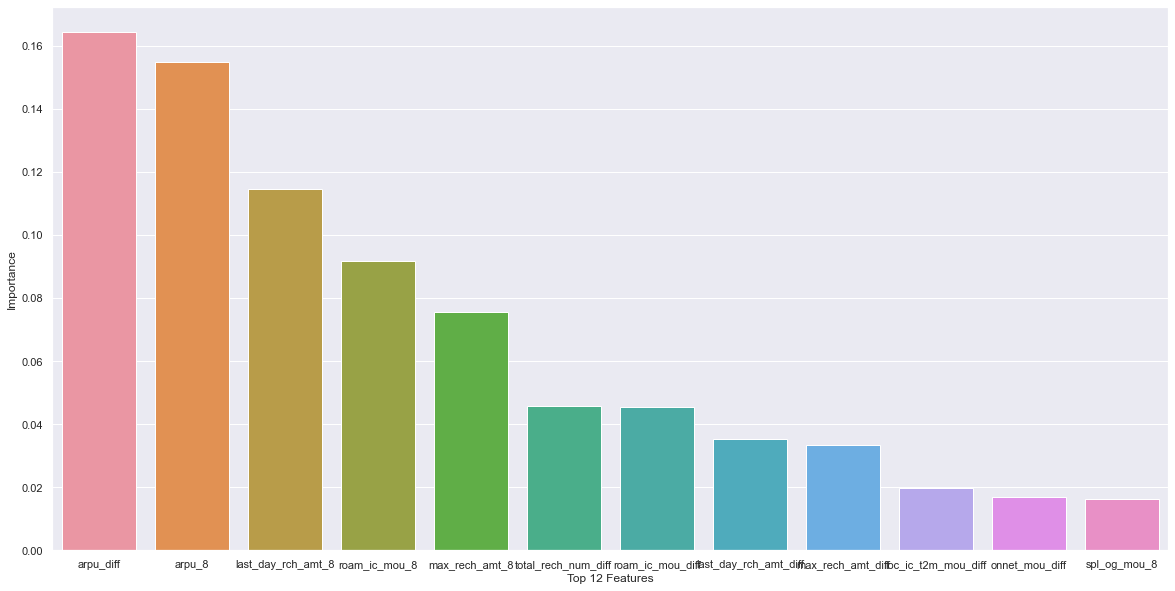

In [634]:
imp=rfc_final.feature_importances_

names=X_train.columns.values

imp,names=zip(*sorted(zip(imp,names)))

df_1=pd.DataFrame({"Variable":names,"importance":imp})
df_2 = df_1.sort_values(by="importance",axis=0,ascending=False)
df_2 = df_2.reset_index(drop=True)


plt.figure(figsize=(20, 10))

ax = sns.barplot(x='Variable', y= 'importance', data=df_2[0:12])
ax.set(xlabel = 'Top 12 Features', ylabel = 'Importance')

plt.show()

### Results:

#### LogisticRegression With PCA
- Accuracy Score:             80.78%
- Sensitivity:                80.49%
- Specificity:                80.11%
- false postive rate:         19.88%
- positive predictive value:  28.74%
- Negative predictive value:  97.63%
- Misclassification Rate:  19.84%

#### LogisticRegression With RFE
- Accuracy Score :  79.88%
- Sensitivity:  79.38%
- Specificity:  79.01%
- false postive rate:  20.98%
- positive predictive value:  27.38%
- Negative predictive value:  97.46%
- Misclassification Rate:  20.95%
    
#### Decision Tree with PCA
- Accuracy Score on test data:  80.94%
- Sensitivity:  63.19%
- Specificity:  82.71%
- false postive rate:  17.28%
- positive predictive value:  26.69%
- Negative predictive value:  95.75%
- Misclassification Rate:  19.05%
    
####  Random Forest with PCA
- Accuracy Score:  86.73%
- Sensitivity:  81.22%
- Specificity:  87.28%
- false postive rate:  12.71%
- positive predictive value:  38.89%
- Negative predictive value:  97.90%
- Misclassification Rate:  13.26%

### Driver Variables of Churn and Churn Analysis & Recommendation

- ARPU_diff & ARPU_diff - Average Revenue Per User decreases from 6th to 7th month to 8th month as most of the users are churned by 8th month.

- last_day_rch_amt_8 - Lower the last day recharge amount higher the churn rate. Focus on customers whos last day recharge amount has decrased. Specialy for customers without any recharge amount.

- roam_ic_mou_8 - Higher the incoming roaming amount, higher is the churn rate. Focus on customers whose incoming roaming amount has increased, because they are likely to churn.

- max_rech_amt_8- Focus on the customer whoes Avg max recharge amount has been decreased
